## Installation ##

In [6]:
!pip install --upgrade pip
!pip install numpy qulacs matplotlib

'pip' �́A�����R�}���h�܂��͊O���R�}���h�A
����\�ȃv���O�����܂��̓o�b�` �t�@�C���Ƃ��ĔF������Ă��܂���B
'pip' �́A�����R�}���h�܂��͊O���R�}���h�A
����\�ȃv���O�����܂��̓o�b�` �t�@�C���Ƃ��ĔF������Ă��܂���B


## Set variables ##

In [1]:
from pathlib import Path
import os
os.chdir(Path().resolve())

In [2]:
# install functions
from MultidimensionalQFT import Preprocessing, FTManager
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib.ticker as ptick
from mpl_toolkits.axes_grid1 import make_axes_locatable 
from matplotlib.ticker import MaxNLocator
import matplotlib.patheffects as patheffects
FT = FTManager()

In [3]:
# about materials dealt with
CeO2_100             = {"A":np.array([[0,10],[0,0]]),"B":np.array([[0,0],[0,54]]),"C":np.array([[54,0],[0,0]]),"D":np.array([[0,10],[10,0]])} # A: vacant O layer, B: upper Ce layer, C: downer Ce layer, D: O layer
CeO2_111             = {"A":np.array([[0,10,0],[10,0,0],[0,0,10]]),"B":np.array([[0,0,54],[0,54,0],[54,0,0]]),"C":np.array([[10,0,0],[0,0,10],[0,10,0]]),"D":np.array([[0,0,10],[0,10,0],[10,0,0]]),"E":np.array([[54,0,0],[0,0,54],[0,54,0]]),"F":np.array([[0,54,0],[54,0,0],[0,0,54]])} # A: first O layer, B: first Ce layer, C: second O layer, D: third O layer, E: second Ce layer, E: third Ce layer
scattering_factor_Ce = np.array([[0.483,1.09,1.34,2.45,0.797],[0.165,1.10,3.02,8.85,18.8]])
scattering_factor_O  = np.array([[0.0421,0.210,0.852,1.82,1.17],[0.0609,0.559,2.96,11.5,37.7]])
d_CeO2_100           = np.array([2*(-0.5),2*(-0.5)])*5.46745 # 5.46745基準で
d_CeO2_111           = np.array([np.sqrt(6)/2,np.sqrt(6)/2])*5.46745 # 5.46745基準で
DW_CeO2              = 0.0093 #dummy value

## In the graphs of the paper, the font 'Arial' is utilized ##

In [4]:
"In the binder, the code encounters an error. To replicate the same graphs on Windows, please delete the following text first #"
#plt.rcParams['font.family'] ='Arial'

'In the binder, the code encounters an error. To replicate the same graphs on Windows, please delete the following text first #'

## Figure drawing ##

In [5]:
# figure 2 A,B
"""
input_pattern
CeO2_100["A"]+CeO2_100["B"]+CeO2_100["A"]
vacant O layer + upper Ce layer + vacant O layer (1 layer of CeO2(100))
"""
FT = FTManager()
pp               = Preprocessing(scattering_factor_O)
order_100_O      = {"preprocessings":["tile"],\
                    "tile_number"    : [4,2],\
                    "d"             : d_CeO2_100,\
                    "DW"            : DW_CeO2}
XFT_input_100_O  = pp.preprocessing_parser(CeO2_100["A"], order_100_O)
pp.clear(scattering_factor_Ce)
order_100_Ce     = {"preprocessings":["tile"],\
                    "tile_number"    : [4,2],\
                    "d"             : d_CeO2_100,\
                    "DW"            : DW_CeO2}
XFT_input_100_Ce = pp.preprocessing_parser(CeO2_100["B"], order_100_Ce) 
XFT_input        = pp.normalize(XFT_input_100_O + XFT_input_100_Ce + XFT_input_100_O)
FT([XFT_input,XFT_input,XFT_input],save_path = "./",fig_name="Fig2")

[array([[ 0.64253156+0.j, -0.        +0.j, -0.64253156-0.j,
          0.        +0.j],
        [-0.        -0.j,  0.        +0.j,  0.        +0.j,
         -0.        +0.j],
        [-0.        +0.j,  0.        +0.j,  0.        +0.j,
         -0.        -0.j],
        [-0.        +0.j,  0.        -0.j,  0.        -0.j,
         -0.        +0.j],
        [-0.2952172 -0.j,  0.        +0.j,  0.2952172 +0.j,
         -0.        -0.j],
        [-0.        -0.j,  0.        +0.j,  0.        +0.j,
         -0.        -0.j],
        [-0.        -0.j,  0.        +0.j,  0.        +0.j,
         -0.        -0.j],
        [ 0.        +0.j, -0.        -0.j, -0.        -0.j,
          0.        +0.j]]),
 array([[ 0.64253156+0.j,  0.        +0.j, -0.64253156+0.j,
          0.        +0.j],
        [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
          0.        +0.j],
        [ 0.        +0.j,  0.        +0.j,  0.        +0.j,
          0.        +0.j],
        [ 0.        +0.j,  0.        +0.j

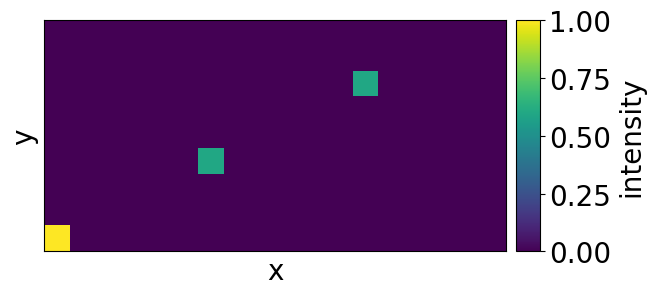

In [11]:
# figure 3 A
"""
input_pattern
CeO2_111["A"]+CeO2_111["B"]+CeO2_111["C"]
first O layer + first Ce layer + second O layer (1 layer of CeO2(111))
"""
del FT
FT = FTManager()
pp               = Preprocessing(scattering_factor_O)
order_111_Ofirst      = {"preprocessings":["tile","cutoff"],\
                    "tile_number"    : [6,3],\
                    "cutoff_length"  :[18,9],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Ofirst  = pp.preprocessing_parser(CeO2_111["A"], order_111_Ofirst)
pp.clear(scattering_factor_Ce)
order_111_Cefirst      = {"preprocessings":["tile","cutoff"],\
                    "tile_number"    : [6,3],\
                    "cutoff_length"  :[18,9],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Cefirst  = pp.preprocessing_parser(CeO2_111["B"], order_111_Cefirst)
pp.clear(scattering_factor_Ce)
order_111_Osecond     = {"preprocessings":["tile","cutoff"],\
                    "tile_number"    : [6,3],\
                    "cutoff_length"  :[18,9],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Osecond = pp.preprocessing_parser(CeO2_111["C"], order_111_Osecond)
XFT_input        = pp.normalize(XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)
np.fft.fft2(XFT_input)
fontsize = 20
fig, ax = plt.subplots()
ax.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
ax.tick_params(bottom=False, left=False, right=False, top=False)
image   = ax.imshow(np.abs(np.fft.fft2(XFT_input)/(np.sum(((np.fft.fft2(XFT_input))[0,0])))).T, origin='lower', cmap="viridis")
xs, ys  = np.meshgrid(range(np.fft.fft2(XFT_input).real.shape[0]),range(np.fft.fft2(XFT_input).real.shape[1]),indexing='ij')
divider = make_axes_locatable(ax)
cax     = divider.append_axes("right",size="5%",pad=0.1)
cbar    = plt.colorbar(image, cax=cax)
cbar.set_label('intensity', size=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel("x", fontsize=fontsize)
ax.set_ylabel("y", fontsize=fontsize)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig(fname = "Fig3A.svg",transparent = True,bbox_inches='tight')
plt.show()
plt.clf()
plt.close()

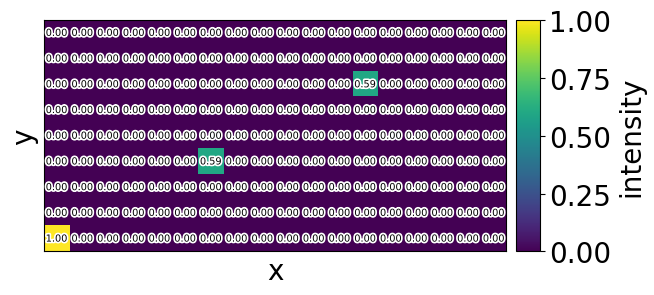

In [12]:
# figure 3 A with letter version
"""
input_pattern
CeO2_111["A"]+CeO2_111["B"]+CeO2_111["C"]
first O layer + first Ce layer + second O layer (1 layer of CeO2(111))
"""
del FT
FT = FTManager()
pp               = Preprocessing(scattering_factor_O)
order_111_Ofirst      = {"preprocessings":["tile","cutoff"],\
                    "tile_number"    : [6,3],\
                    "cutoff_length"  :[18,9],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Ofirst  = pp.preprocessing_parser(CeO2_111["A"], order_111_Ofirst)
pp.clear(scattering_factor_Ce)
order_111_Cefirst      = {"preprocessings":["tile","cutoff"],\
                    "tile_number"    : [6,3],\
                    "cutoff_length"  :[18,9],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Cefirst  = pp.preprocessing_parser(CeO2_111["B"], order_111_Cefirst)
pp.clear(scattering_factor_Ce)
order_111_Osecond     = {"preprocessings":["tile","cutoff"],\
                    "tile_number"    : [6,3],\
                    "cutoff_length"  :[18,9],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Osecond = pp.preprocessing_parser(CeO2_111["C"], order_111_Osecond)
XFT_input        = pp.normalize(XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)
np.fft.fft2(XFT_input)
fontsize = 20
fig, ax = plt.subplots()
ax.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
ax.tick_params(bottom=False, left=False, right=False, top=False)
image   = ax.imshow(np.abs(np.fft.fft2(XFT_input)/(np.sum(((np.fft.fft2(XFT_input))[0,0])))).T, origin='lower', cmap="viridis")
xs, ys  = np.meshgrid(range(np.fft.fft2(XFT_input).shape[0]),range(np.fft.fft2(XFT_input).shape[1]),indexing='ij')
for x,y,val in zip(xs.reshape(-1), ys.reshape(-1), np.abs(np.fft.fft2(XFT_input)/(np.sum(((np.fft.fft2(XFT_input))[0,0])))).reshape(-1)):
    ax.text(x,y,'{0:.2f}'.format(val), horizontalalignment='center',verticalalignment='center',fontsize=7, path_effects=[patheffects.withStroke(linewidth=2.5, foreground='white', capstyle="round")])
divider = make_axes_locatable(ax)
cax     = divider.append_axes("right",size="5%",pad=0.1)
cbar    = plt.colorbar(image, cax=cax)
cbar.set_label('intensity', size=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.set_xlabel("x", fontsize=fontsize)
ax.set_ylabel("y", fontsize=fontsize)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig(fname = "Fig3A_with_letter.svg",transparent = True,bbox_inches='tight')
plt.show()
plt.clf()
plt.close()

In [6]:
#figure 3 B 
"""
input_pattern
CeO2_111["A"]+CeO2_111["B"]+CeO2_111["C"]  
first O layer + first Ce layer + second O layer(1 layer of CeO2(111))
"""
del FT
FT = FTManager()
pp               = Preprocessing(scattering_factor_O)
order_111_Ofirst      = {"preprocessings":["tile","cutoff"],\
                    "tile_number"    : [6,4],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[16,8],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Ofirst  = pp.preprocessing_parser(CeO2_111["A"], order_111_Ofirst)
pp.clear(scattering_factor_Ce)
order_111_Cefirst      = {"preprocessings":["tile","cutoff"],\
                    "tile_number"    : [6,4],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[16,8],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_order_111_Cefirst  = pp.preprocessing_parser(CeO2_111["B"], order_111_Cefirst)
pp.clear(scattering_factor_Ce)
order_111_Osecond     = {"preprocessings":["tile","cutoff"],\
                    "tile_number"    : [6,4],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[16,8],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Osecond = pp.preprocessing_parser(CeO2_111["C"], order_111_Osecond)
XFT_input        = pp.normalize(XFT_input_111_Ofirst + XFT_input_111_order_111_Cefirst+ XFT_input_111_Osecond)
FT([XFT_input,XFT_input,XFT_input],save_path = "./",fig_name="Fig3B")
# Figure in save_path directry

[array([[ 0.76367187+0.j        , -0.00759587-0.00314631j,
         -0.01074219-0.01074219j,  0.00759587+0.01833806j,
          0.        -0.j        ,  0.00759587-0.01833806j,
         -0.01074219+0.01074219j, -0.00759587+0.00314631j],
        [-0.00725717-0.00144354j, -0.00725717-0.00484909j,
         -0.00929865-0.01391641j,  0.00464142+0.02333399j,
         -0.00028714+0.00144354j,  0.00956998-0.01432248j,
         -0.01218573+0.00814224j, -0.00810278+0.00161174j],
        [-0.00759587-0.00314631j, -0.00705605-0.00705605j,
         -0.00759587-0.01833806j, -0.        +0.03038349j,
         -0.00130325+0.00314631j,  0.01074219-0.01074219j,
         -0.0138885 +0.00575281j, -0.00889912-0.j        ],
        [-0.00841357-0.00562177j, -0.0070495 -0.01055033j,
         -0.00512042-0.02574208j, -0.00841357+0.04229789j,
         -0.00375635+0.00562177j,  0.01078035-0.0072032j ,
         -0.01636396+0.00325499j, -0.01034266-0.00205728j],
        [-0.01074219-0.01074219j, -0.00759587-0.0183

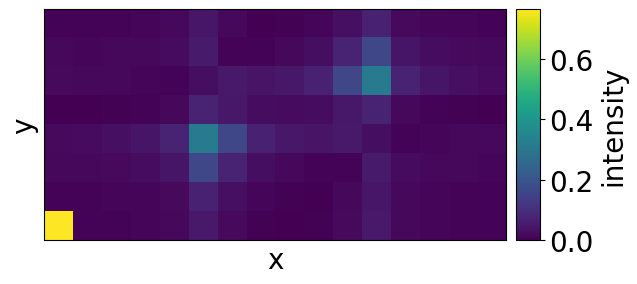

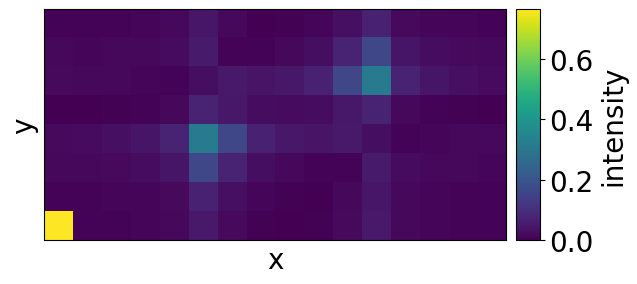

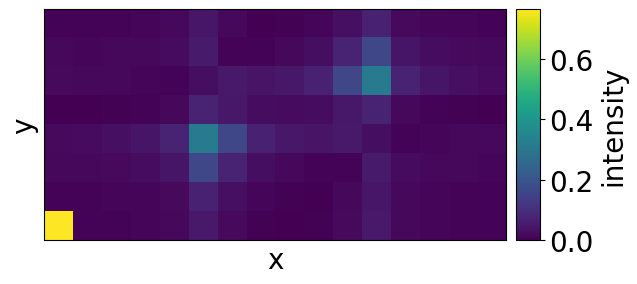

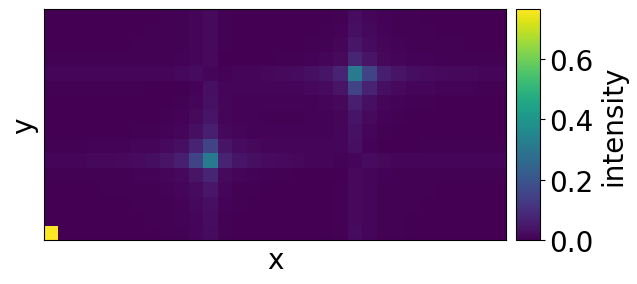

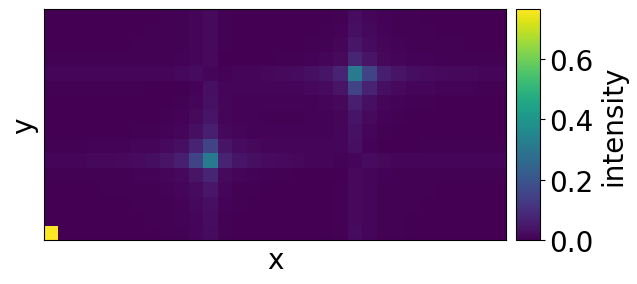

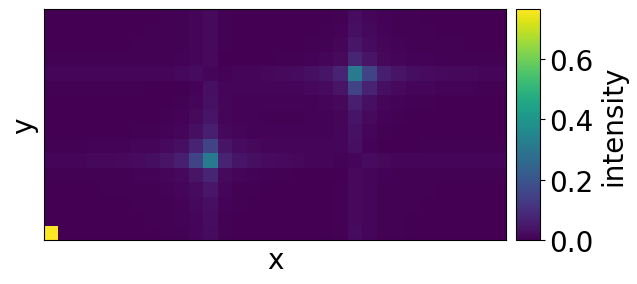

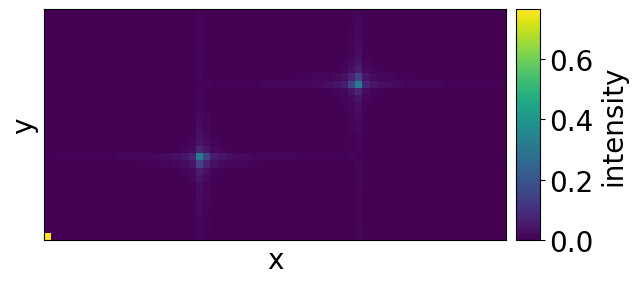

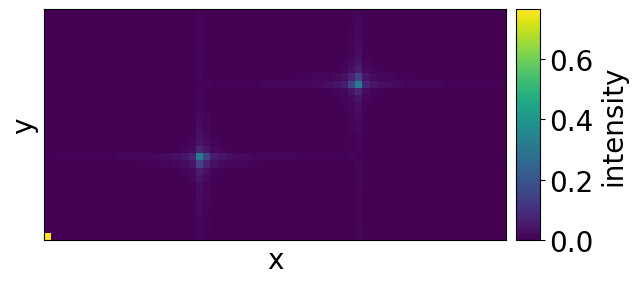

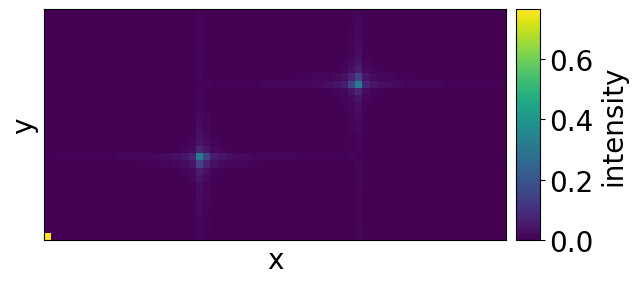

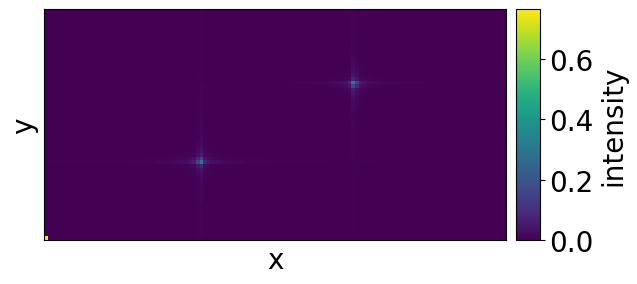

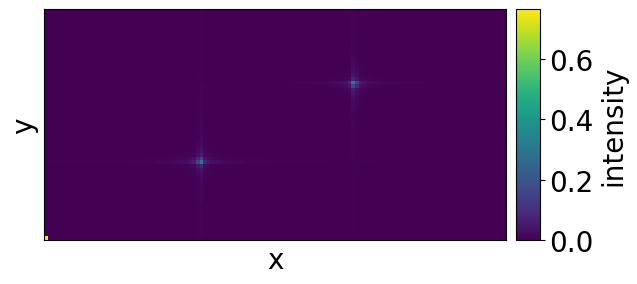

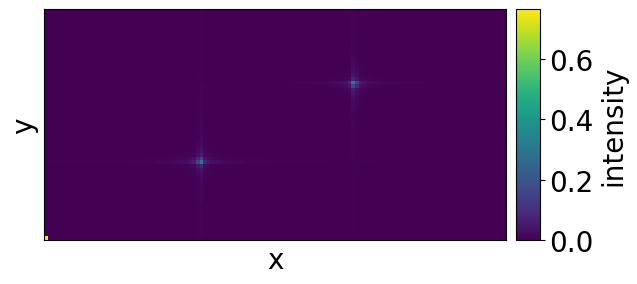

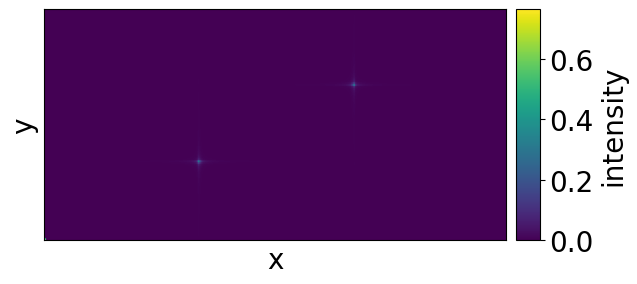

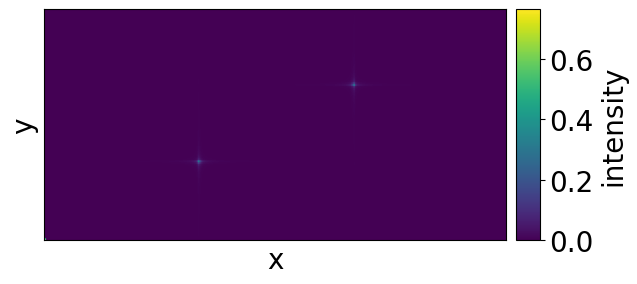

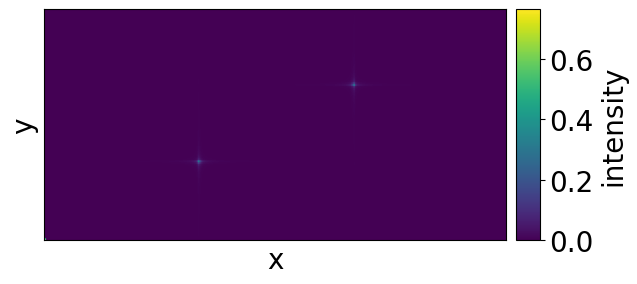

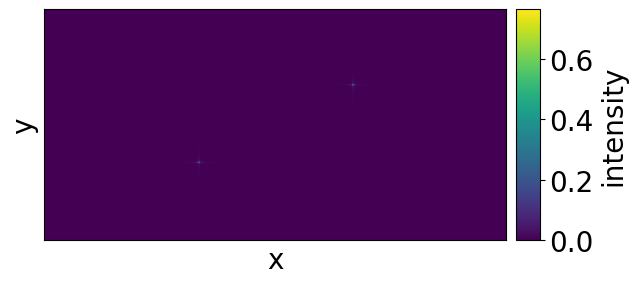

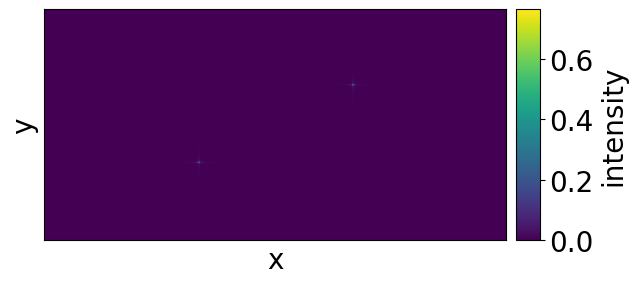

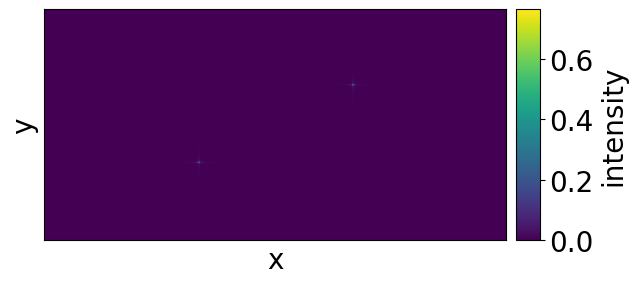

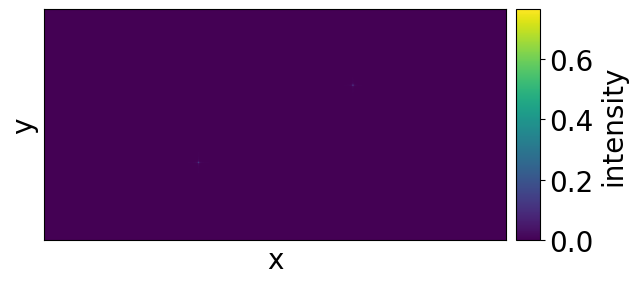

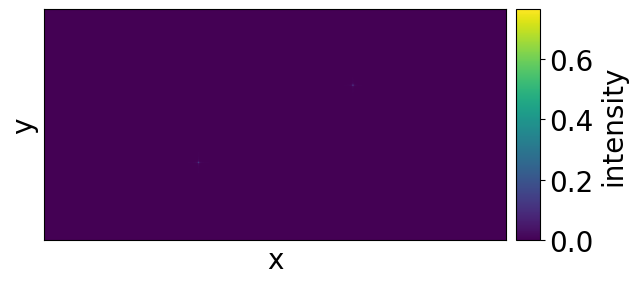

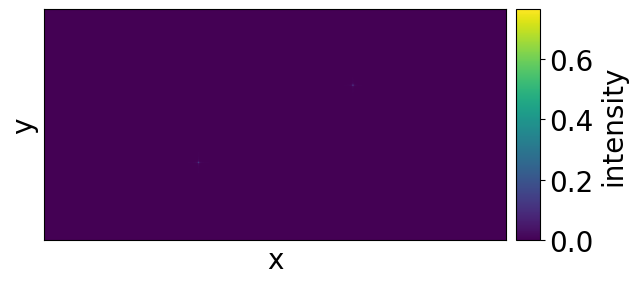

In [14]:
#for figure 4 A #cutoff with no flat top function with changing bit number 

"""
input_pattern
CeO2_111["A"]+CeO2_111["B"]+CeO2_111["C"]
O layer + upper Ce layer + O layer (1 layer of CeO2(111))
"""
del FT
FT = FTManager()
relative_intensity_cutoff_no_flat_top_function       = []
for bit_number in range (3,10):
    del FT,pp
    FT = FTManager()
    pp               = Preprocessing(scattering_factor_O)
    order_111_Ofirst      = {"preprocessings":["tile","cutoff"],\
                        "tile_number"    : [(2**(bit_number+1)//3+1),(2**(bit_number)//3+1)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Ofirst  = pp.preprocessing_parser(CeO2_111["A"], order_111_Ofirst)
    pp.clear(scattering_factor_Ce)
    order_111_Cefirst      = {"preprocessings":["tile","cutoff"],\
                        "tile_number"    : [(2**(bit_number+1)//3+1),(2**(bit_number)//3+1)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Cefirst  = pp.preprocessing_parser(CeO2_111["B"], order_111_Cefirst)
    pp.clear(scattering_factor_Ce)
    order_111_Osecond     = {"preprocessings":["tile","cutoff"],\
                        "tile_number"    : [(2**(bit_number+1)//3+1),(2**(bit_number)//3+1)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Osecond = pp.preprocessing_parser(CeO2_111["C"], order_111_Osecond)
    pp.clear(scattering_factor_O)
    order_111_Othird     = {"preprocessings":["tile","cutoff"],\
                        "tile_number"    : [(2**(bit_number+1)//3+1),(2**(bit_number)//3+1)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Othird = pp.preprocessing_parser(CeO2_111["D"], order_111_Othird)
    pp.clear(scattering_factor_O)
    order_111_Cedowner     = {"preprocessings":["tile","cutoff"],\
                        "tile_number"    : [(2**(bit_number+1)//3+1),(2**(bit_number)//3+1)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Cedowner = pp.preprocessing_parser(CeO2_111["E"], order_111_Cedowner)
    XFT_input        = pp.normalize(XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)
    DFT,FFT,QFT              = FT([XFT_input,XFT_input,XFT_input])
    relative_intensity_cutoff_no_flat_top_function.append([QFT[((2**(bit_number+1))//3),((2**(bit_number))//3)]/QFT[0,0]])

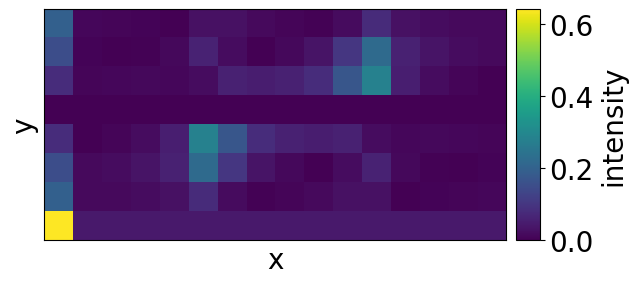

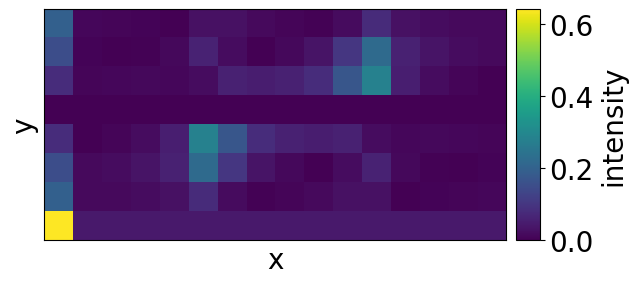

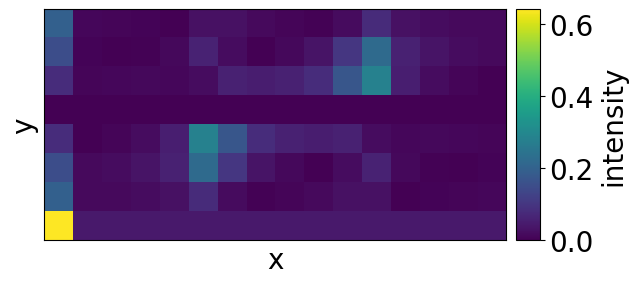

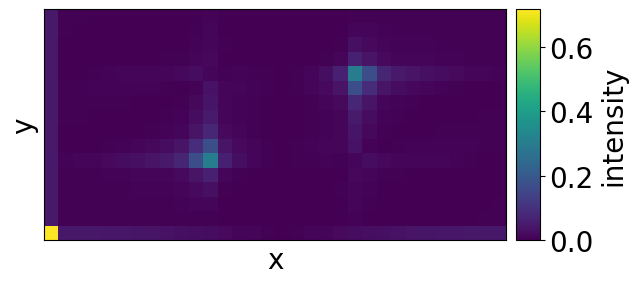

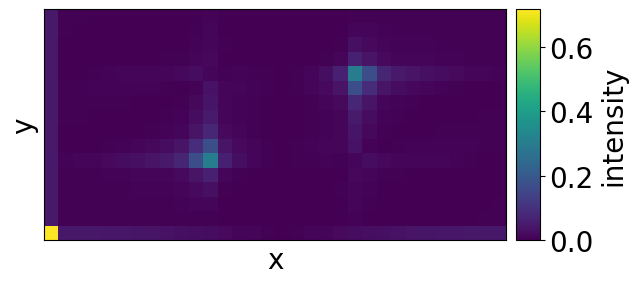

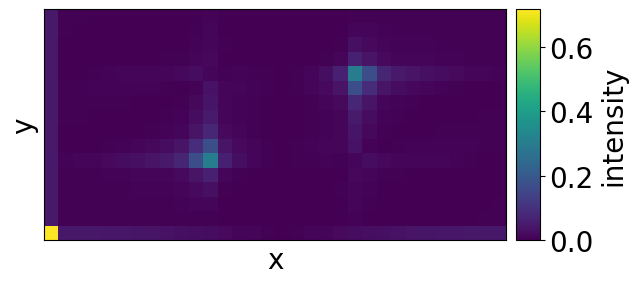

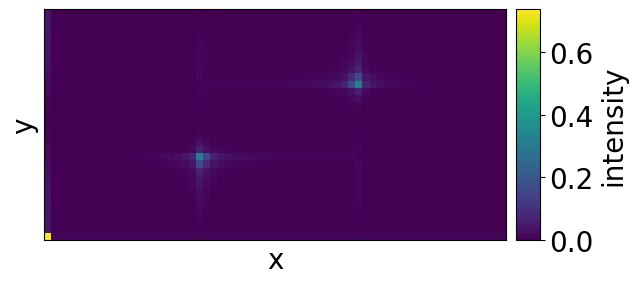

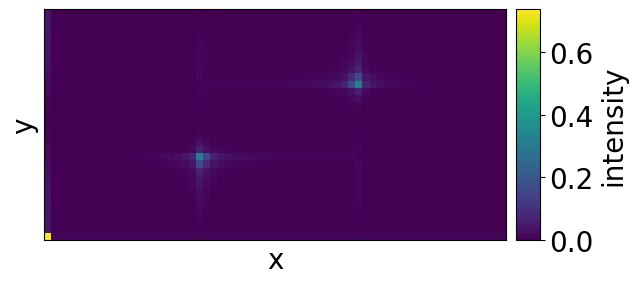

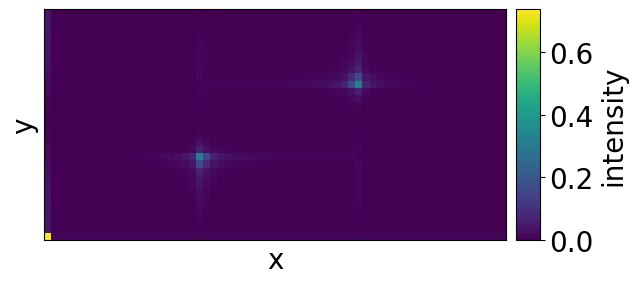

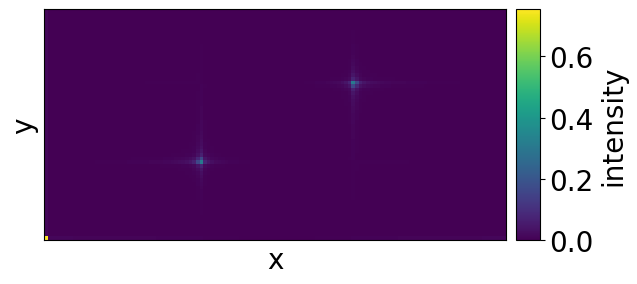

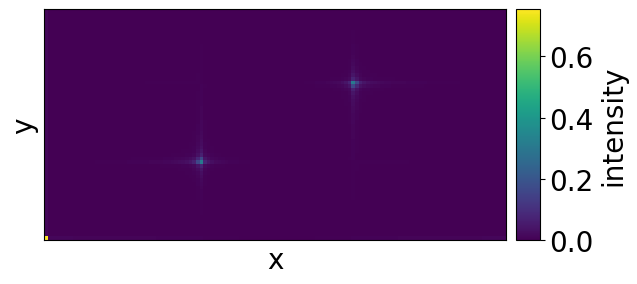

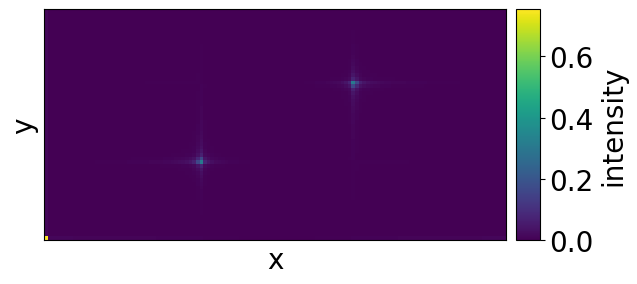

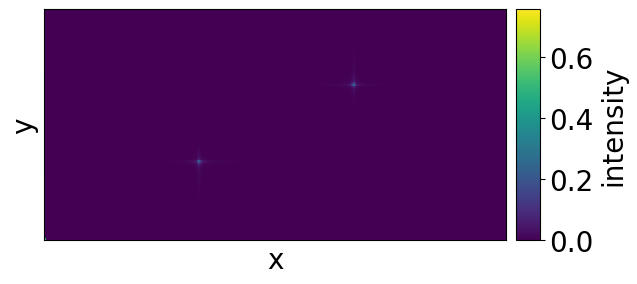

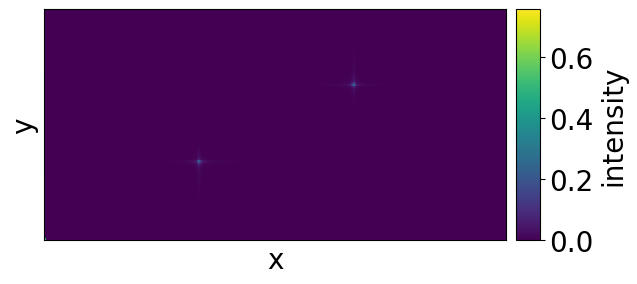

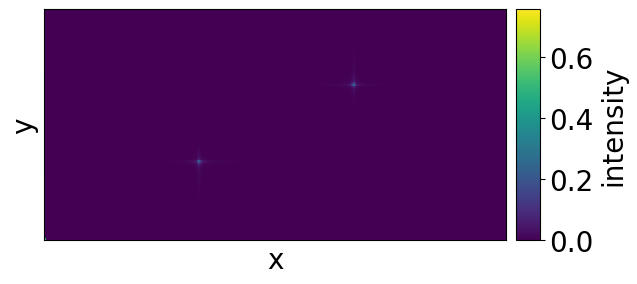

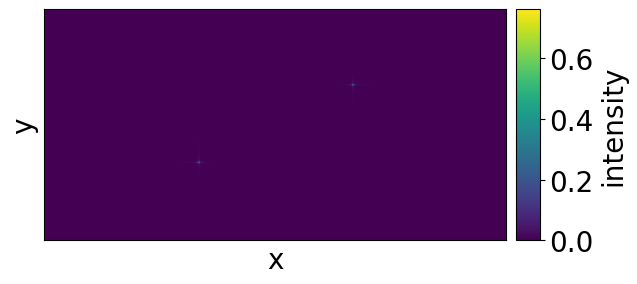

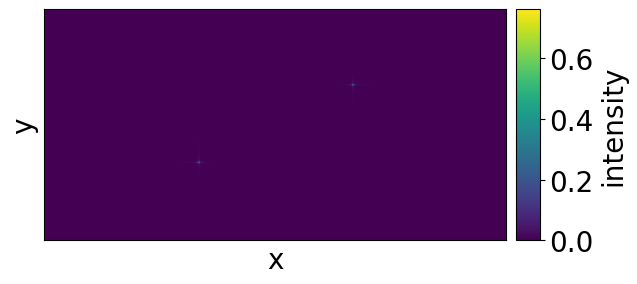

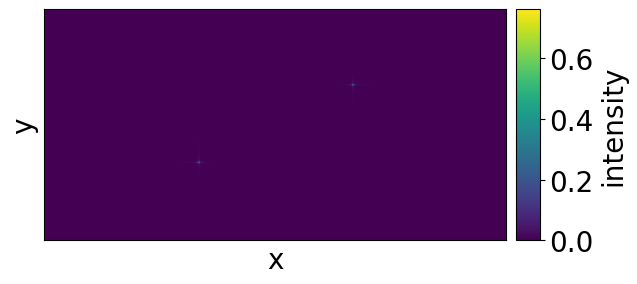

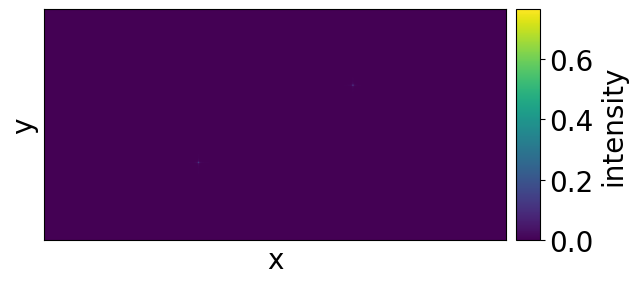

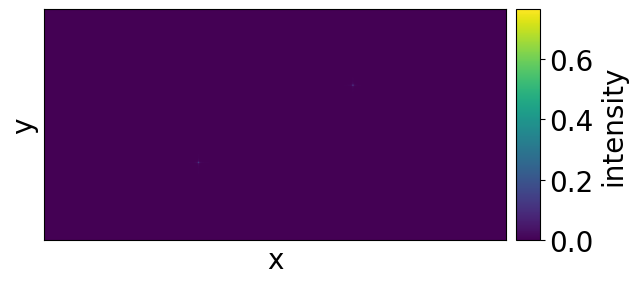

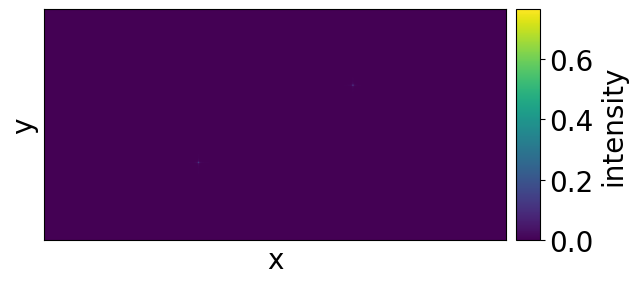

In [15]:
#for figure 4 A  #Zeropadding with no flat_top function with changing bit number 
relative_intensity_padding_no_flat_top       = []
del FT
FT = FTManager()
for bit_number in range (3,10):
    del FT
    FT = FTManager()
    pp               = Preprocessing(scattering_factor_O)
    order_111_Ofirst      = {"preprocessings":["tile","padding"],\
                        "tile_number"    : [(2**(bit_number+1)//3),(2**(bit_number)//3)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Ofirst  = pp.preprocessing_parser(CeO2_111["A"], order_111_Ofirst)
    pp.clear(scattering_factor_Ce)
    order_111_Cefirst      = {"preprocessings":["tile","padding"],\
                        "tile_number"    : [(2**(bit_number+1)//3),(2**(bit_number)//3)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Cefirst  = pp.preprocessing_parser(CeO2_111["B"], order_111_Cefirst)
    pp.clear(scattering_factor_Ce)
    order_111_Osecond     = {"preprocessings":["tile","padding"],\
                        "tile_number"    : [(2**(bit_number+1)//3),(2**(bit_number)//3)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Osecond = pp.preprocessing_parser(CeO2_111["C"], order_111_Osecond)
    XFT_input        = pp.normalize(XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)
    DFT,FFT,QFT              = FT([XFT_input,XFT_input,XFT_input])
    relative_intensity_padding_no_flat_top.append([QFT[((2**(bit_number+1))//3),((2**(bit_number))//3)]/QFT[0,0]])

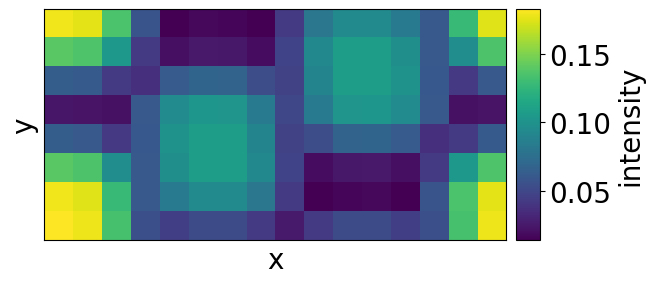

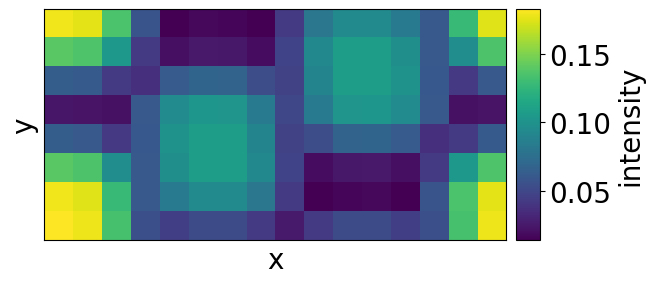

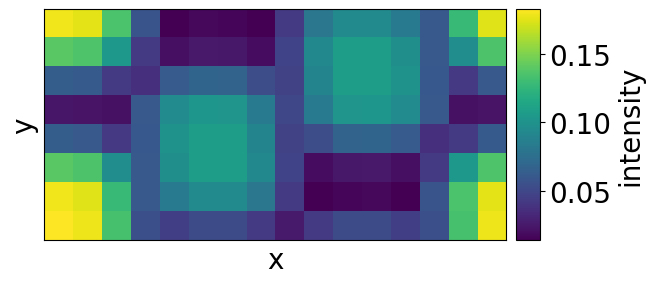

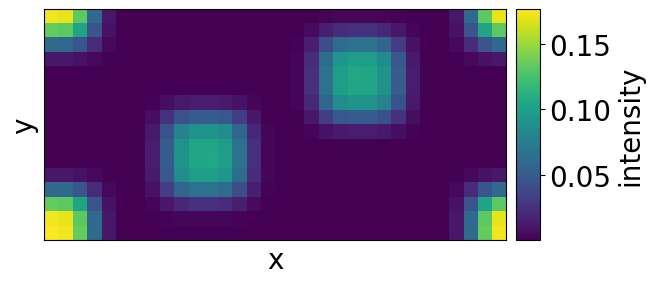

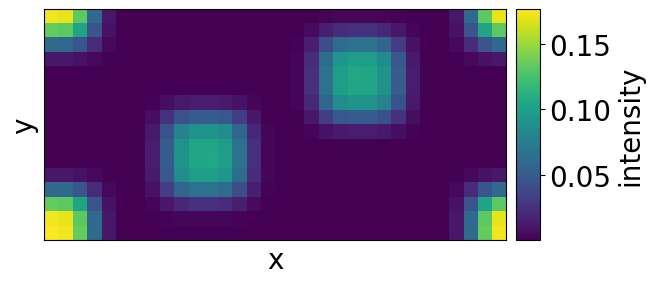

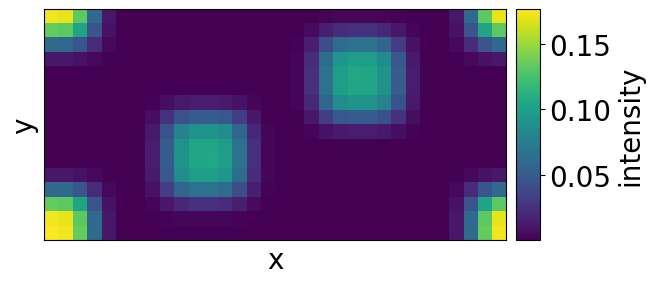

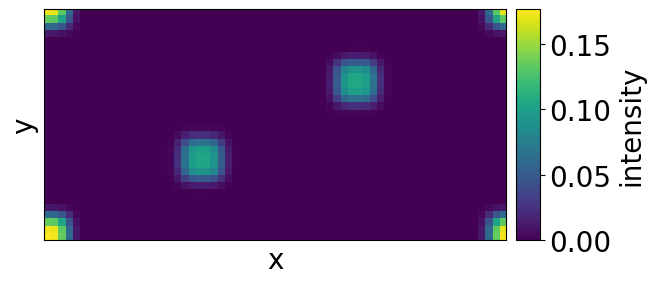

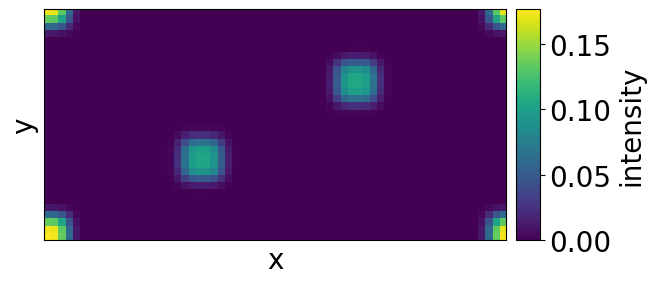

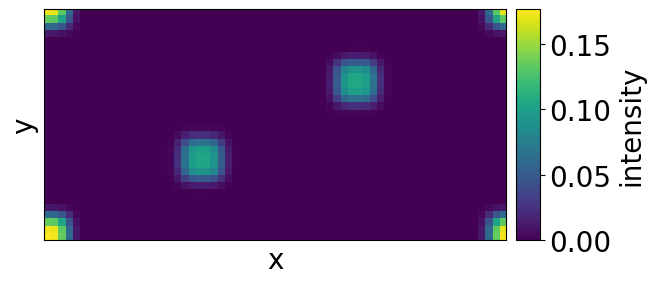

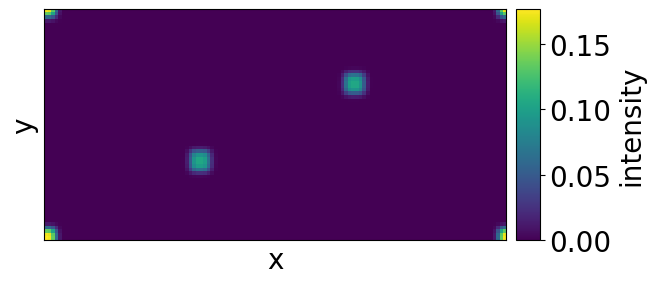

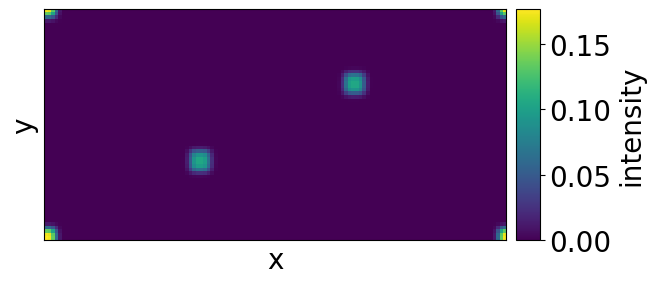

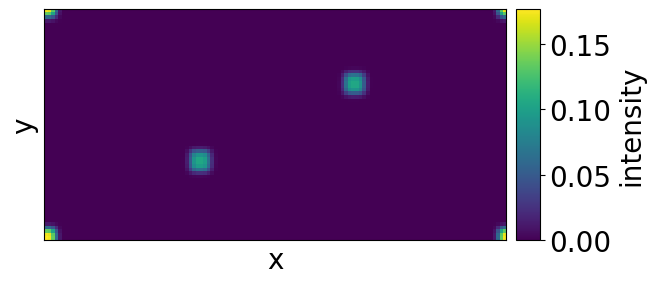

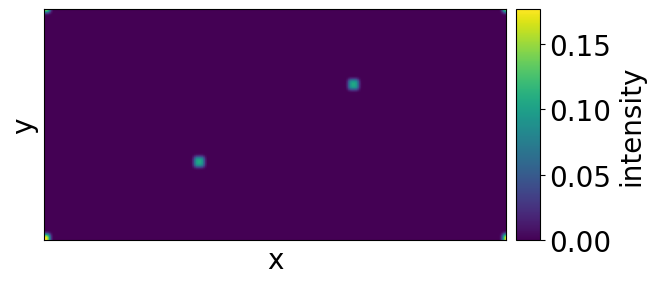

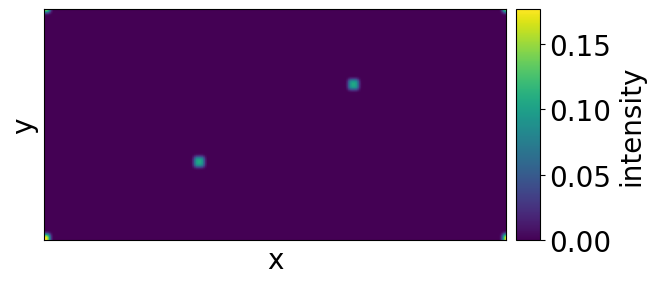

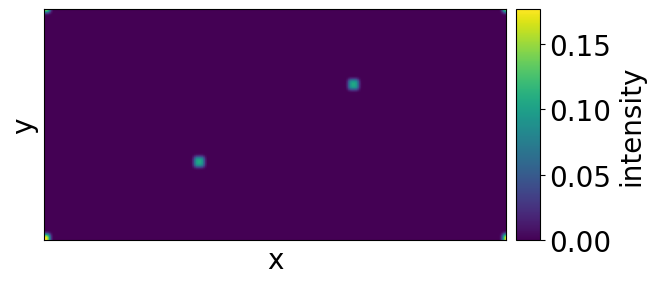

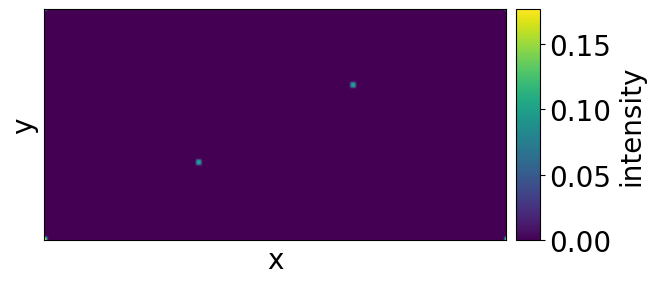

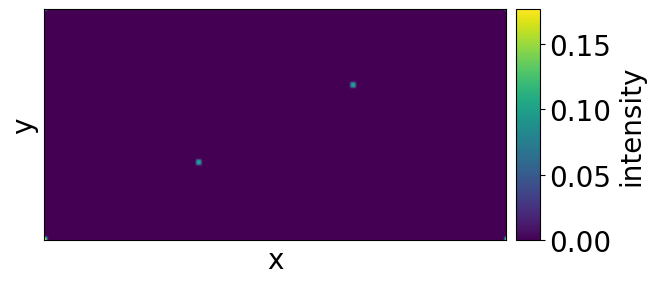

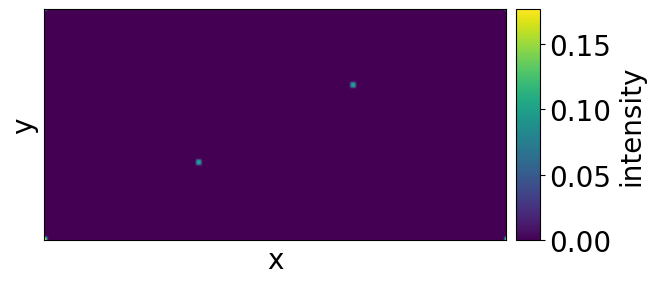

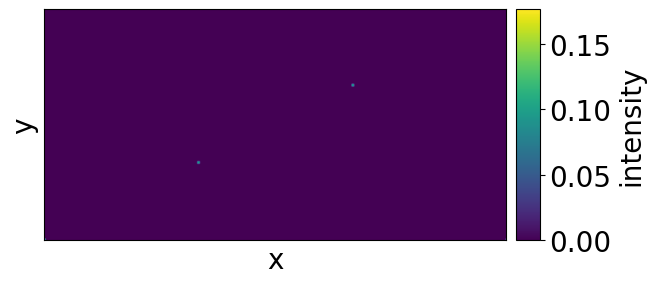

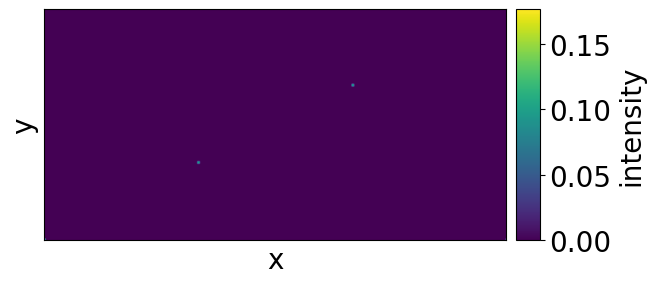

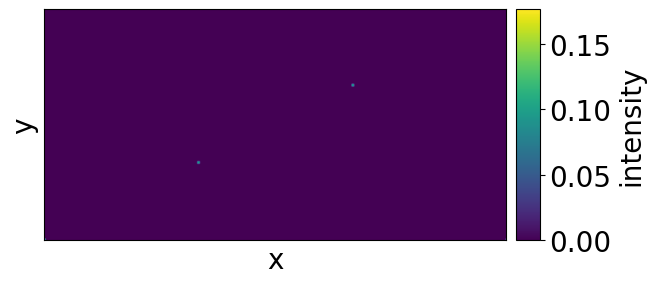

In [16]:
#for figure 4 A, B #cutoff with flat_top function with changing bit number 

"""
input_pattern
first_layer (CeO2_111["A"]+CeO2_111["B"]+CeO2_111["C"]) +second layer (CeO2_111["D"]+CeO2_111["E"]+CeO2_111["A"])
+third layer (CeO2_111["B"]+CeO2_111["F"]+CeO2_111["C"])
first O layer + second layer + third layer (changing layer of CeO2(111))
"""
del FT
FT = FTManager()
relative_intensity_cutoff_with_flat_top_function       = []
for bit_number in range (3,10):
    del FT
    FT = FTManager()
    pp               = Preprocessing(scattering_factor_O)
    order_111_Ofirst      = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                        "tile_number"    : [(2**(bit_number+1)//3+1),(2**(bit_number)//3+1)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Ofirst  = pp.preprocessing_parser(CeO2_111["A"], order_111_Ofirst)
    pp.clear(scattering_factor_Ce)
    order_111_Cefirst      = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                        "tile_number"    : [(2**(bit_number+1)//3+1),(2**(bit_number)//3+1)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Cefirst  = pp.preprocessing_parser(CeO2_111["B"], order_111_Cefirst)
    pp.clear(scattering_factor_Ce)
    order_111_Osecond     = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                        "tile_number"    : [(2**(bit_number+1)//3+1),(2**(bit_number)//3+1)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Osecond = pp.preprocessing_parser(CeO2_111["C"], order_111_Osecond)
    XFT_input        = pp.normalize(XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)
    DFT,FFT,QFT              = FT([XFT_input,XFT_input,XFT_input])
    relative_intensity_cutoff_with_flat_top_function.append([QFT[((2**(bit_number+1))//3),((2**(bit_number))//3)]/QFT[0,0]])

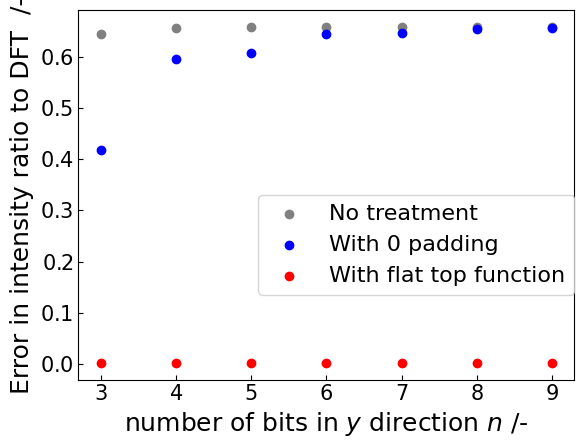

In [17]:
#Figure 4 A comparing cutoff with no and flat top function and padding with no flat top function
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib.ticker as ptick
x =  np.array(range(3, 10))
y_1 = np.abs(1-np.abs(relative_intensity_cutoff_no_flat_top_function)/0.5945945945945945)
y_2 = np.abs(1-(np.abs(relative_intensity_padding_no_flat_top)/0.5945945945945945))
y_3 = np.abs(1-(np.abs(relative_intensity_cutoff_with_flat_top_function)/0.5945945945945945))

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.scatter(x, y_1, c= 'gray')
plt.scatter(x, y_2, c= 'blue')
plt.scatter(x, y_3, c= 'red')

plt.xlabel("number of bits in $\it{ y }$ direction $\it{ n }$ /-",fontsize = 18)
plt.ylabel("Error in intensity ratio to DFT  /-",fontsize = 18)
plt.legend(["No treatment","With 0 padding","With flat top function"],bbox_to_anchor=(1, 0.5),loc='upper right',borderaxespad=0,fontsize = 16) 
plt.tick_params(labelsize=15)
plt.subplot().yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
plt.subplot().yaxis.offsetText.set_fontsize(16)
plt.savefig(fname = "Fig4A.svg",transparent = True)
plt.show()

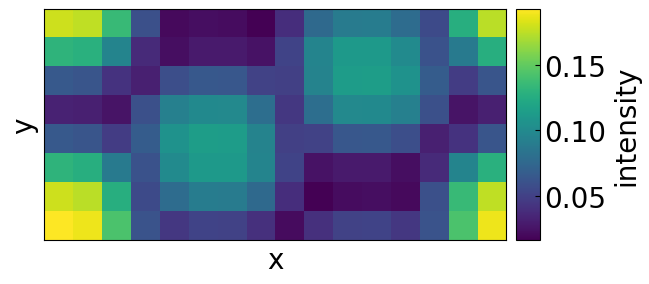

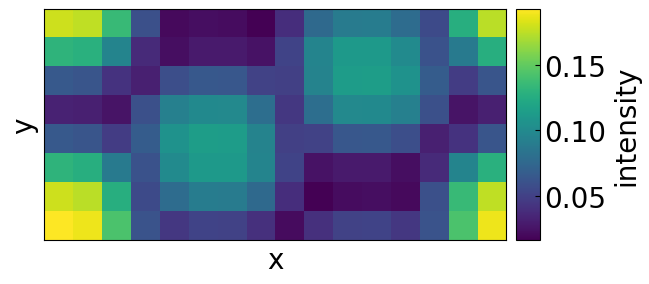

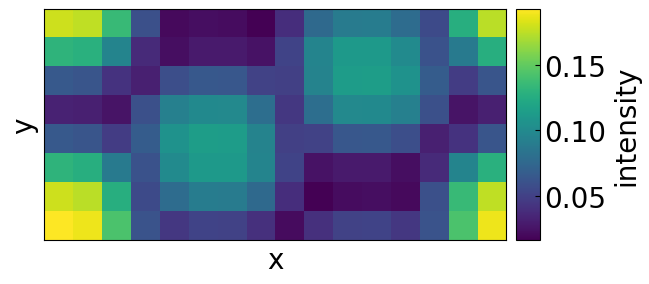

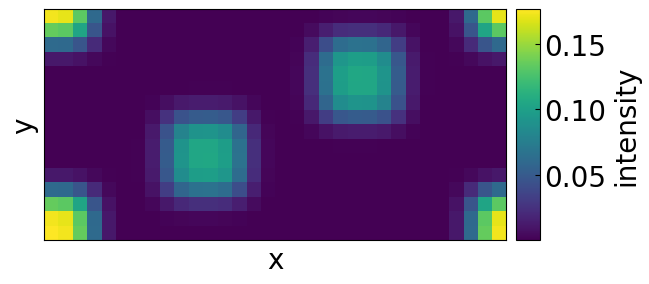

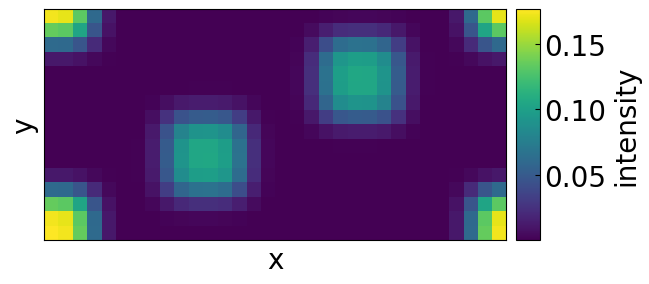

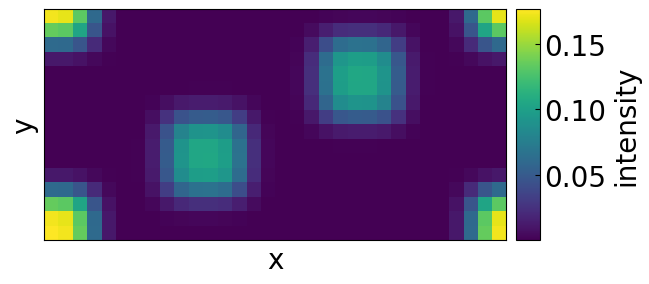

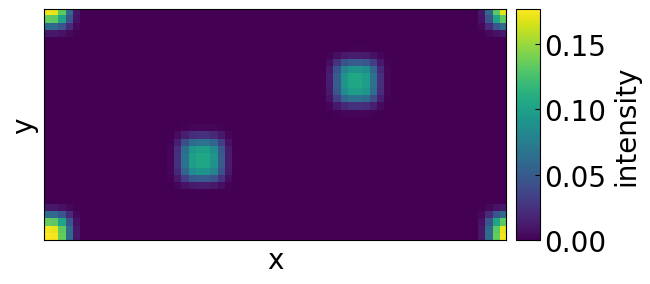

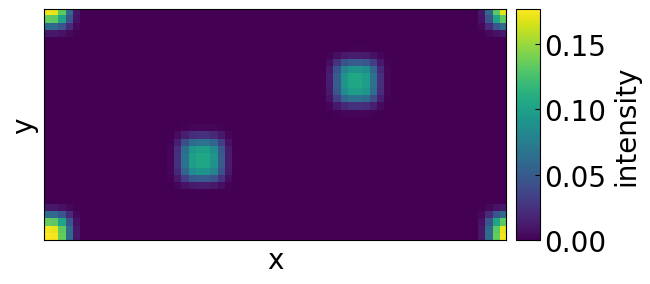

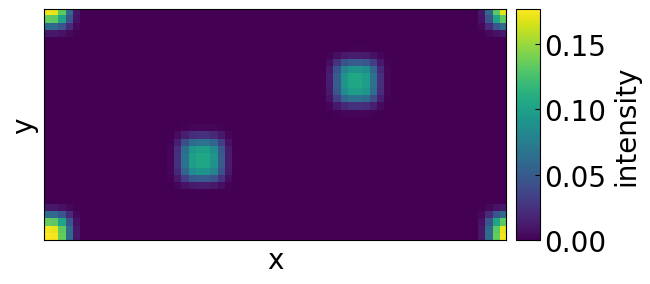

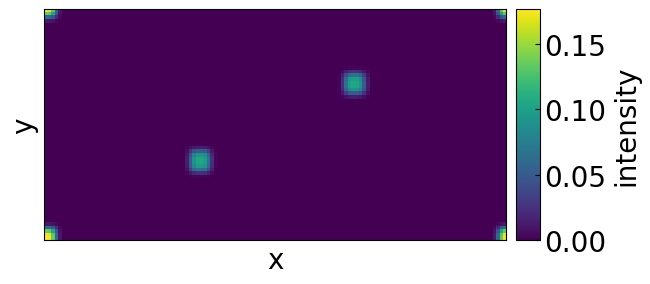

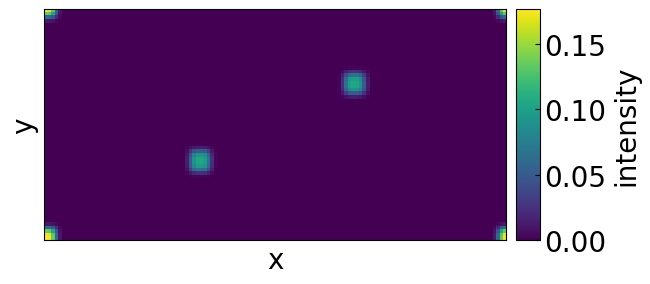

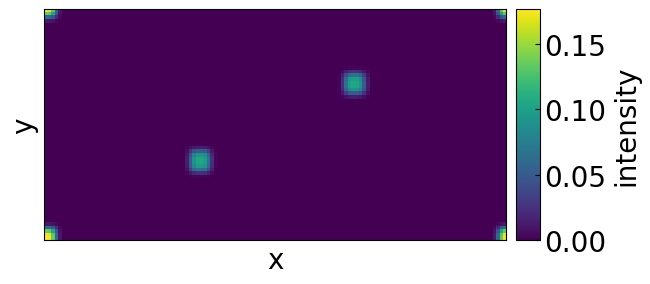

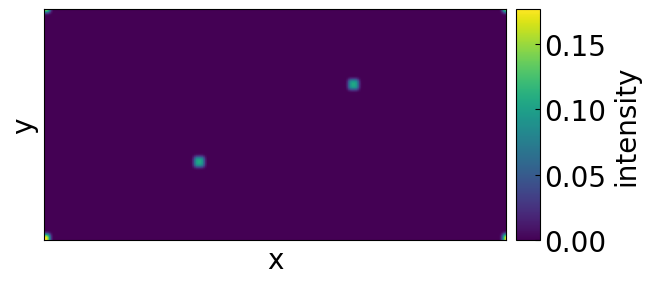

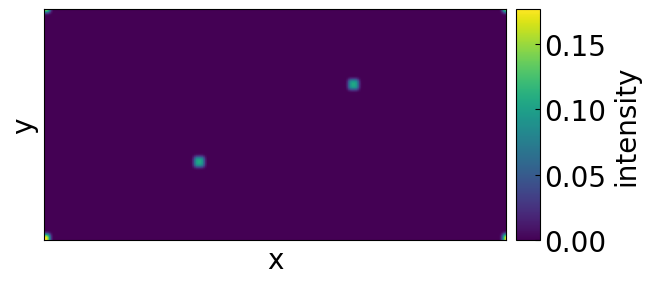

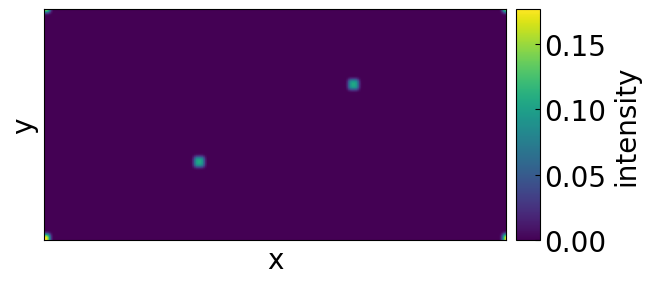

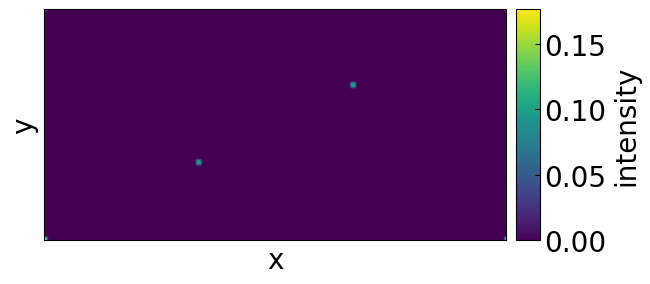

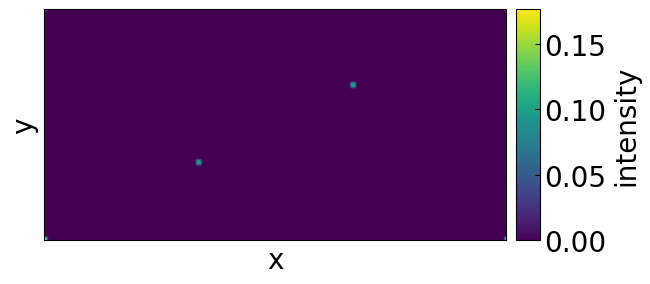

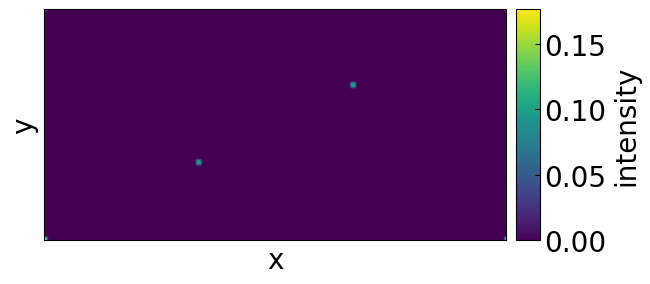

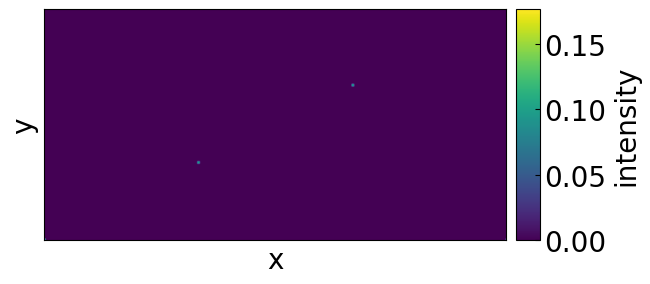

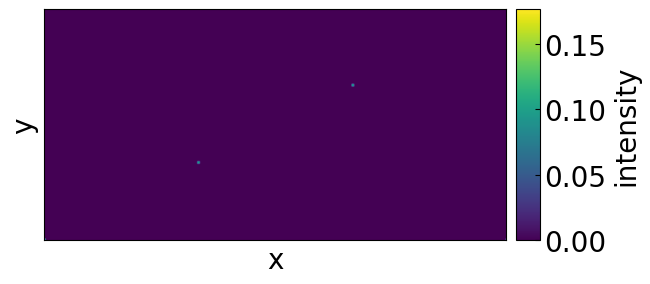

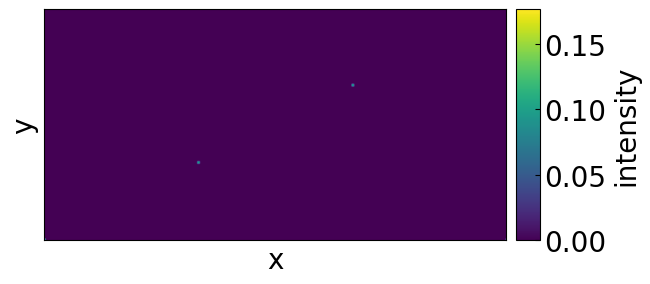

In [18]:
#for Figure 4 B Zeropadding with flat_top function with changing bit number 3-9
relative_intensity_padding_with_flat_top_function       = []
for bit_number in range (3,10):
    del FT
    FT = FTManager()
    pp               = Preprocessing(scattering_factor_O)
    order_111_Ofirst      = {"preprocessings":["tile","padding","multiple_flat_top_window"],\
                        "tile_number"    : [(2**(bit_number+1)//3),(2**(bit_number)//3)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Ofirst  = pp.preprocessing_parser(CeO2_111["A"], order_111_Ofirst)
    pp.clear(scattering_factor_Ce)
    order_111_Cefirst      = {"preprocessings":["tile","padding","multiple_flat_top_window"],\
                        "tile_number"    : [(2**(bit_number+1)//3),(2**(bit_number)//3)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Cefirst  = pp.preprocessing_parser(CeO2_111["B"], order_111_Cefirst)
    pp.clear(scattering_factor_Ce)
    order_111_Osecond     = {"preprocessings":["tile","padding","multiple_flat_top_window"],\
                        "tile_number"    : [(2**(bit_number+1)//3),(2**(bit_number)//3)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Osecond = pp.preprocessing_parser(CeO2_111["C"], order_111_Osecond)
    XFT_input        = pp.normalize(XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)
    DFT,FFT,QFT              = FT([XFT_input,XFT_input,XFT_input])
    relative_intensity_padding_with_flat_top_function.append([QFT[((2**(bit_number+1))//3),((2**(bit_number))//3)]/QFT[0,0]])

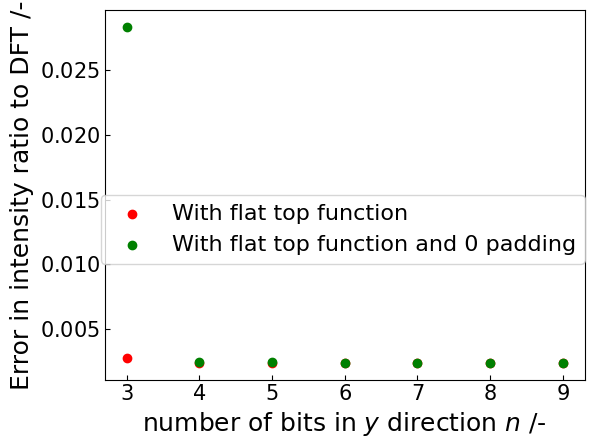

In [19]:
#Figure 4 B comparing cutoff with flat top function and padding with no flat top function
x =  np.array(range(3, 10))
y_1 = (np.abs(1-(np.abs(relative_intensity_cutoff_with_flat_top_function)/0.5945945945945945)))
y_2 = (np.abs(1-(np.abs(relative_intensity_padding_with_flat_top_function)/0.5945945945945945)))

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.subplot.left'] = 0.15

plt.scatter(x, y_1, c= 'red')
plt.scatter(x, y_2, c= 'green')

plt.xlabel("number of bits in $\it{ y }$ direction $\it{ n }$ /-",fontsize = 18)
plt.ylabel("Error in intensity ratio to DFT /-",fontsize = 18)
plt.legend(["With flat top function", "With flat top function and 0 padding"],bbox_to_anchor=(1, 0.5),loc='upper right',borderaxespad=0,fontsize = 16)
plt.subplot().yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
plt.subplot().yaxis.offsetText.set_fontsize(16)
plt.tick_params(labelsize=15)
plt.savefig(fname = "Fig4B.svg",transparent = True)
plt.show()

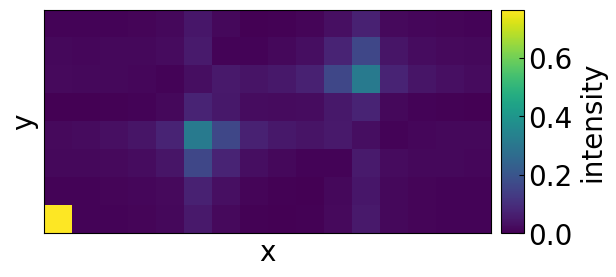

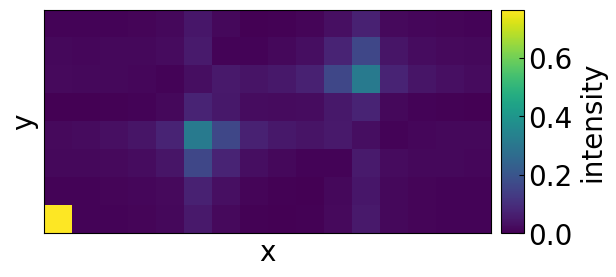

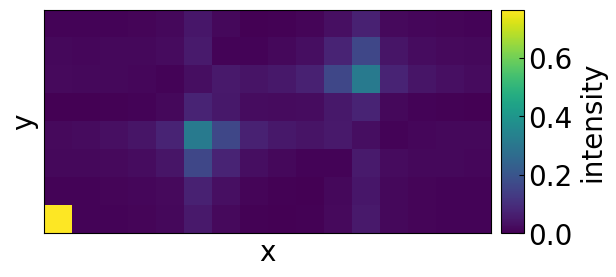

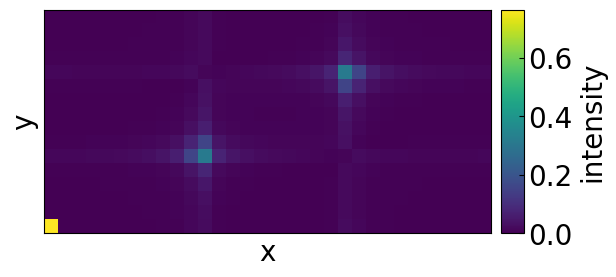

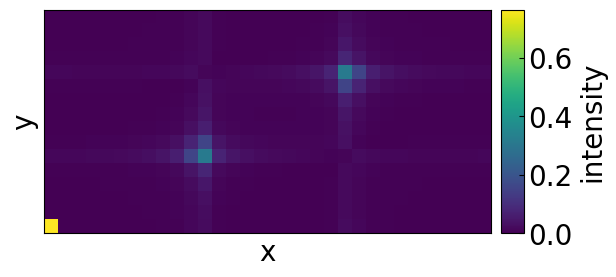

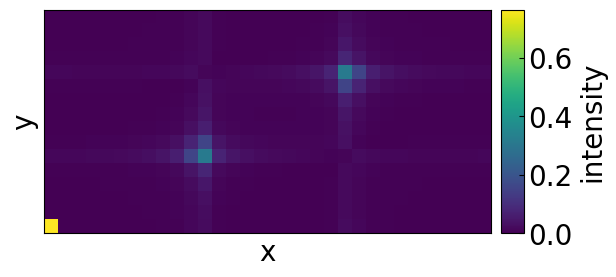

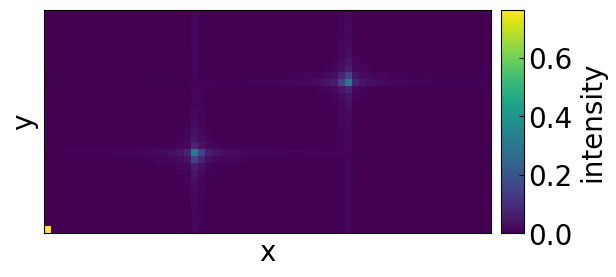

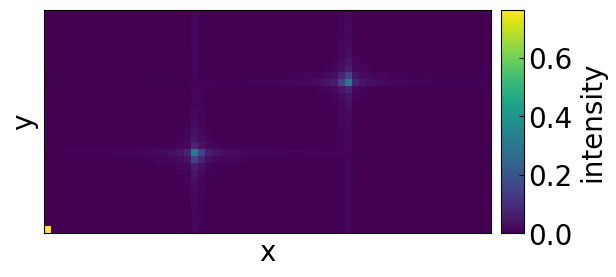

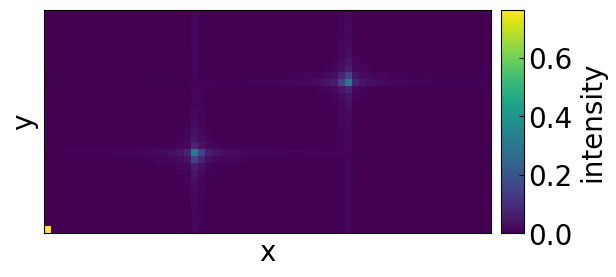

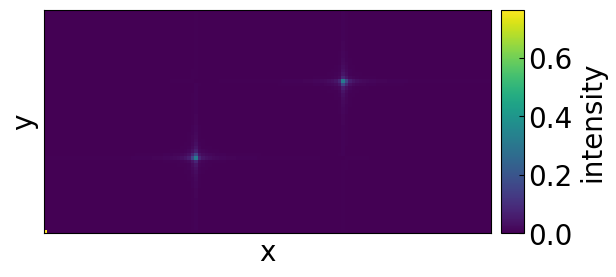

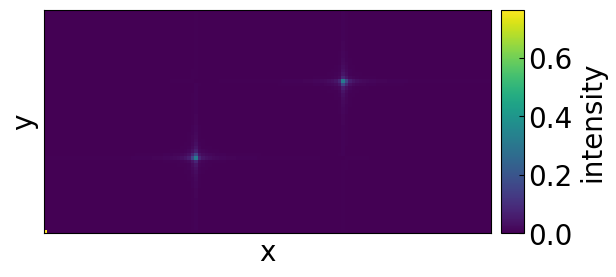

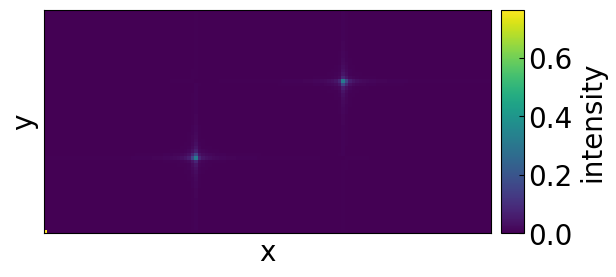

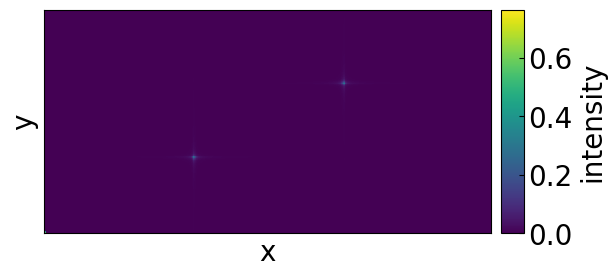

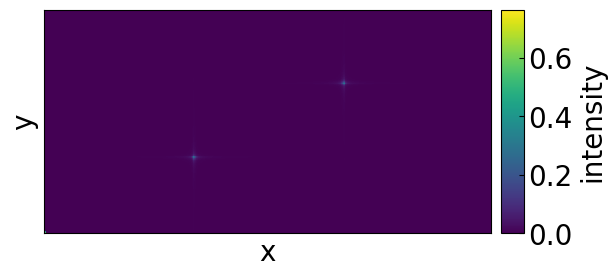

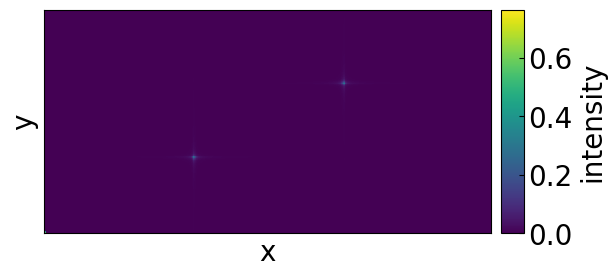

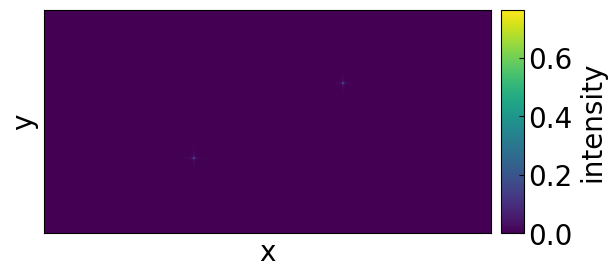

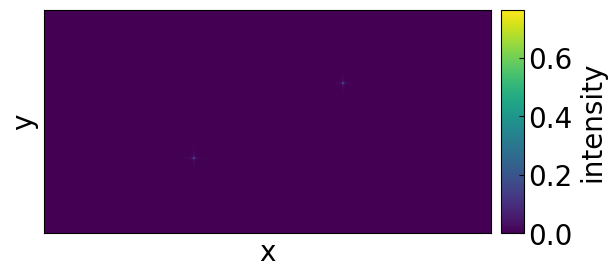

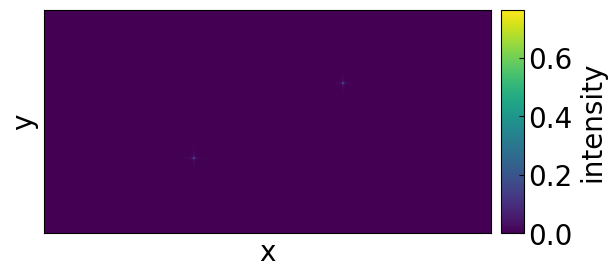

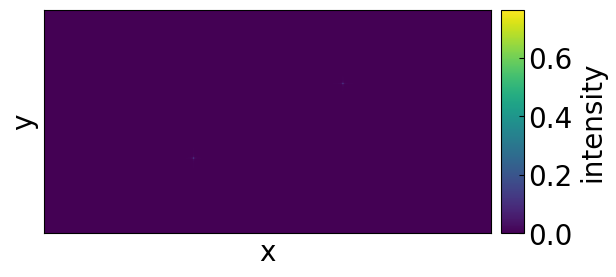

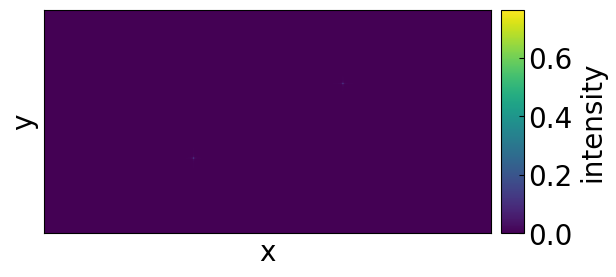

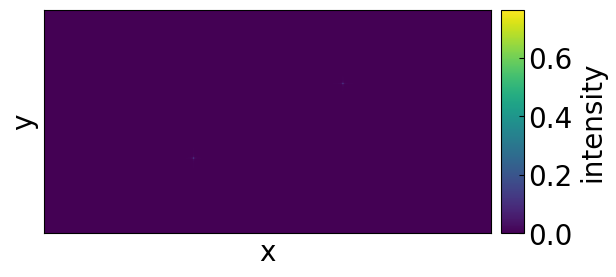

In [20]:
#For Figure 4 C comparing cutoff with flat top function and padding with no flat top function
"""
input_pattern
CeO2_111["A"]+CeO2_111["B"]+CeO2_111["C"]
O layer + upper Ce layer + O layer (1 layer of CeO2(111))
"""
del FT
FT = FTManager()
relative_intensity_cutoff_no_flat_top_function_0       = []
for bit_number in range (3,10):
    del FT,pp
    FT = FTManager()
    pp               = Preprocessing(scattering_factor_O)
    order_111_Ofirst      = {"preprocessings":["tile","cutoff"],\
                        "tile_number"    : [(2**(bit_number+1)//3+1),(2**(bit_number)//3+1)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Ofirst  = pp.preprocessing_parser(CeO2_111["A"], order_111_Ofirst)
    pp.clear(scattering_factor_Ce)
    order_111_Cefirst      = {"preprocessings":["tile","cutoff"],\
                        "tile_number"    : [(2**(bit_number+1)//3+1),(2**(bit_number)//3+1)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Cefirst  = pp.preprocessing_parser(CeO2_111["B"], order_111_Cefirst)
    pp.clear(scattering_factor_Ce)
    order_111_Osecond     = {"preprocessings":["tile","cutoff"],\
                        "tile_number"    : [(2**(bit_number+1)//3+1),(2**(bit_number)//3+1)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Osecond = pp.preprocessing_parser(CeO2_111["C"], order_111_Osecond)
    pp.clear(scattering_factor_O)
    order_111_Othird     = {"preprocessings":["tile","cutoff"],\
                        "tile_number"    : [(2**(bit_number+1)//3+1),(2**(bit_number)//3+1)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Othird = pp.preprocessing_parser(CeO2_111["D"], order_111_Othird)
    pp.clear(scattering_factor_O)
    order_111_Cedowner     = {"preprocessings":["tile","cutoff"],\
                        "tile_number"    : [(2**(bit_number+1)//3+1),(2**(bit_number)//3+1)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Cedowner = pp.preprocessing_parser(CeO2_111["E"], order_111_Cedowner)
    XFT_input        = pp.normalize(XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)
    DFT,FFT,QFT              = FT([XFT_input,XFT_input,XFT_input])
    relative_intensity_cutoff_no_flat_top_function_0.append([QFT[((2**(bit_number+1))//3),0]/QFT[0,0]])

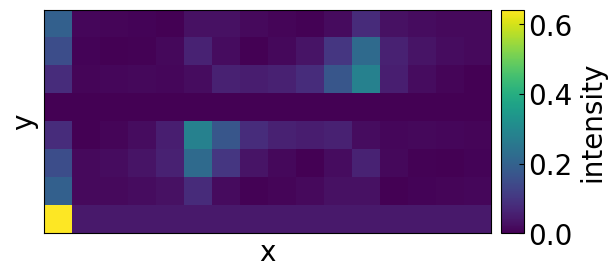

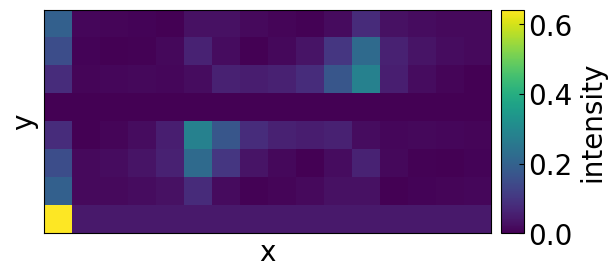

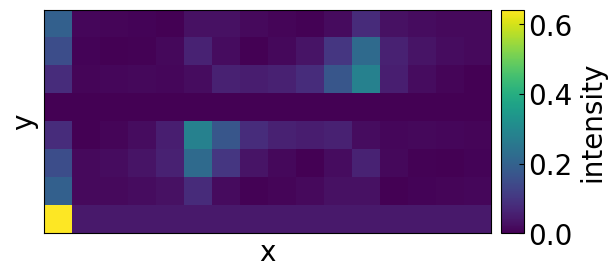

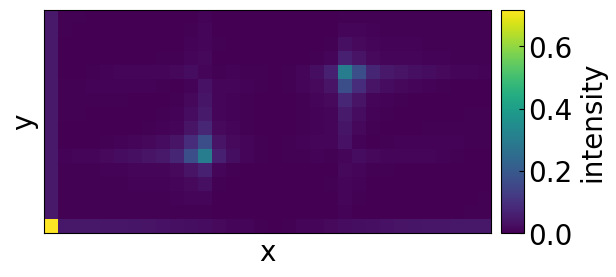

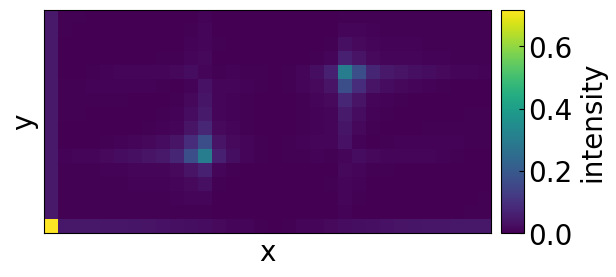

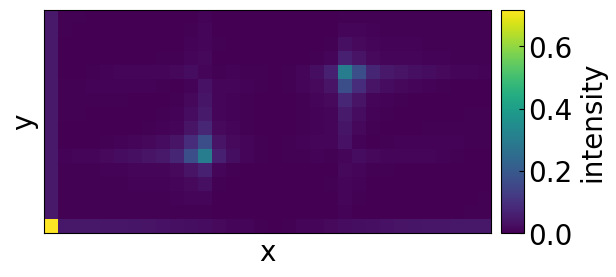

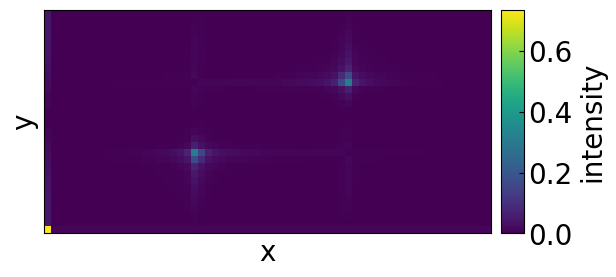

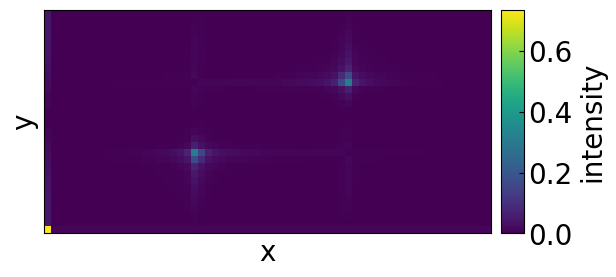

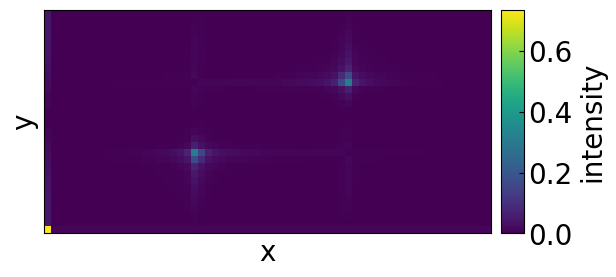

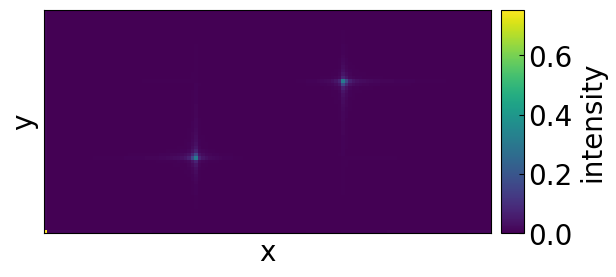

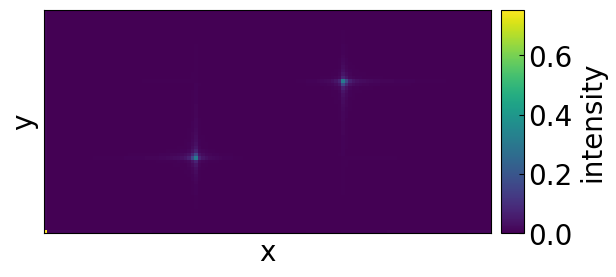

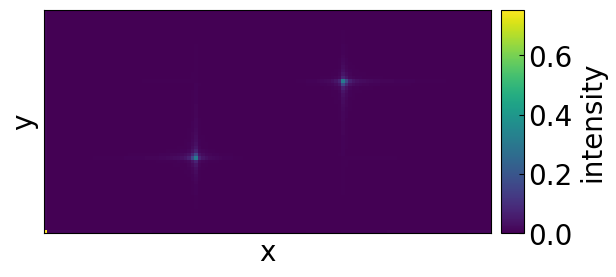

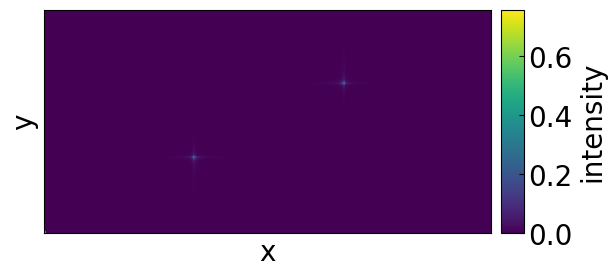

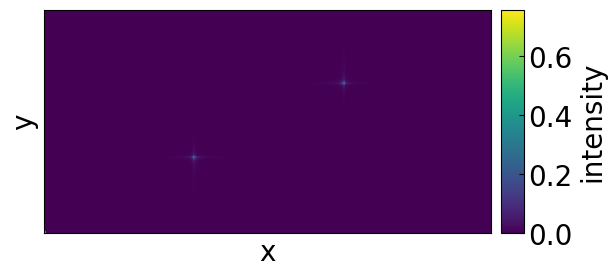

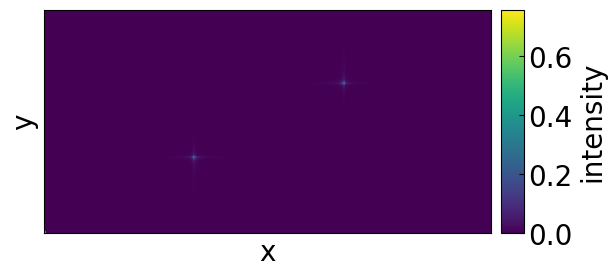

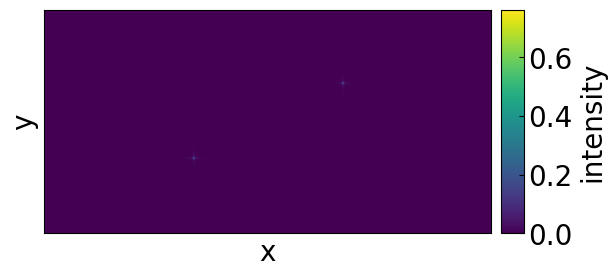

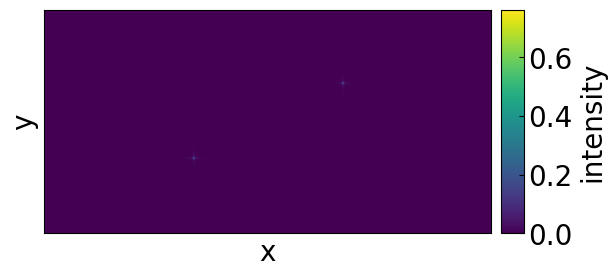

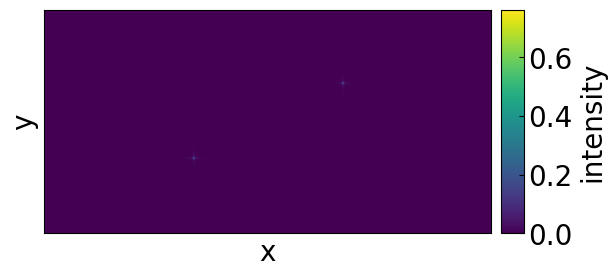

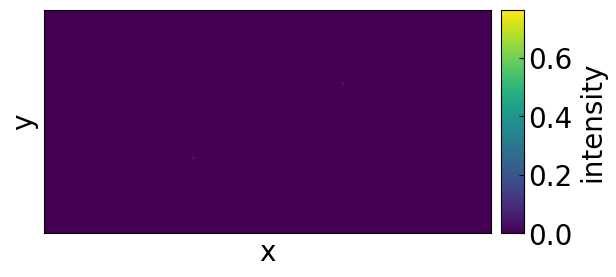

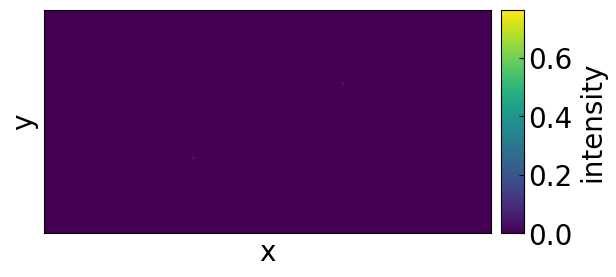

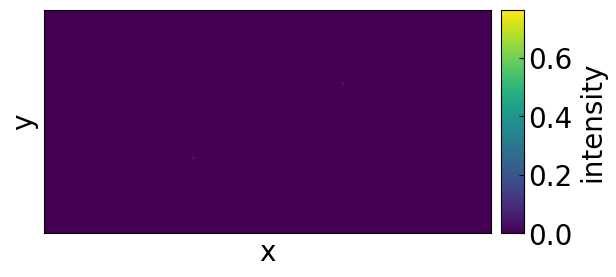

In [21]:
#for figure 4 C  #Zeropadding with no flat_top function with changing bit number 
relative_intensity_padding_no_flat_top_0       = []
del FT
FT = FTManager()
for bit_number in range (3,10):
    del FT
    FT = FTManager()
    pp               = Preprocessing(scattering_factor_O)
    order_111_Ofirst      = {"preprocessings":["tile","padding"],\
                        "tile_number"    : [(2**(bit_number+1)//3),(2**(bit_number)//3)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Ofirst  = pp.preprocessing_parser(CeO2_111["A"], order_111_Ofirst)
    pp.clear(scattering_factor_Ce)
    order_111_Cefirst      = {"preprocessings":["tile","padding"],\
                        "tile_number"    : [(2**(bit_number+1)//3),(2**(bit_number)//3)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Cefirst  = pp.preprocessing_parser(CeO2_111["B"], order_111_Cefirst)
    pp.clear(scattering_factor_Ce)
    order_111_Osecond     = {"preprocessings":["tile","padding"],\
                        "tile_number"    : [(2**(bit_number+1)//3),(2**(bit_number)//3)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Osecond = pp.preprocessing_parser(CeO2_111["C"], order_111_Osecond)
    XFT_input        = pp.normalize(XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)
    DFT,FFT,QFT              = FT([XFT_input,XFT_input,XFT_input])
    relative_intensity_padding_no_flat_top_0.append([QFT[((2**(bit_number+1))//3),0]/QFT[0,0]])

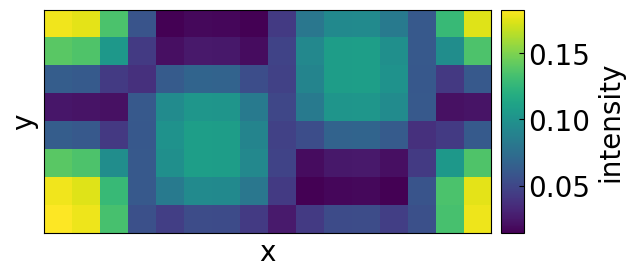

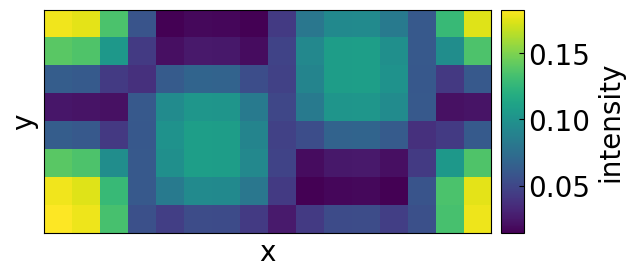

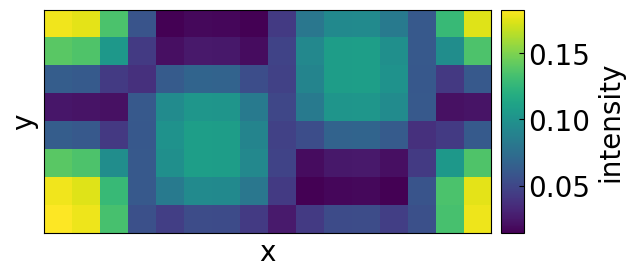

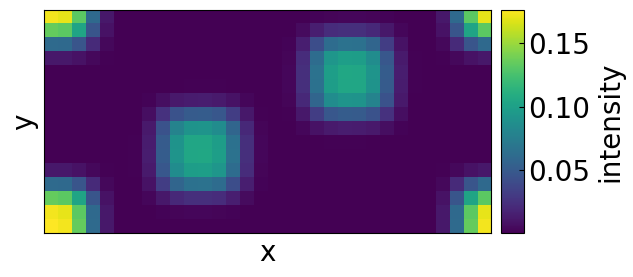

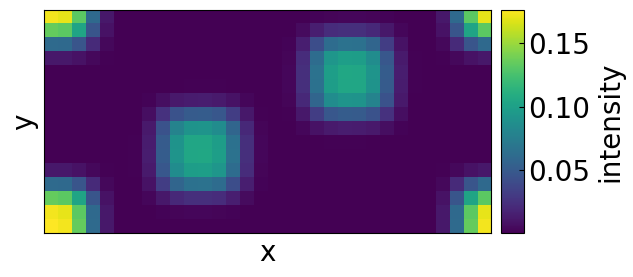

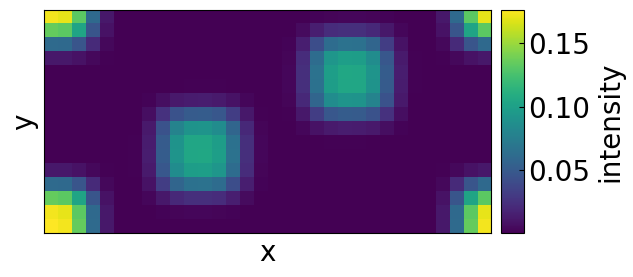

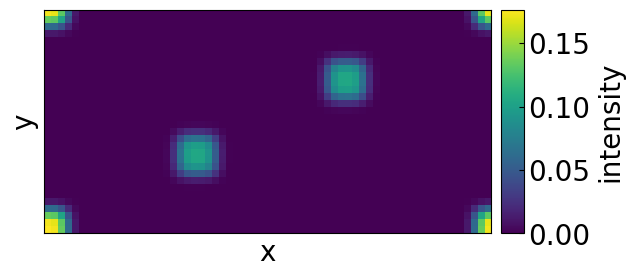

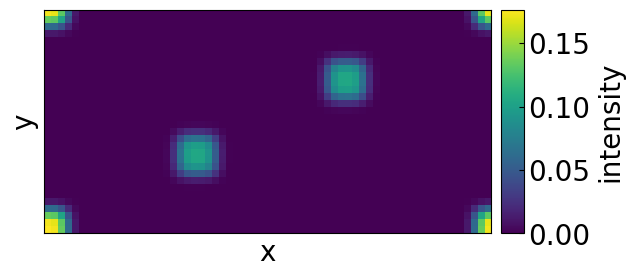

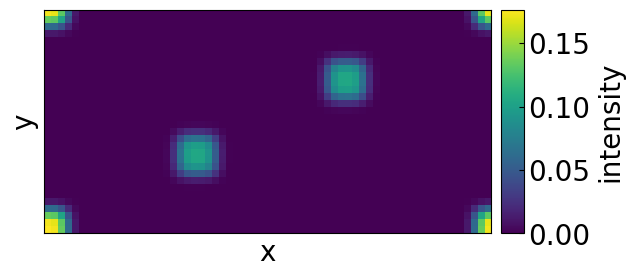

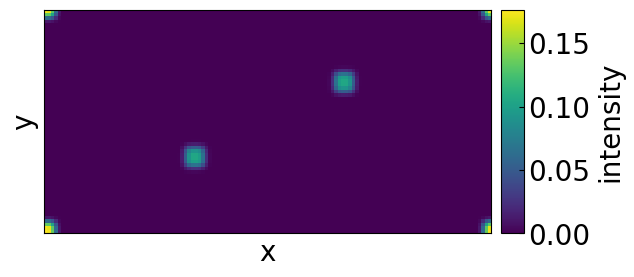

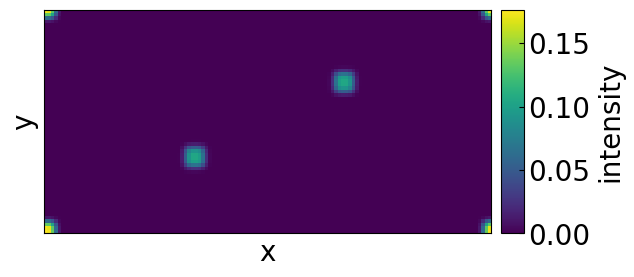

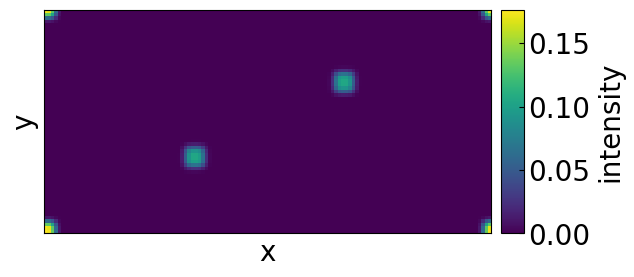

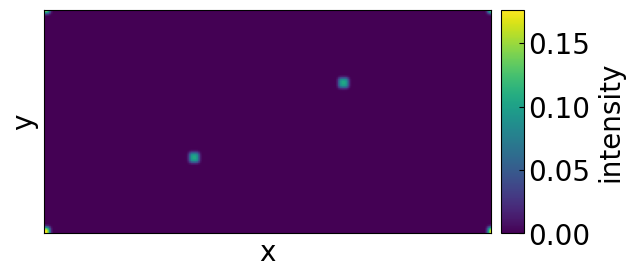

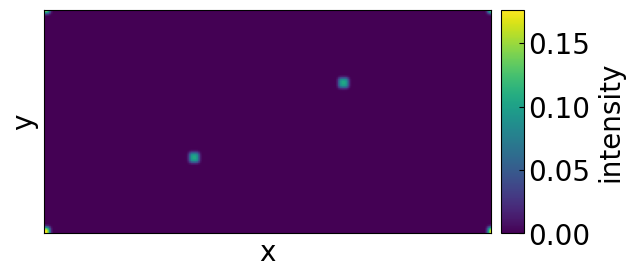

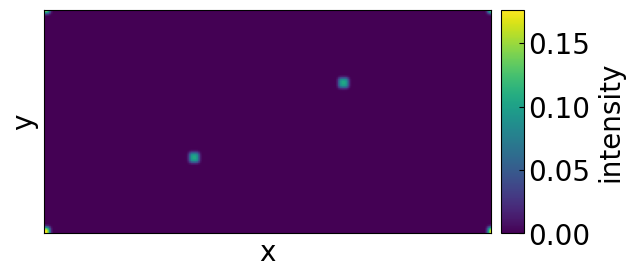

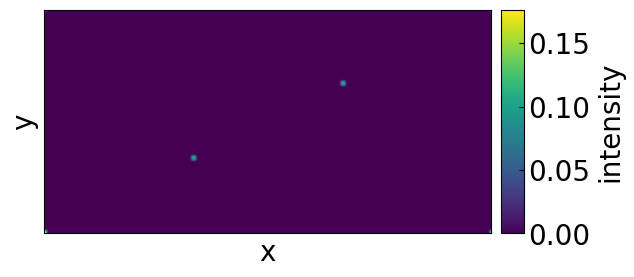

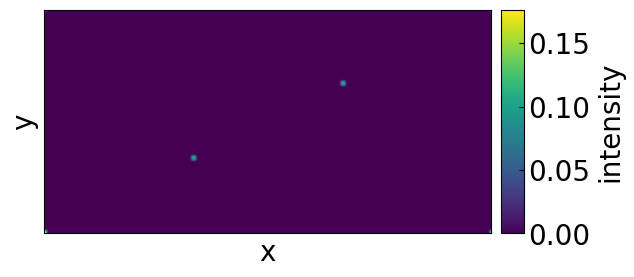

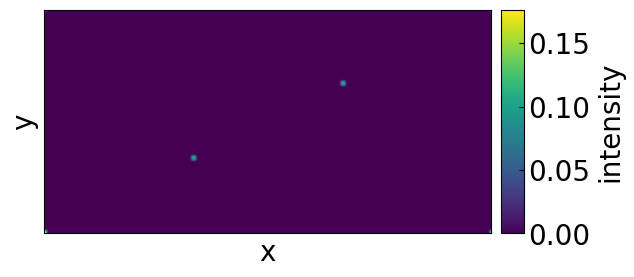

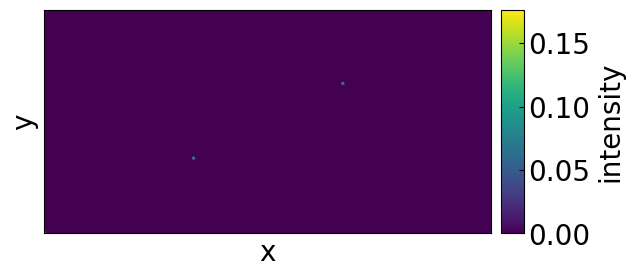

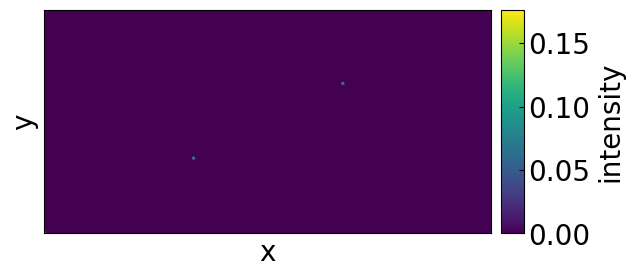

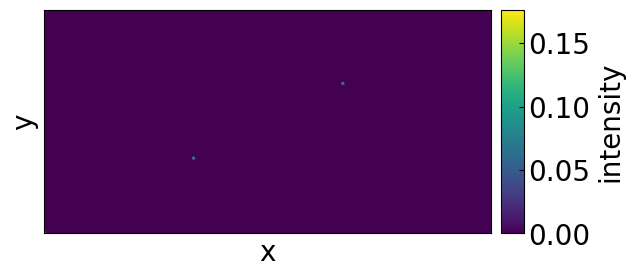

In [22]:
#for figure 4 C, D #cutoff with flat_top function with changing bit number 

"""
input_pattern
first_layer (CeO2_111["A"]+CeO2_111["B"]+CeO2_111["C"]) +second layer (CeO2_111["D"]+CeO2_111["E"]+CeO2_111["A"])
+third layer (CeO2_111["B"]+CeO2_111["F"]+CeO2_111["C"])
first O layer + second layer + third layer (changing layer of CeO2(111))
"""
relative_intensity_cutoff_with_flat_top_function_0       = []
del FT
FT = FTManager()
for bit_number in range (3,10):
    del FT
    FT = FTManager()
    pp               = Preprocessing(scattering_factor_O)
    order_111_Ofirst      = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                        "tile_number"    : [(2**(bit_number+1)//3+1),(2**(bit_number)//3+1)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Ofirst  = pp.preprocessing_parser(CeO2_111["A"], order_111_Ofirst)
    pp.clear(scattering_factor_Ce)
    order_111_Cefirst      = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                        "tile_number"    : [(2**(bit_number+1)//3+1),(2**(bit_number)//3+1)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Cefirst  = pp.preprocessing_parser(CeO2_111["B"], order_111_Cefirst)
    pp.clear(scattering_factor_Ce)
    order_111_Osecond     = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                        "tile_number"    : [(2**(bit_number+1)//3+1),(2**(bit_number)//3+1)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Osecond = pp.preprocessing_parser(CeO2_111["C"], order_111_Osecond)
    XFT_input        = pp.normalize(XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)
    DFT,FFT,QFT              = FT([XFT_input,XFT_input,XFT_input])
    relative_intensity_cutoff_with_flat_top_function_0.append([QFT[((2**(bit_number+1))//3),0]/QFT[0,0]])

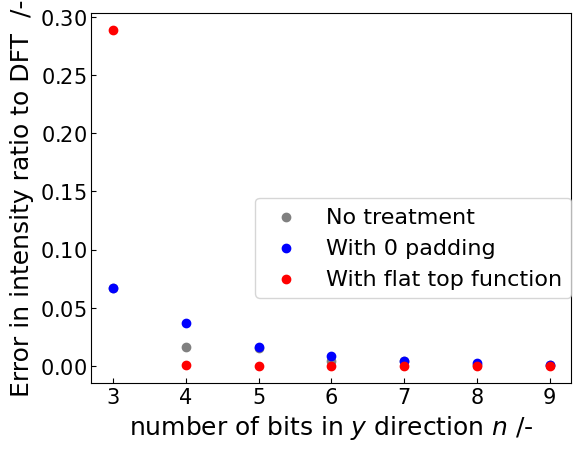

In [23]:
#Figure 4 C comparing cutoff with no and flat top function and padding with no flat top function in [n,0]
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import matplotlib.ticker as ptick
x =  np.array(range(3, 10))
y_1 = np.abs(np.abs(relative_intensity_cutoff_no_flat_top_function_0))
y_2 = np.abs(np.abs(relative_intensity_padding_no_flat_top_0))
y_3 = np.abs((np.abs(relative_intensity_cutoff_with_flat_top_function_0)))

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.scatter(x, y_1, c= 'gray')
plt.scatter(x, y_2, c= 'blue')
plt.scatter(x, y_3, c= 'red')

plt.xlabel("number of bits in $\it{ y }$ direction $\it{ n }$ /-",fontsize = 18)
plt.ylabel("Error in intensity ratio to DFT  /-",fontsize = 18)
plt.legend(["No treatment","With 0 padding","With flat top function"],bbox_to_anchor=(1, 0.5),loc='upper right',borderaxespad=0,fontsize = 16) 
plt.tick_params(labelsize=15)
plt.subplot().yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
plt.subplot().yaxis.offsetText.set_fontsize(16)
plt.savefig(fname = "Fig4C.svg",transparent = True)
plt.show()

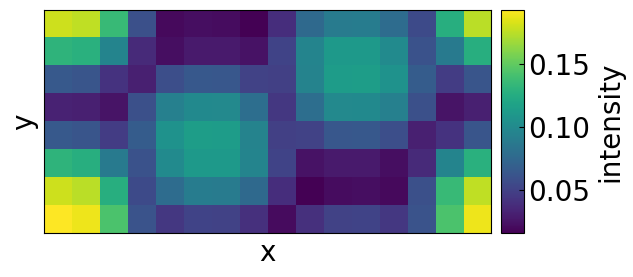

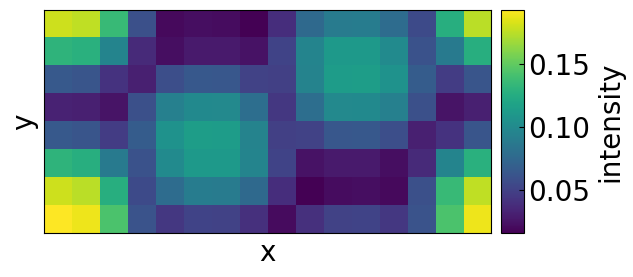

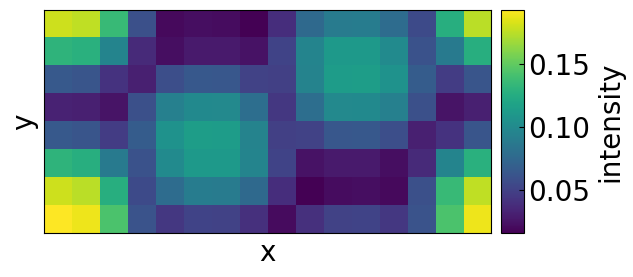

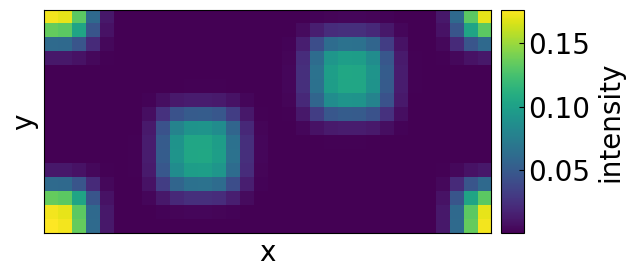

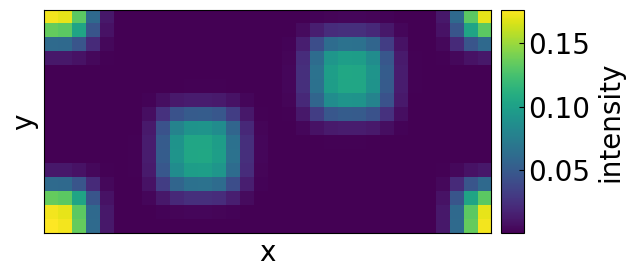

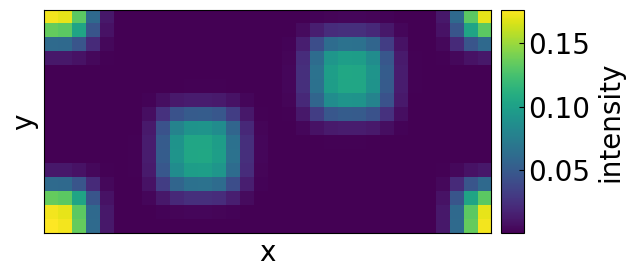

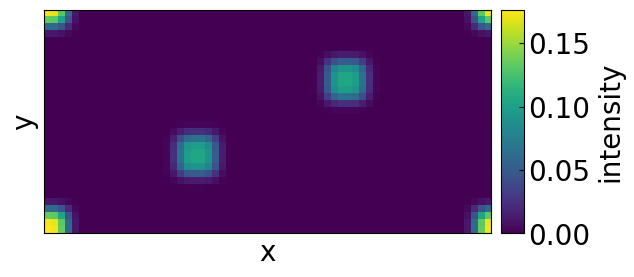

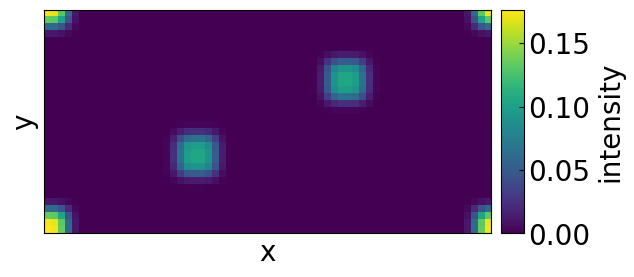

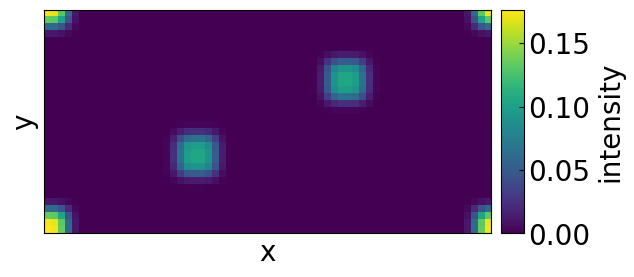

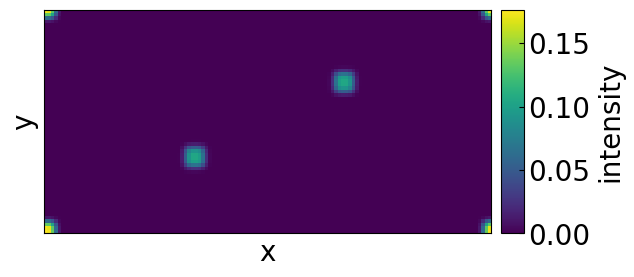

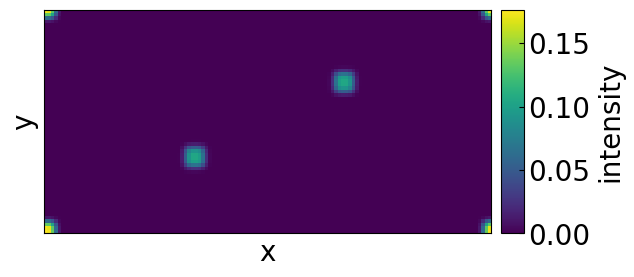

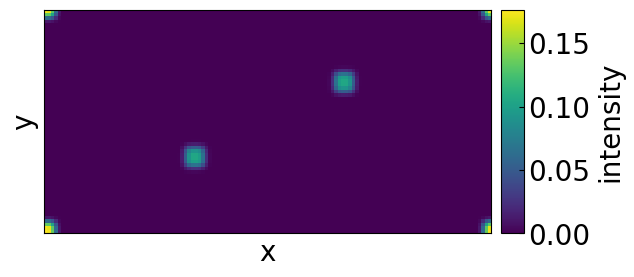

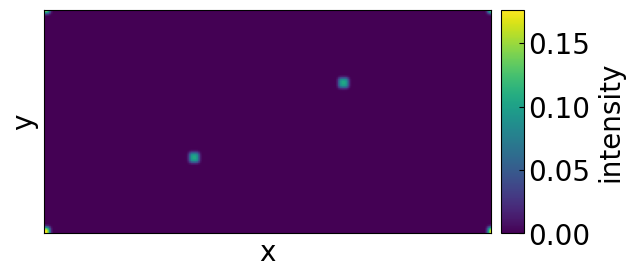

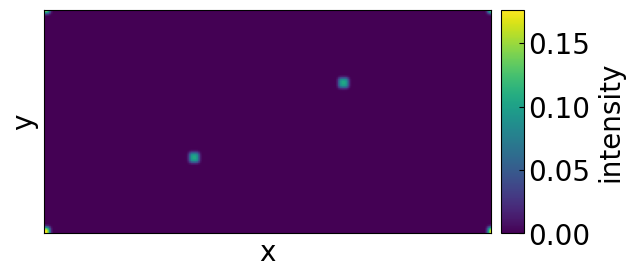

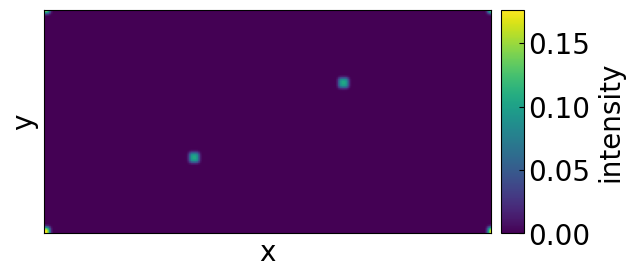

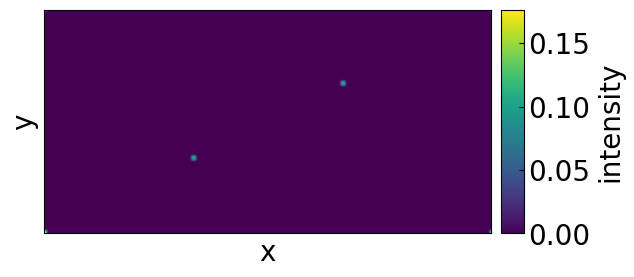

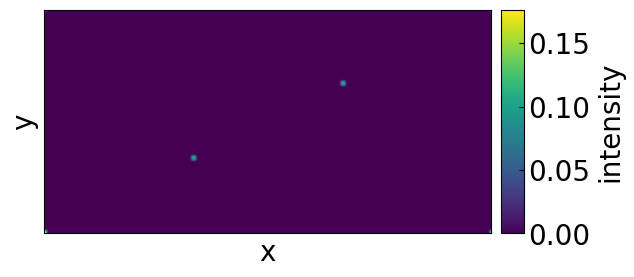

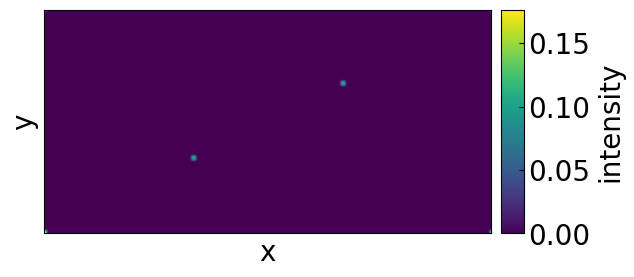

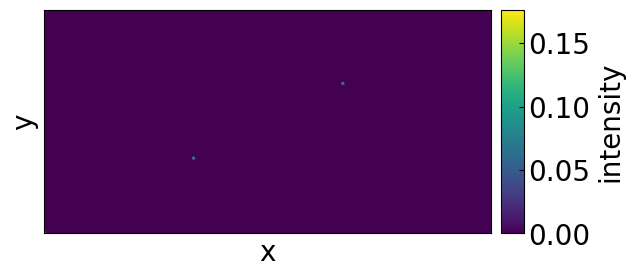

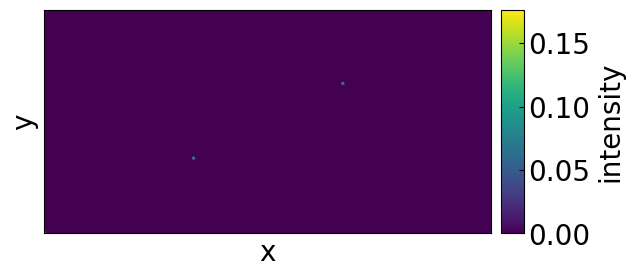

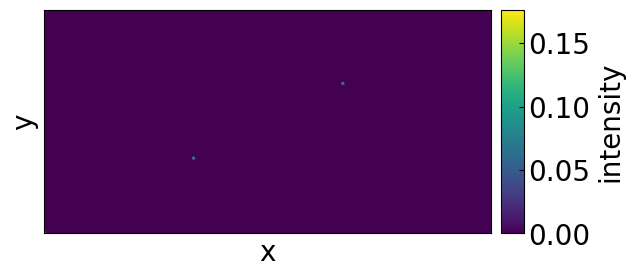

In [24]:
#Figure 4 D comparing cutoff with flat top function and padding with no flat top function
relative_intensity_padding_with_flat_top_function_0       = []
for bit_number in range (3,10):
    del FT
    FT = FTManager()
    pp               = Preprocessing(scattering_factor_O)
    order_111_Ofirst      = {"preprocessings":["tile","padding","multiple_flat_top_window"],\
                        "tile_number"    : [(2**(bit_number+1)//3),(2**(bit_number)//3)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Ofirst  = pp.preprocessing_parser(CeO2_111["A"], order_111_Ofirst)
    pp.clear(scattering_factor_Ce)
    order_111_Cefirst      = {"preprocessings":["tile","padding","multiple_flat_top_window"],\
                        "tile_number"    : [(2**(bit_number+1)//3),(2**(bit_number)//3)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Cefirst  = pp.preprocessing_parser(CeO2_111["B"], order_111_Cefirst)
    pp.clear(scattering_factor_Ce)
    order_111_Osecond     = {"preprocessings":["tile","padding","multiple_flat_top_window"],\
                        "tile_number"    : [(2**(bit_number+1)//3),(2**(bit_number)//3)],\
                        "padding_values"  :0,\
                        "cutoff_length"  :[2**(bit_number+1),2**(bit_number)],\
                        "d"             : d_CeO2_111,\
                        "DW"            : DW_CeO2}
    XFT_input_111_Osecond = pp.preprocessing_parser(CeO2_111["C"], order_111_Osecond)
    XFT_input        = pp.normalize(XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)
    DFT,FFT,QFT              = FT([XFT_input,XFT_input,XFT_input])
    relative_intensity_padding_with_flat_top_function_0.append([QFT[((2**(bit_number+1))//3),0]/QFT[0,0]])

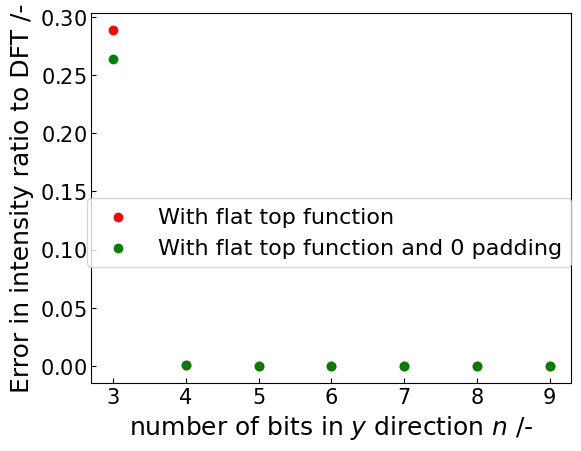

In [25]:
#Figure 4 D comparing cutoff with flat top function and padding with no flat top function
x =  np.array(range(3, 10))
y_1 = (np.abs((np.abs(relative_intensity_cutoff_with_flat_top_function_0))))
y_2 = (np.abs((np.abs(relative_intensity_padding_with_flat_top_function_0))))

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.subplot.left'] = 0.15

plt.scatter(x, y_1, c= 'red')
plt.scatter(x, y_2, c= 'green')

plt.xlabel("number of bits in $\it{ y }$ direction $\it{ n }$ /-",fontsize = 18)
plt.ylabel("Error in intensity ratio to DFT /-",fontsize = 18)
plt.legend(["With flat top function", "With flat top function and 0 padding"],bbox_to_anchor=(1, 0.5),loc='upper right',borderaxespad=0,fontsize = 16)
plt.subplot().yaxis.set_major_formatter(ptick.ScalarFormatter(useMathText=True)) 
plt.subplot().yaxis.offsetText.set_fontsize(16)
plt.tick_params(labelsize=15)
plt.savefig(fname = "Fig4D.svg",transparent = True)
plt.show()

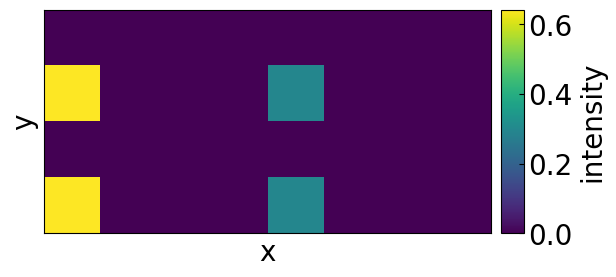

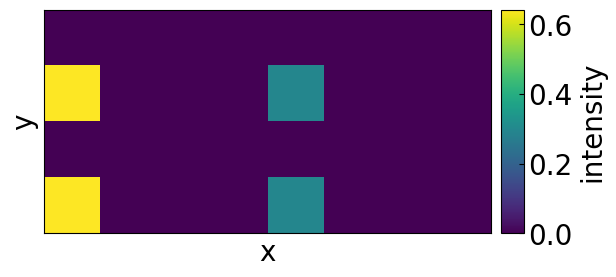

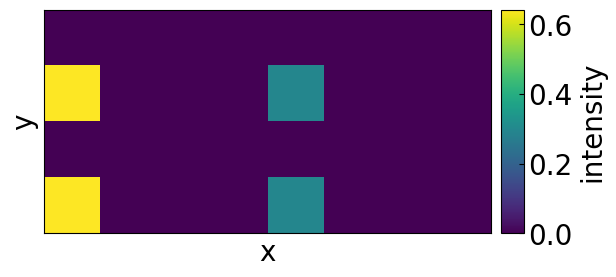

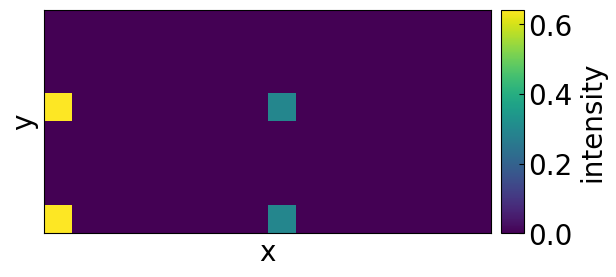

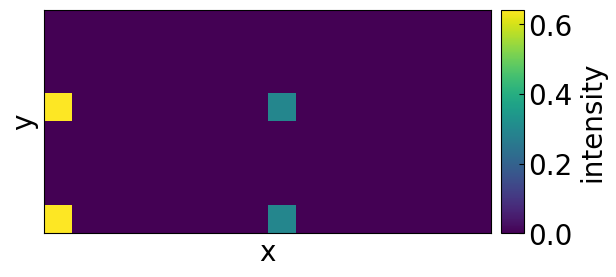

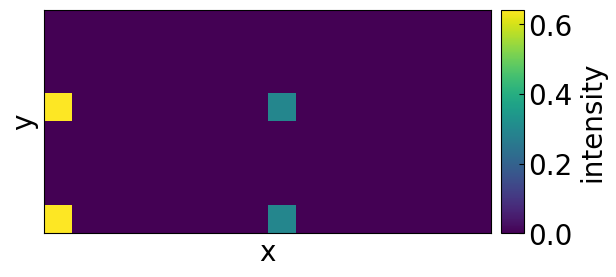

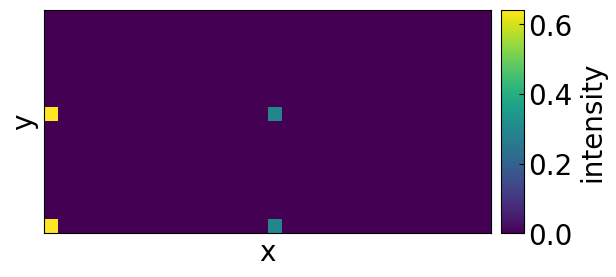

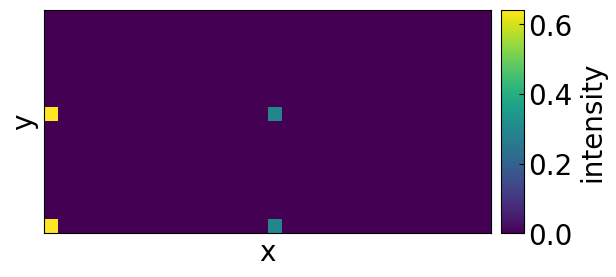

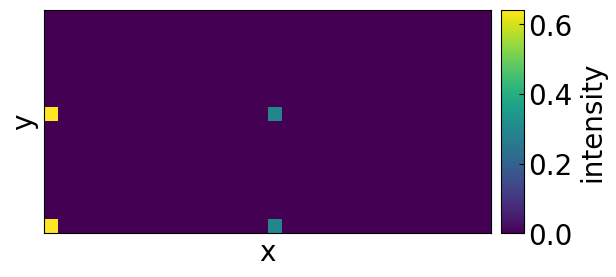

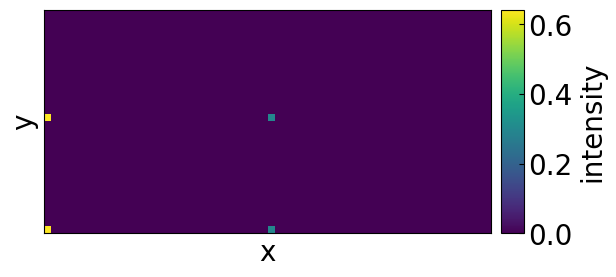

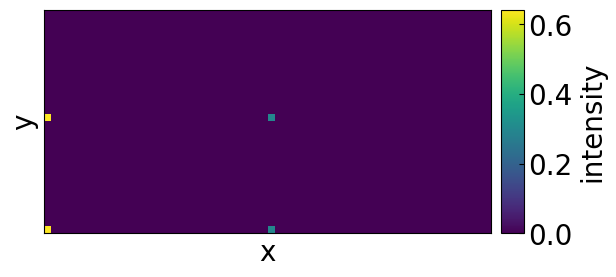

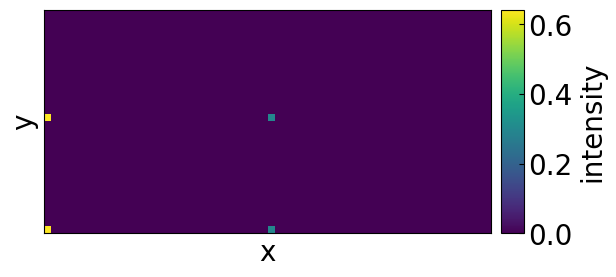

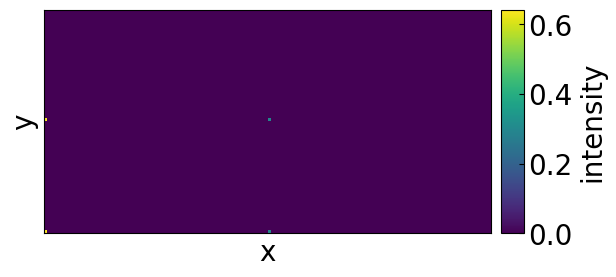

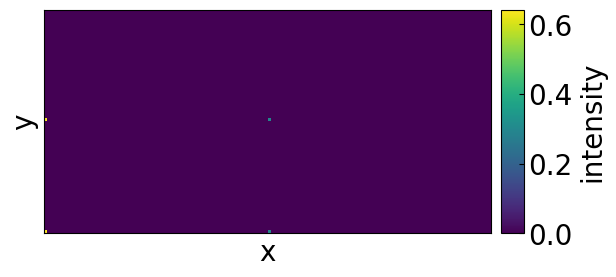

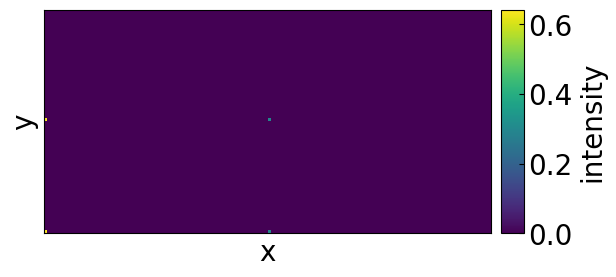

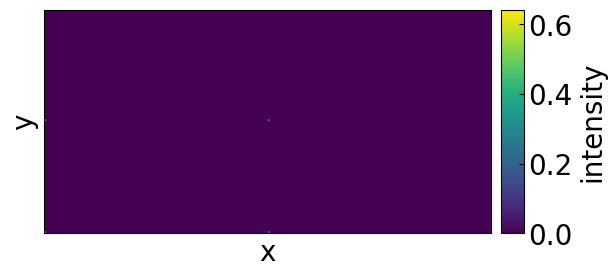

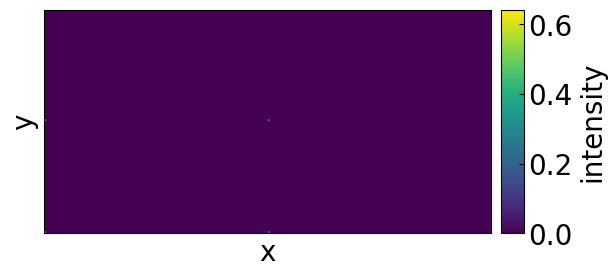

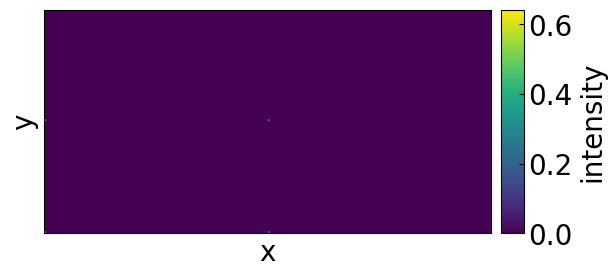

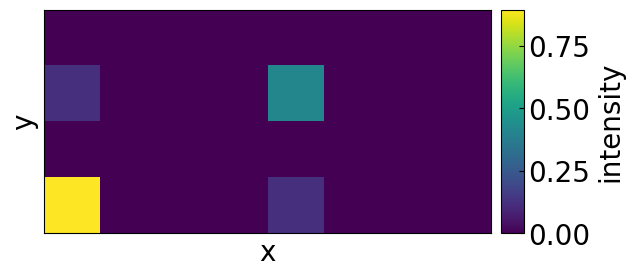

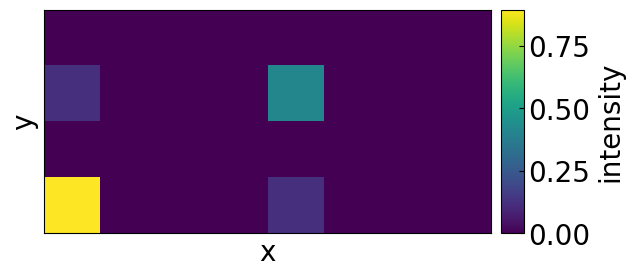

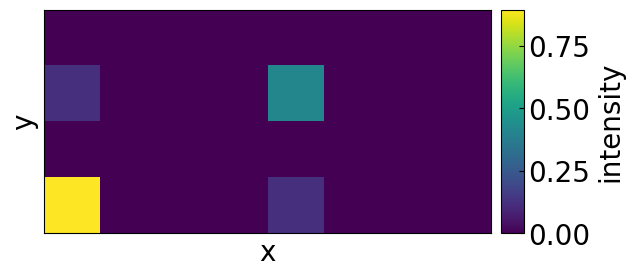

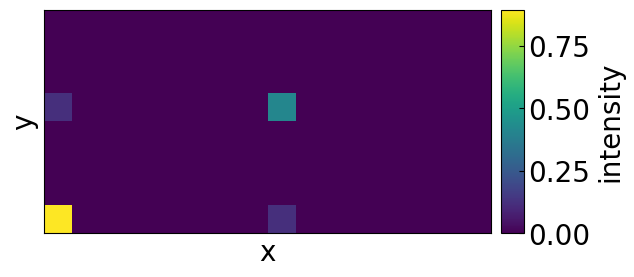

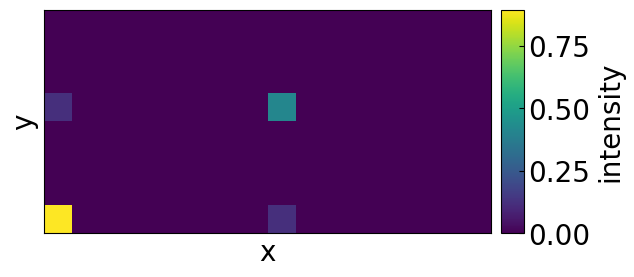

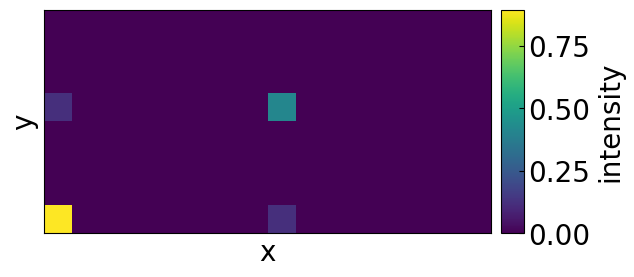

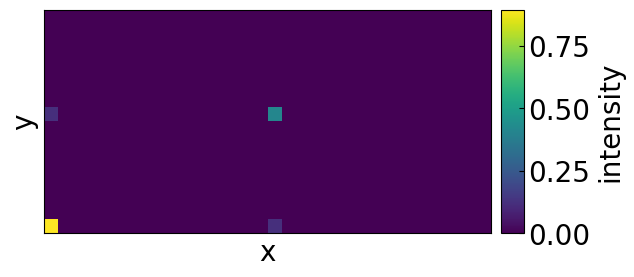

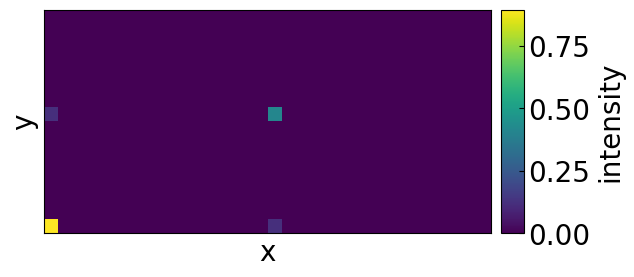

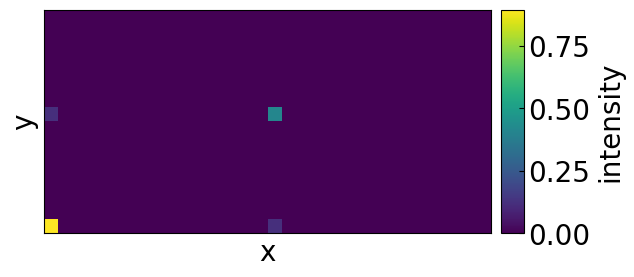

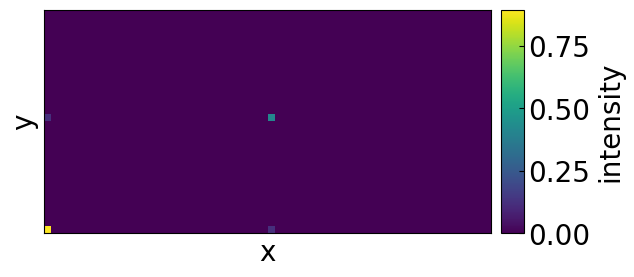

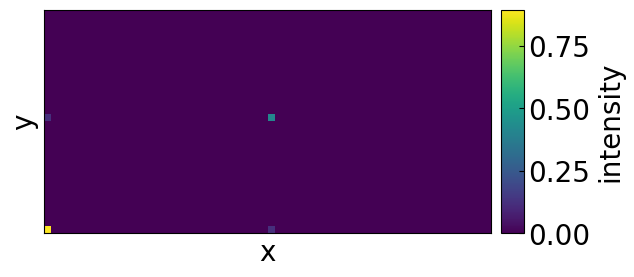

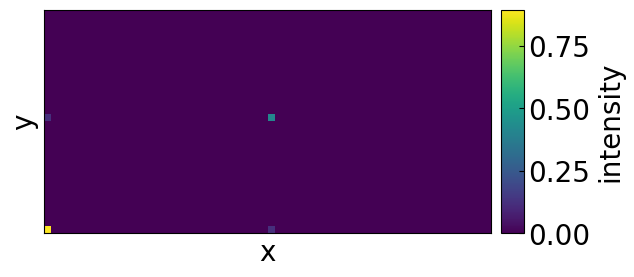

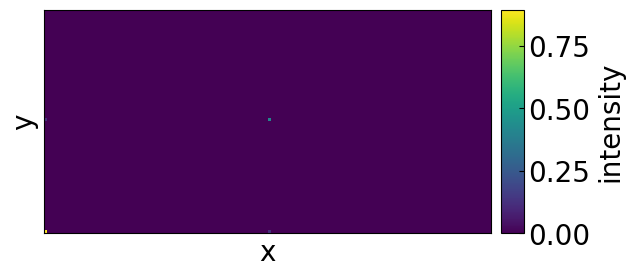

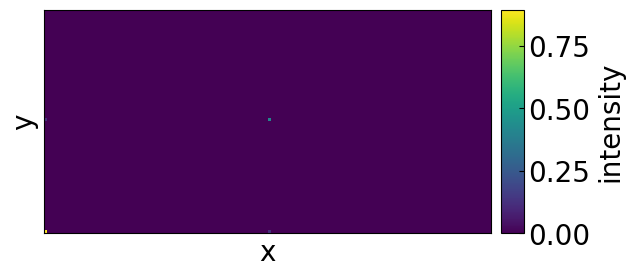

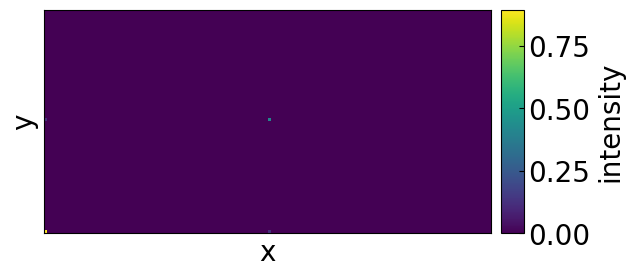

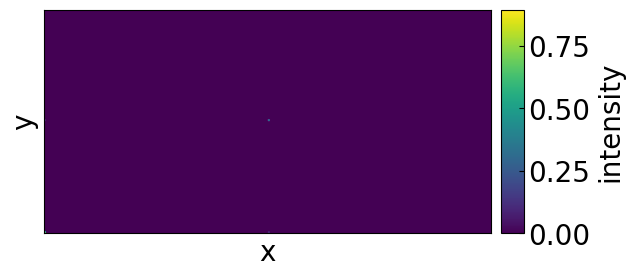

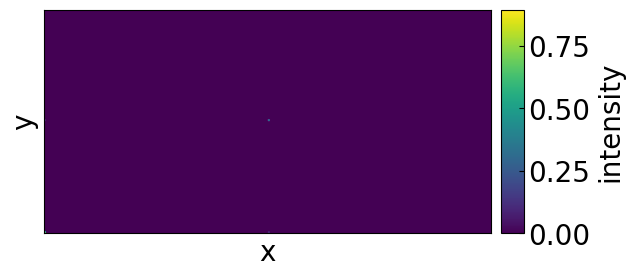

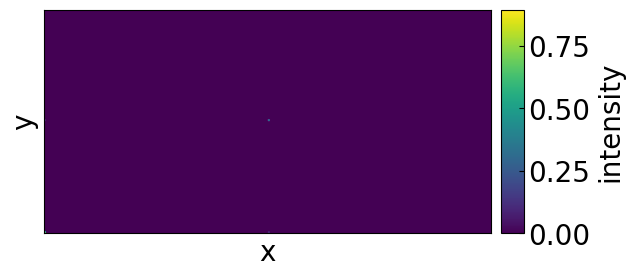

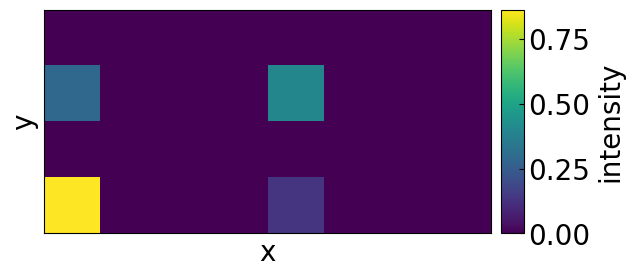

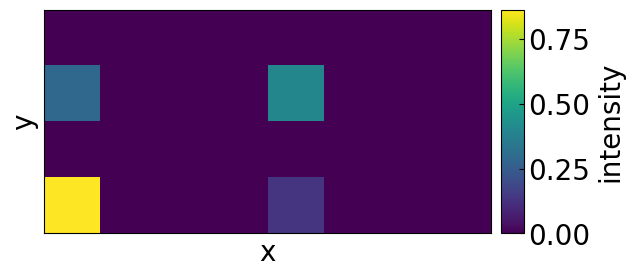

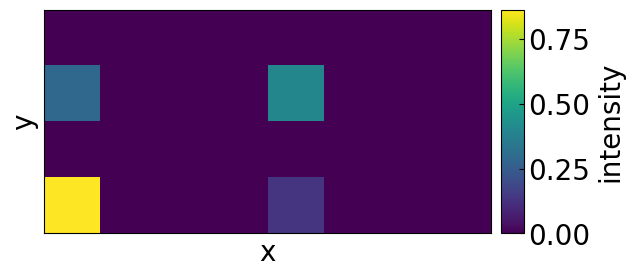

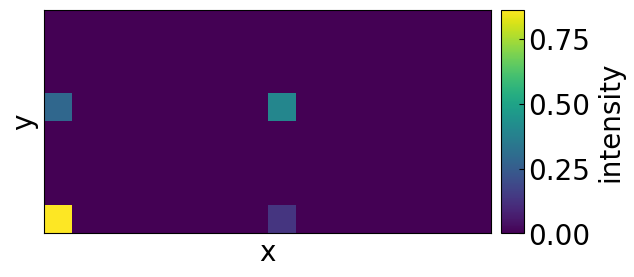

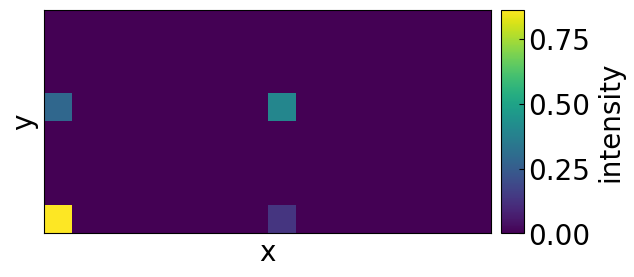

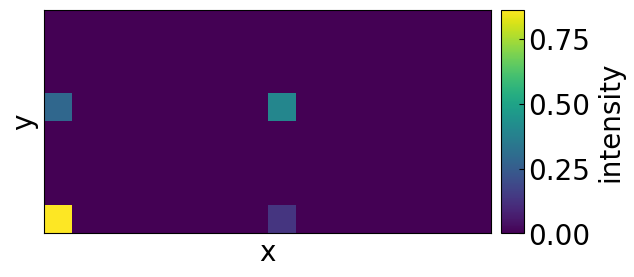

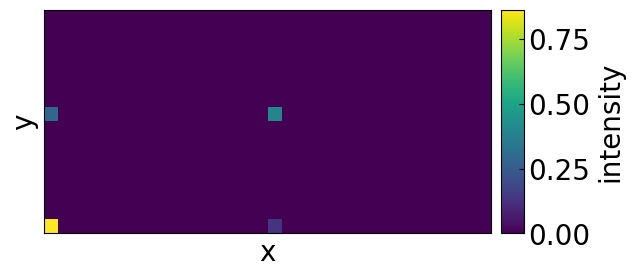

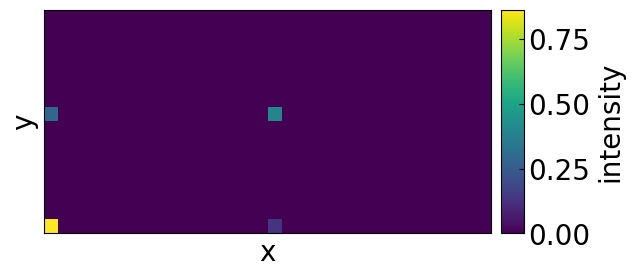

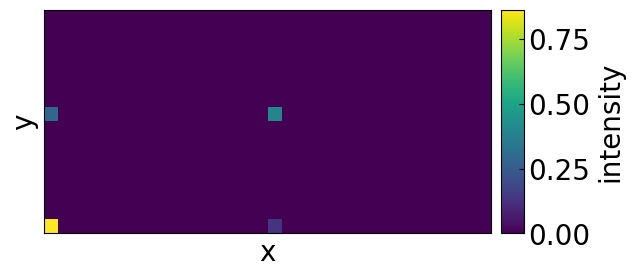

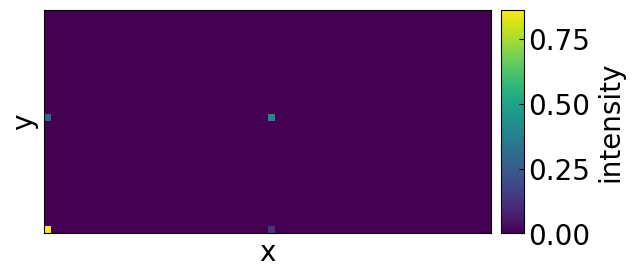

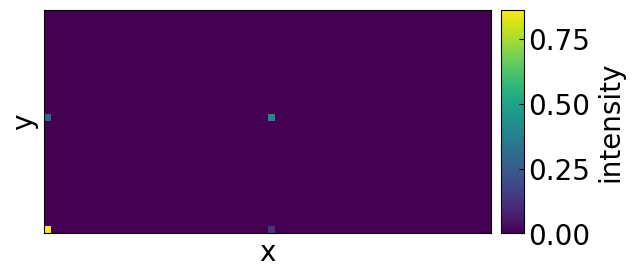

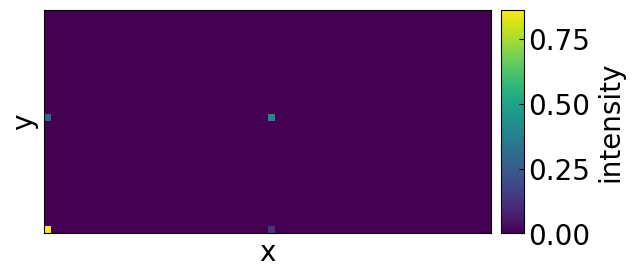

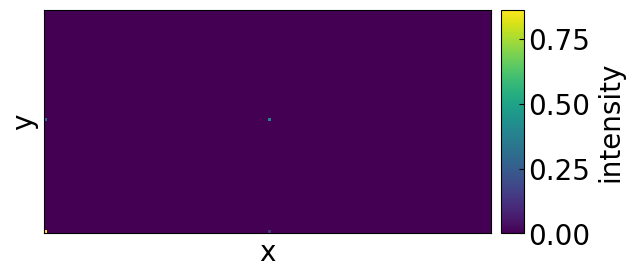

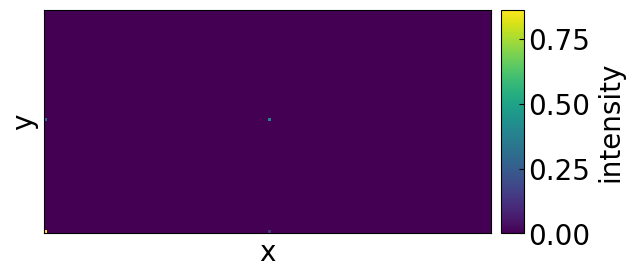

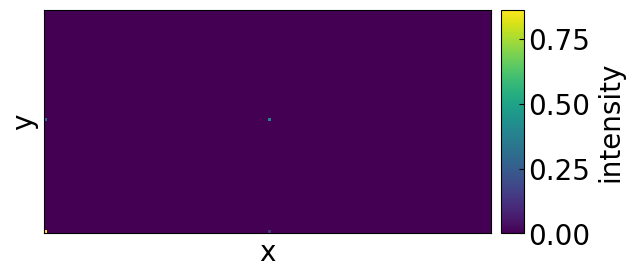

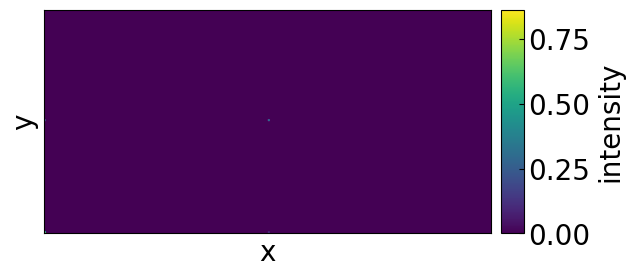

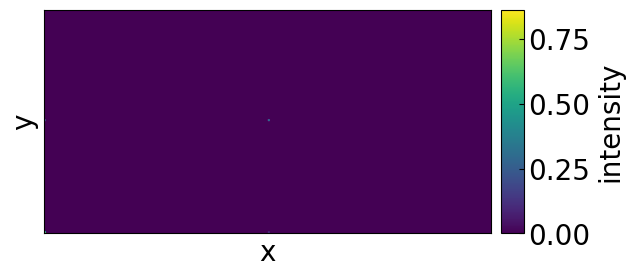

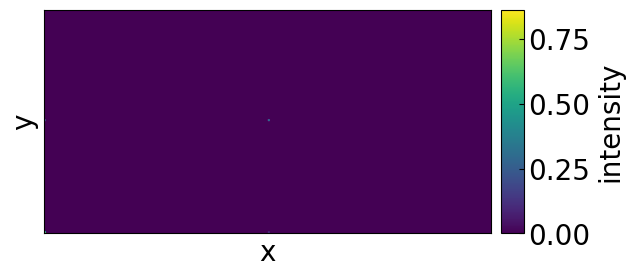

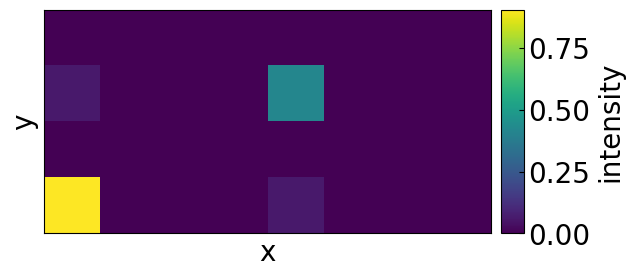

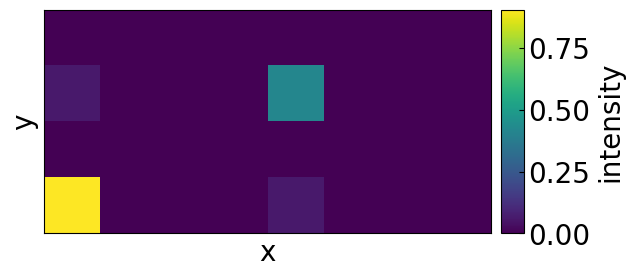

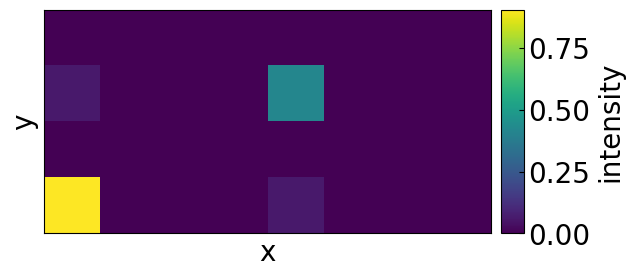

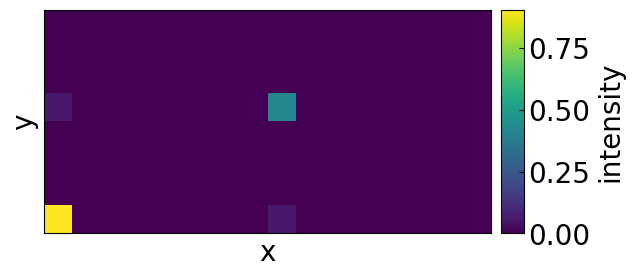

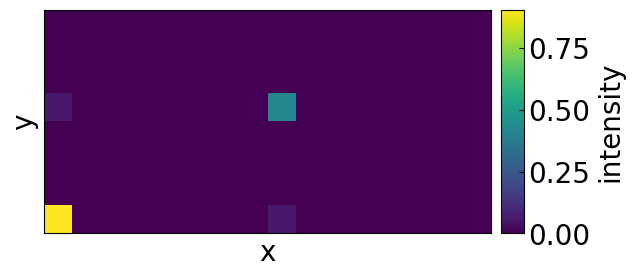

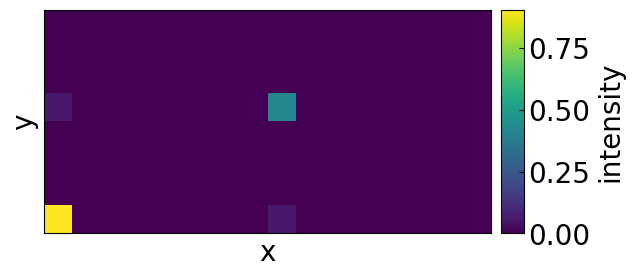

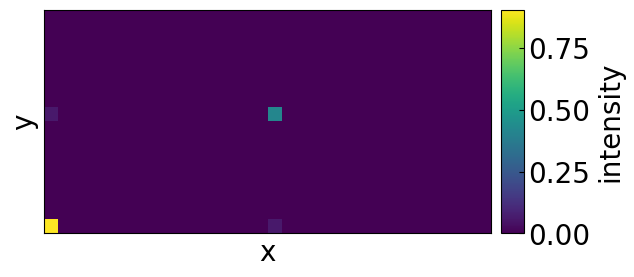

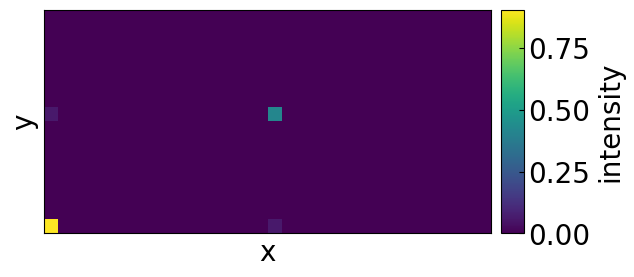

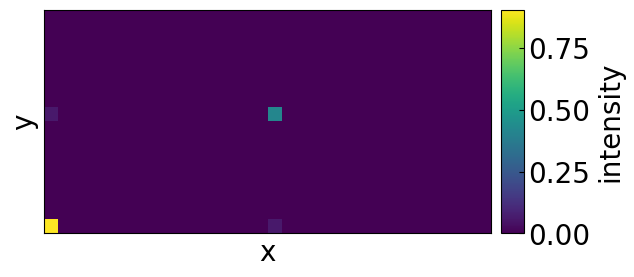

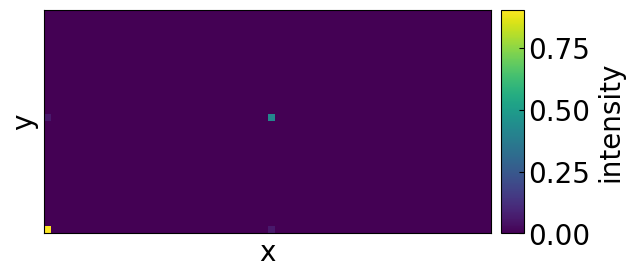

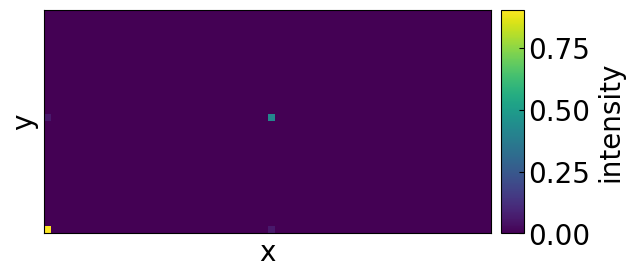

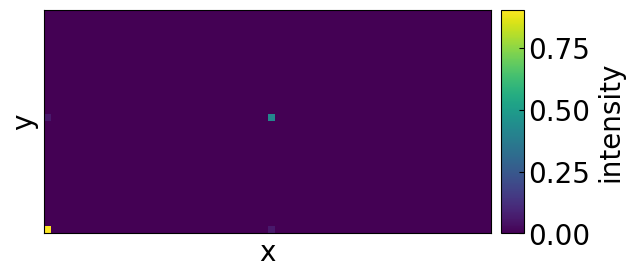

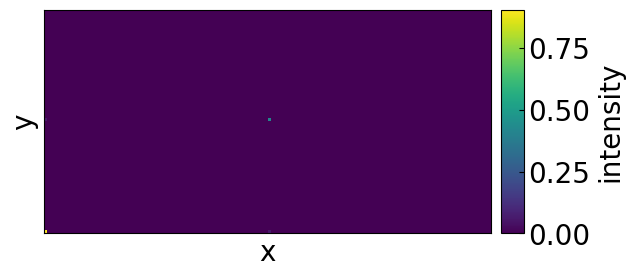

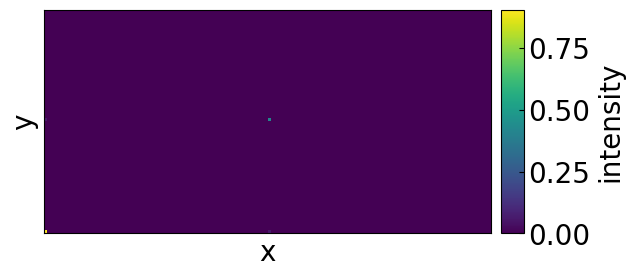

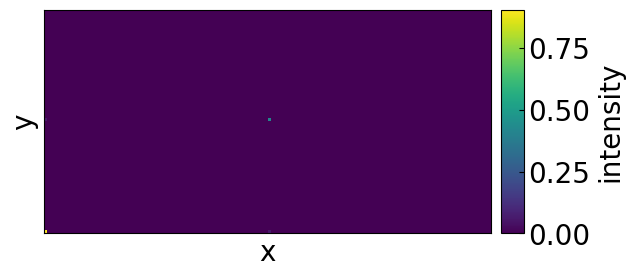

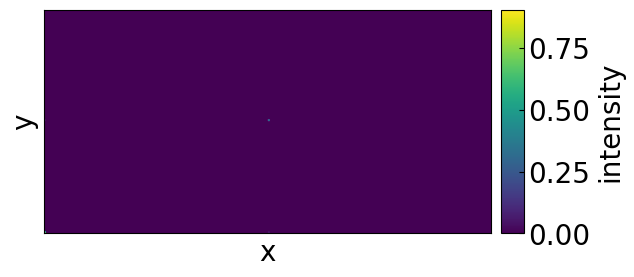

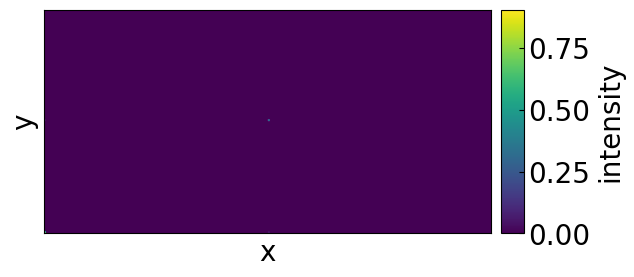

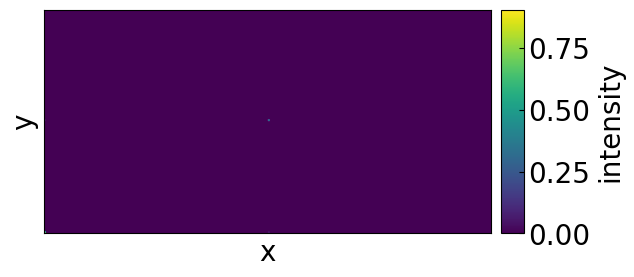

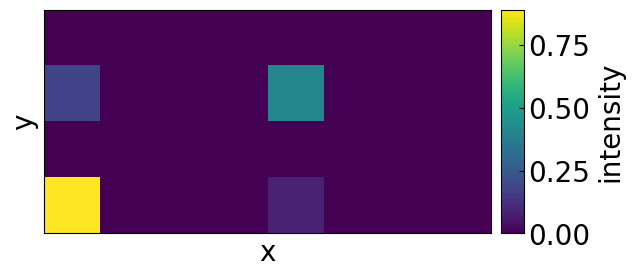

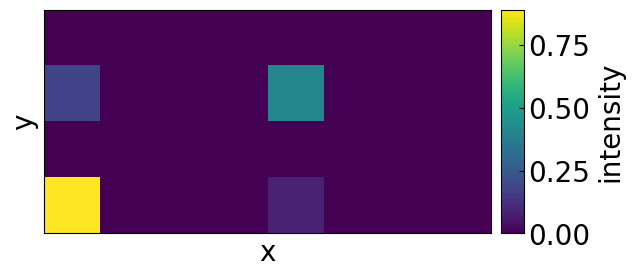

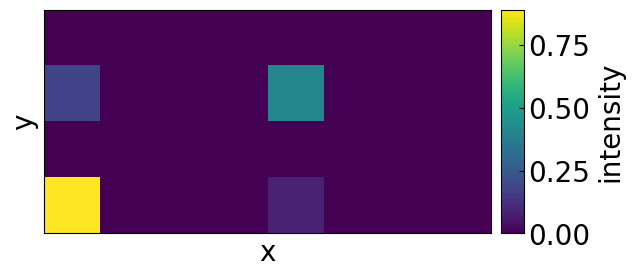

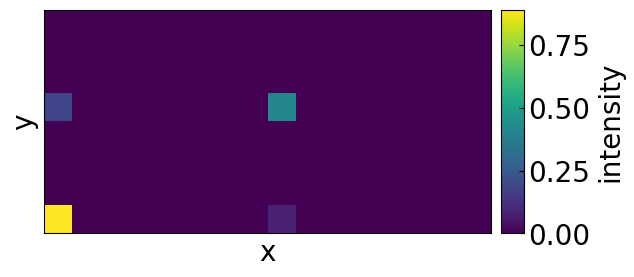

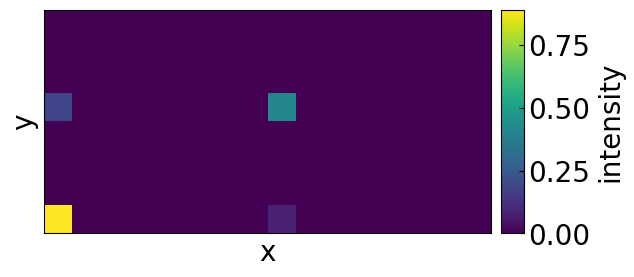

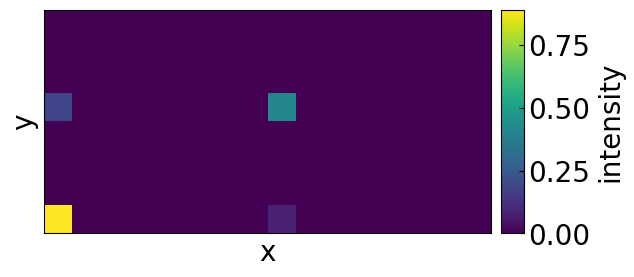

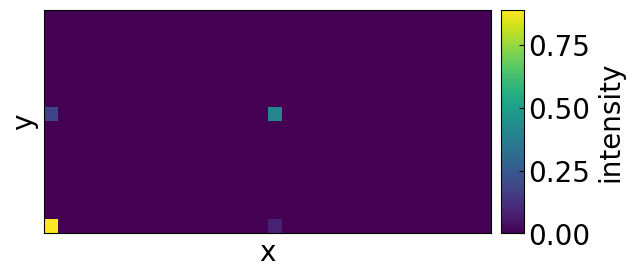

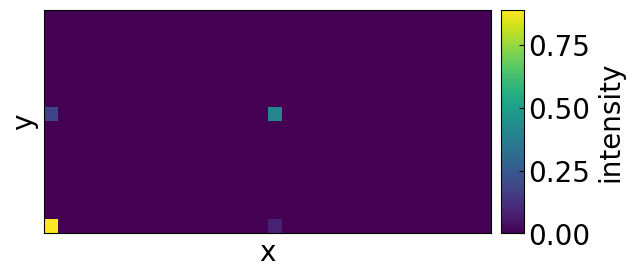

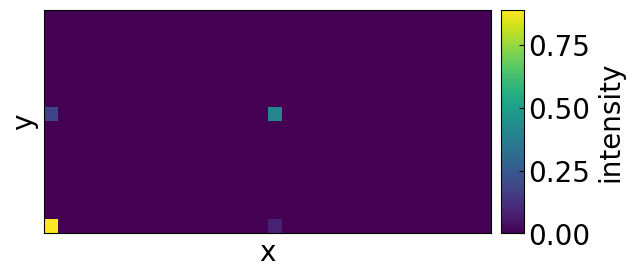

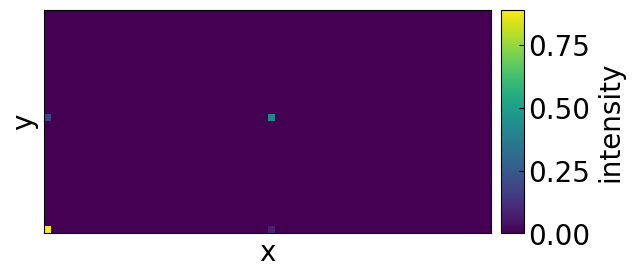

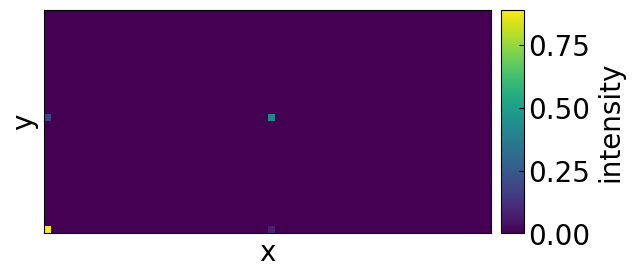

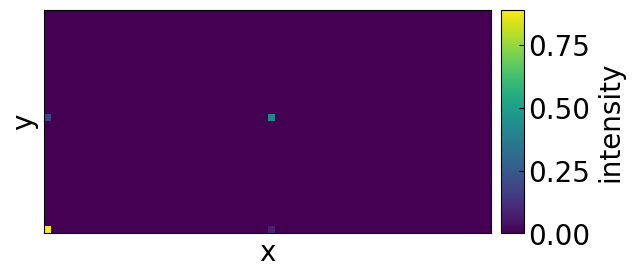

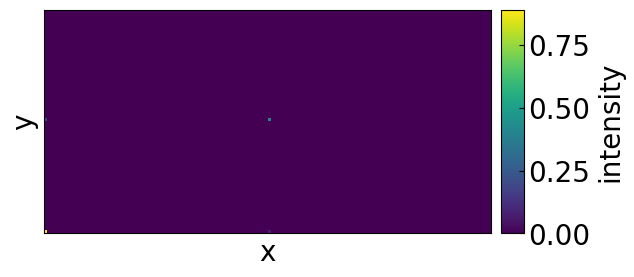

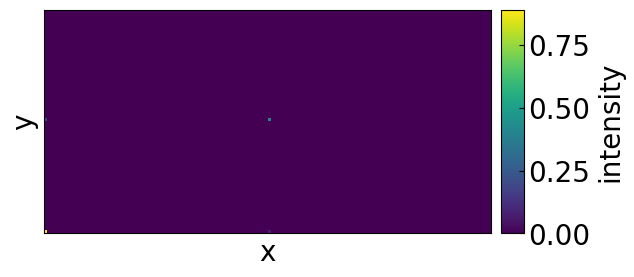

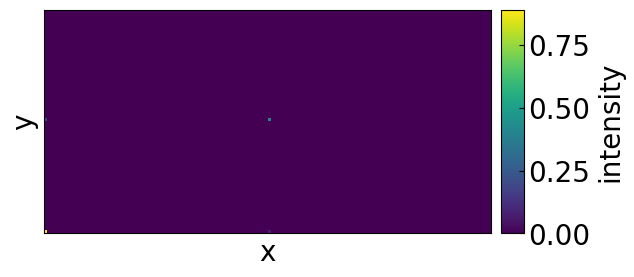

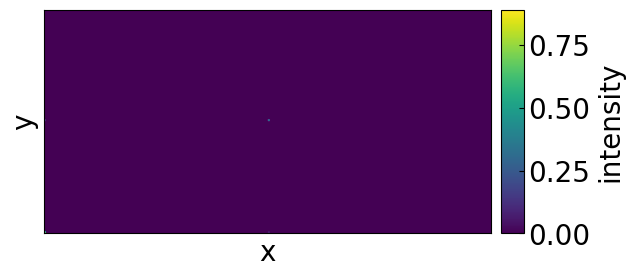

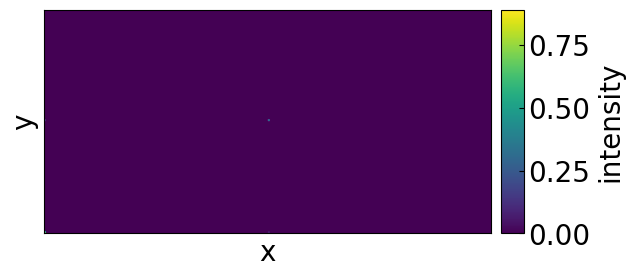

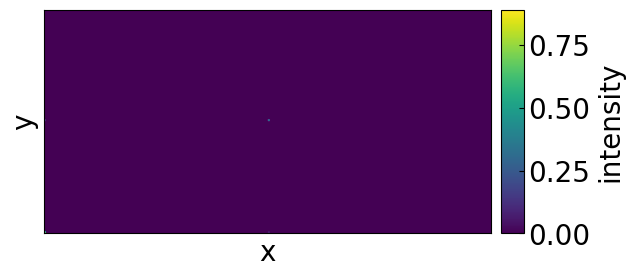

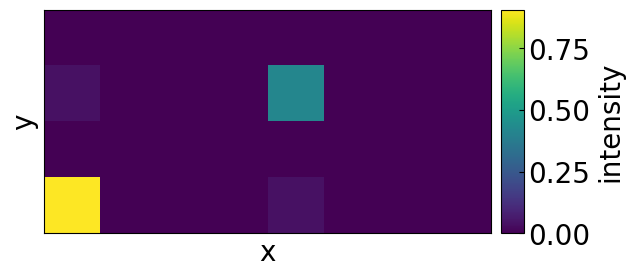

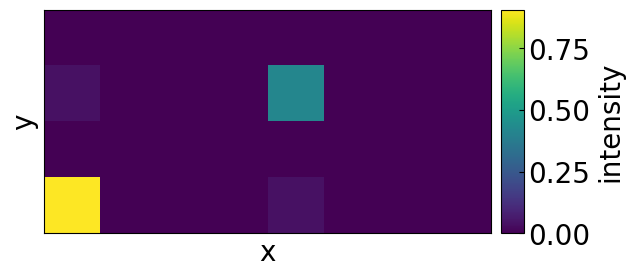

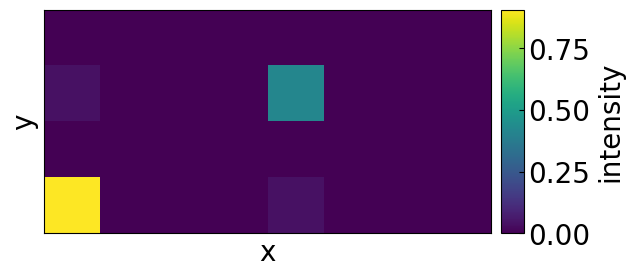

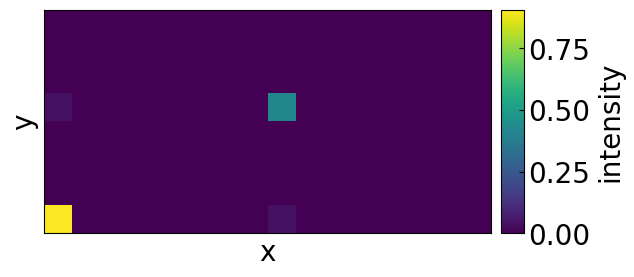

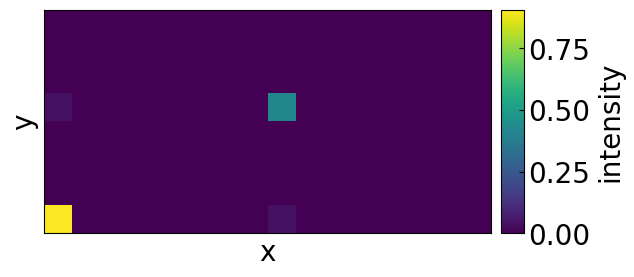

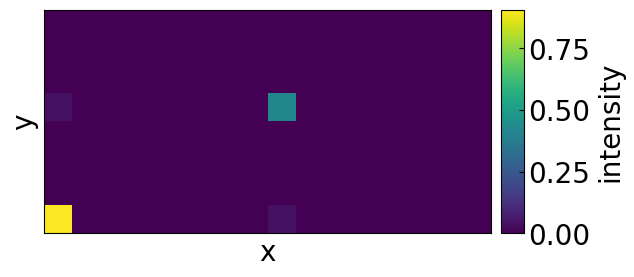

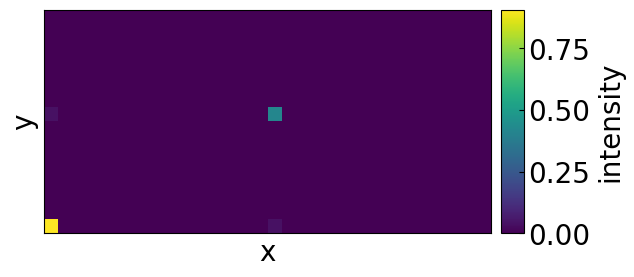

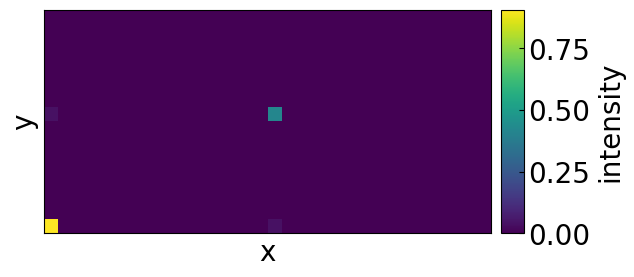

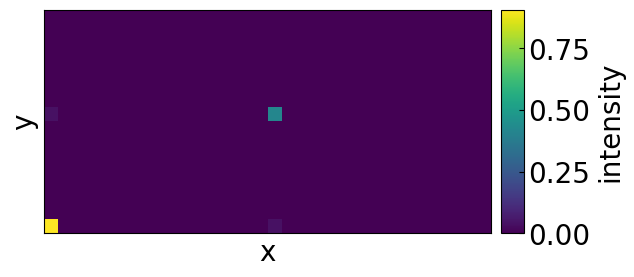

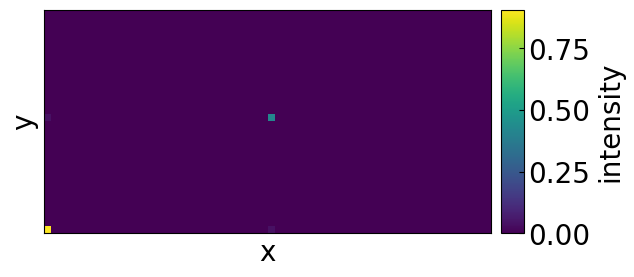

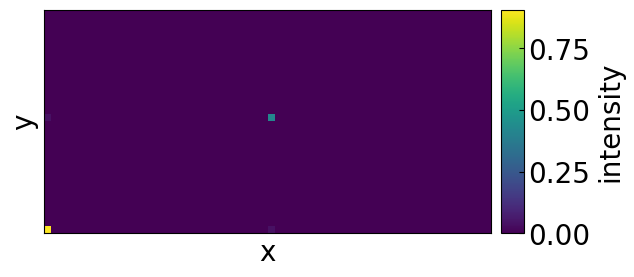

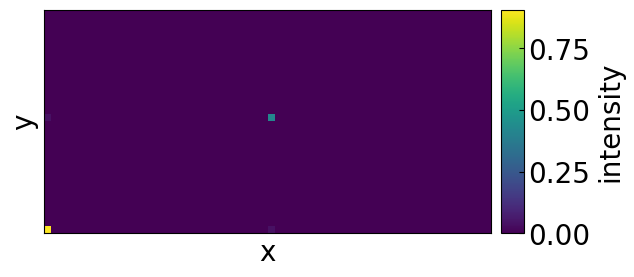

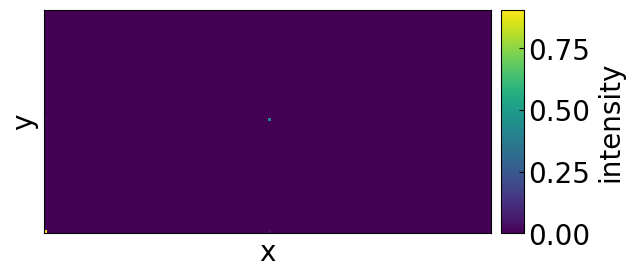

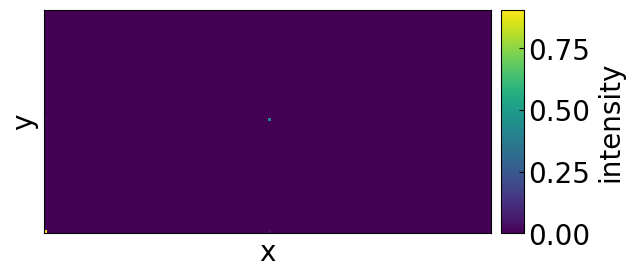

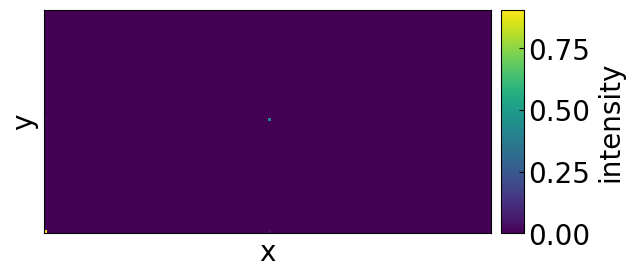

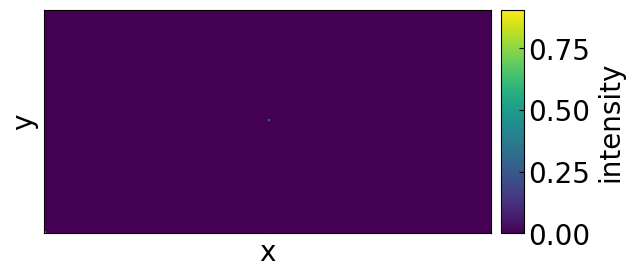

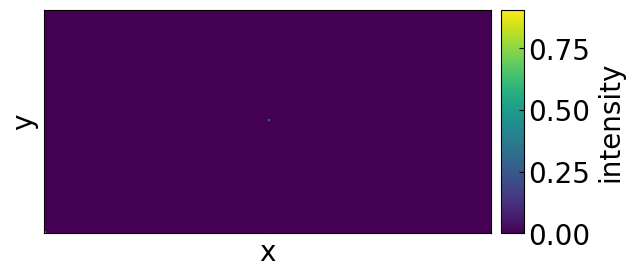

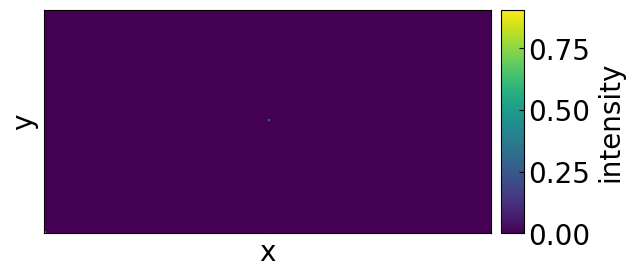

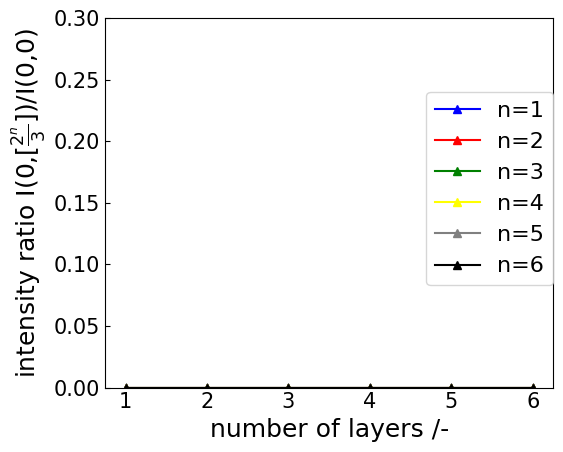

In [26]:
#Figure 4 E
"""
input_pattern
CeO2_100["A"]+CeO2_100["B"]+(CeO2_100["D"]+CeO2_100["C"]+CeO2_100["D"]+CeO2_100["B"])*n+(CeO2_100["D"]+CeO2_100["C"])*{0 or 1}+CeO2_100["A"]
vacant O layer + upper Ce layer + (O layer + downer Ce layer)*n + (O layer + upper Ce layer)*{0 or 1} + vacant O layer (1 layer of CeO2(100))
"""
for num_layer in range(1,7):
    output = []
    output_name = f"output{num_layer}"
    for bit_number in range (1,7):
        del FT
        FT = FTManager()
        pp                       = Preprocessing(scattering_factor_O)
        order_100_Oterminal      = {"preprocessings":["tile"],\
                                    "tile_number"    : [2**(bit_number+1),2**(bit_number)],\
                                    "d"             : d_CeO2_100,\
                                    "DW"            : DW_CeO2}
        XFT_input_100_Oterminal  = pp.preprocessing_parser(CeO2_100["A"], order_100_Oterminal)
        pp.clear(scattering_factor_Ce)
        order_100_Ceupper        = {"preprocessings":["tile"],\
                                    "tile_number"    : [2**(bit_number+1),2**(bit_number)],\
                                    "d"             : d_CeO2_100,\
                                    "DW"            : DW_CeO2}
        XFT_input_100_Ceupper    = pp.preprocessing_parser(CeO2_100["B"], order_100_Ceupper)
        pp.clear(scattering_factor_Ce)
        order_100_Cedowner       = {"preprocessings":["tile"],\
                                    "tile_number"    : [2**(bit_number+1),2**(bit_number)],\
                                    "d"             : d_CeO2_100,\
                                    "DW"            : DW_CeO2}
        XFT_input_100_Cedowner   = pp.preprocessing_parser(CeO2_100["C"], order_100_Cedowner)
        pp.clear(scattering_factor_O)
        order_100_O              = {"preprocessings":["tile"],\
                                    "tile_number"    : [2**(bit_number+1),2**(bit_number)],\
                                    "d"             : d_CeO2_100,\
                                    "DW"            : DW_CeO2}
        XFT_input_100_O          = pp.preprocessing_parser(CeO2_100["D"], order_100_O) 
        XFT_input                = pp.normalize(XFT_input_100_Oterminal + XFT_input_100_Ceupper + (XFT_input_100_O + XFT_input_100_Ceupper + XFT_input_100_O + XFT_input_100_Cedowner)*((num_layer-1)//2) + (XFT_input_100_O + XFT_input_100_Cedowner)*((num_layer-1)%2) + XFT_input_100_Oterminal)
        DFT,FFT,QFT              = FT([XFT_input,XFT_input,XFT_input])
        output.append(((QFT[2**(bit_number),0]/QFT[0,0])-(DFT[2**(bit_number),0]/DFT[0,0])))#/(DFT[2**(bit_number),2**(bit_number-1)]/DFT[0,0]))
    exec(f"{output_name} = output")
x =  np.array(range(1, 7,1))
y_1 = np.abs(output1)
y_2 = np.abs(output2)
y_3 = np.abs(output3)
y_4 = np.abs(output4)
y_5 = np.abs(output5)
y_6 = np.abs(output6)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['figure.subplot.left'] = 0.20
plt.plot(x, y_1, marker="^",c= 'blue')
plt.plot(x, y_2, marker="^",c= 'red')
plt.plot(x, y_3, marker="^",c= 'green')
plt.plot(x, y_4, marker="^",c= 'yellow')
plt.plot(x, y_5, marker="^",c= 'gray')
plt.plot(x, y_6, marker="^",c= 'black')
plt.xlabel("number of layers /-",fontsize = 18)
plt.ylabel(r"intensity ratio I(0,[$\frac{2^n}{3}$])/I(0,0)", fontsize=18)
plt.legend([ "n=1","n=2","n=3","n=4","n=5","n=6","n=7"],bbox_to_anchor=(1.0, 0.8),loc='upper right',borderaxespad=0,fontsize = 16)
plt.xticks(np.arange(1, 7, 1))
plt.ylim(0.0, 0.3)
plt.tick_params(labelsize=15)
plt.savefig(fname = "Fig4E.svg",transparent = True)
plt.show()

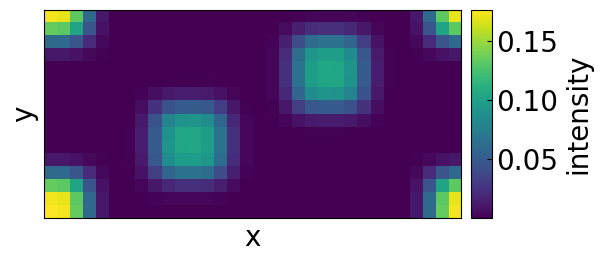

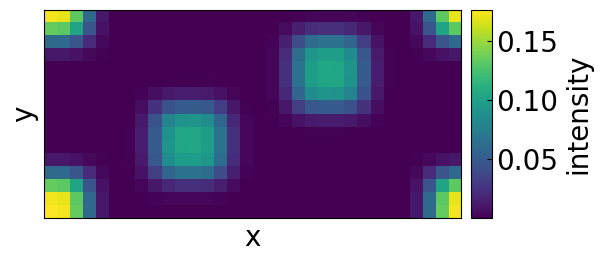

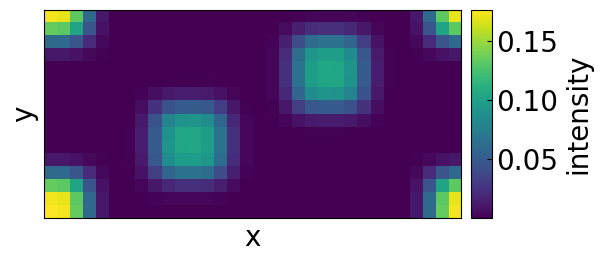

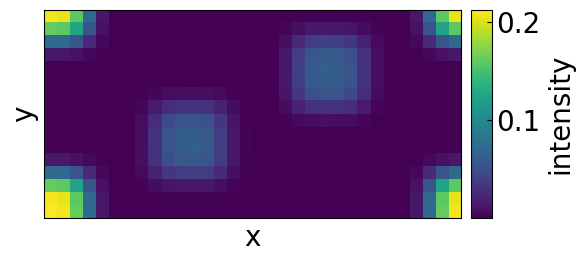

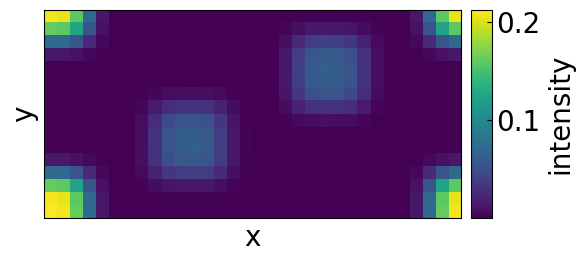

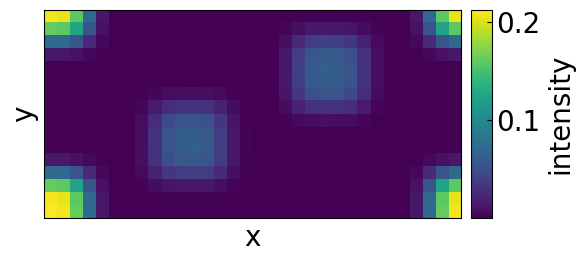

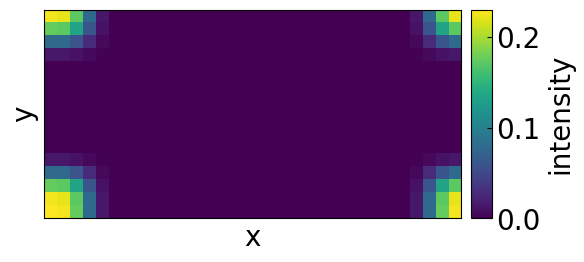

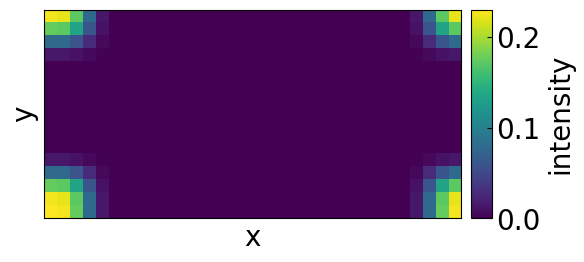

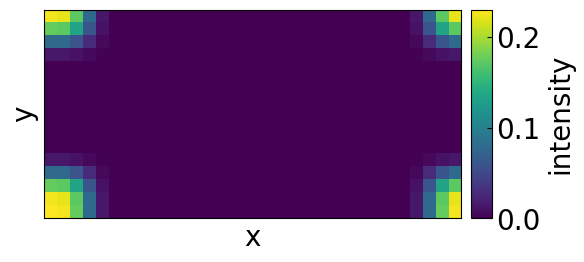

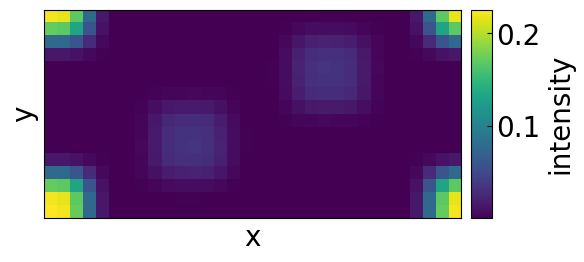

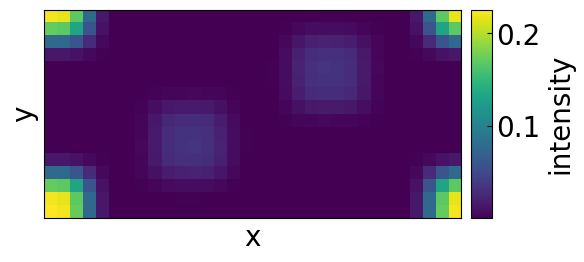

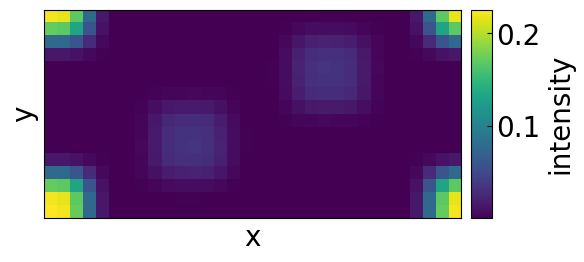

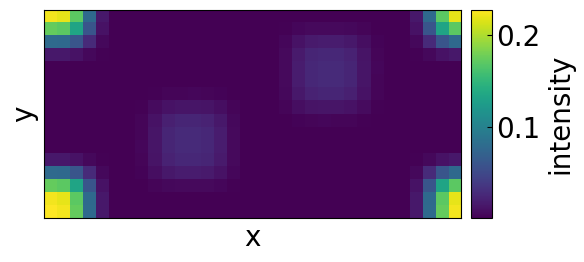

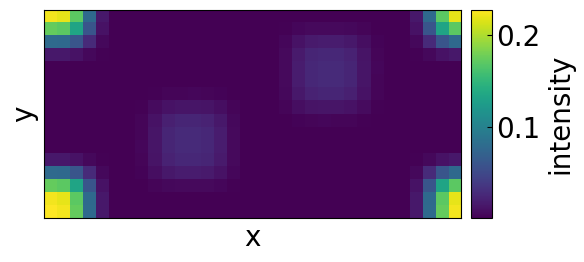

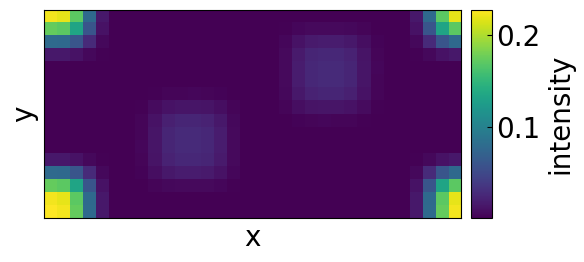

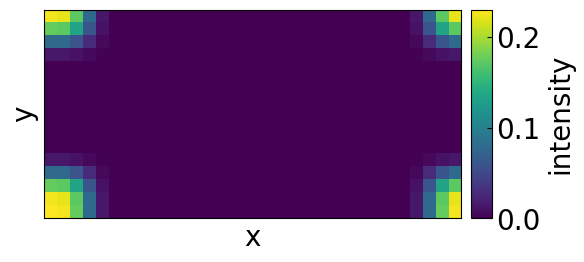

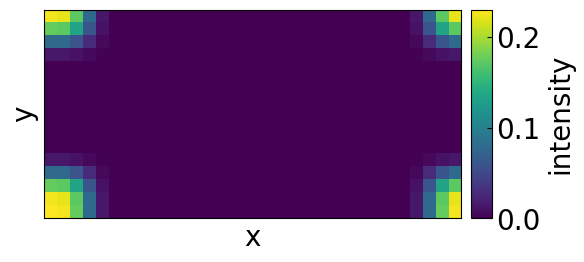

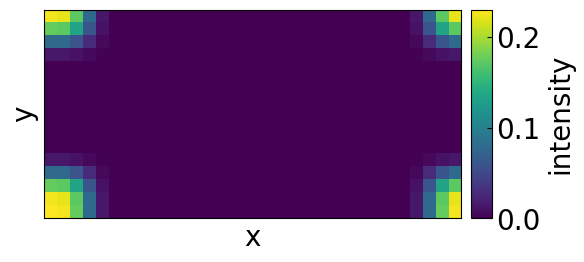

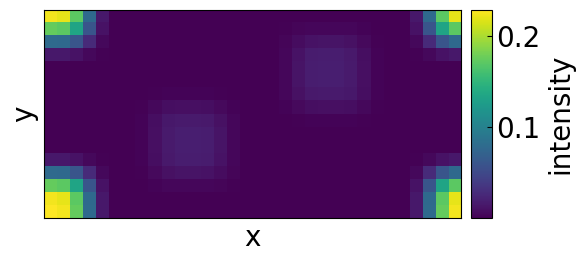

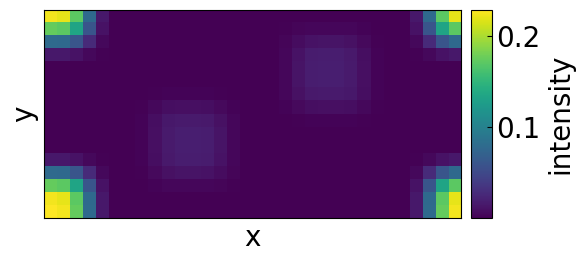

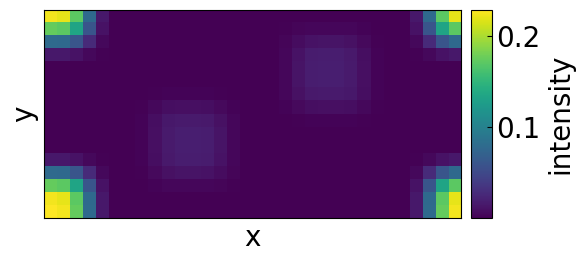

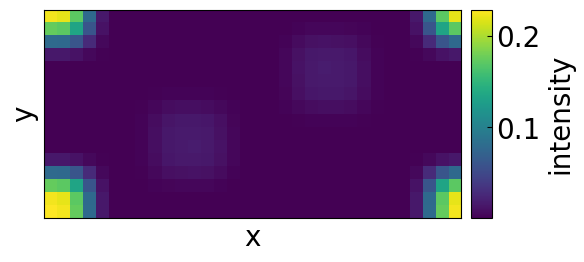

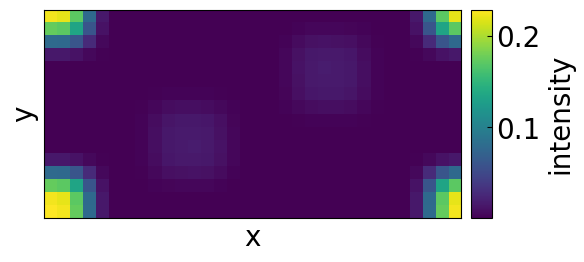

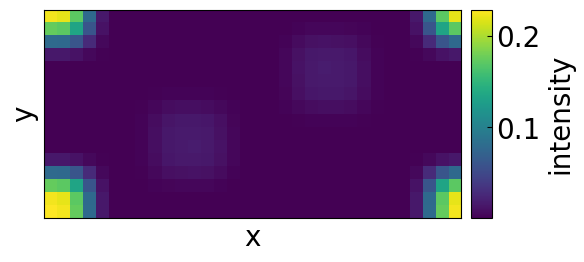

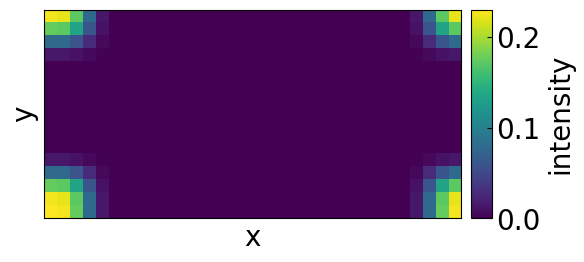

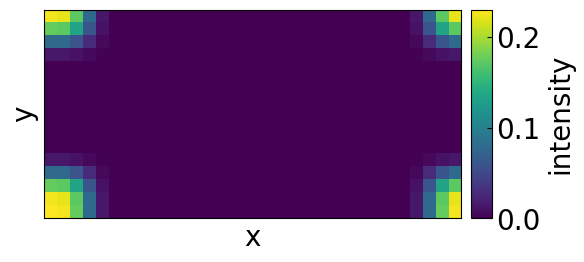

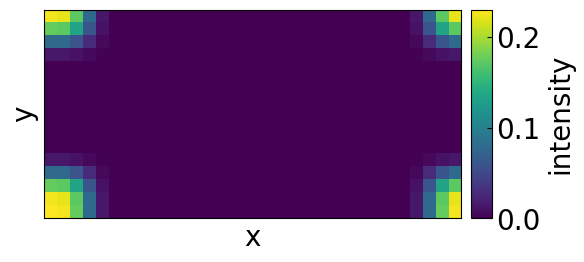

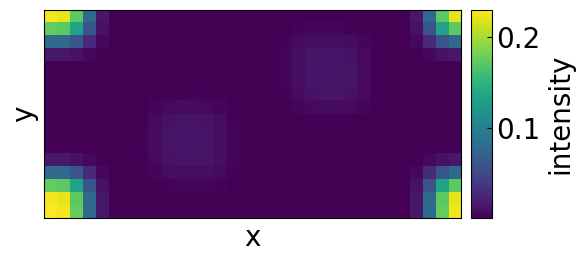

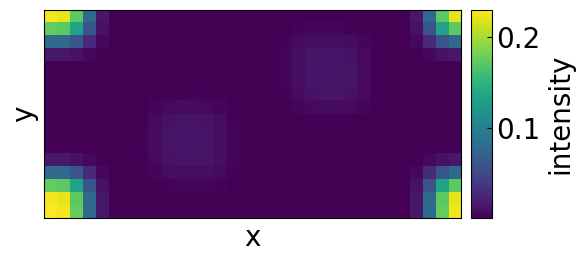

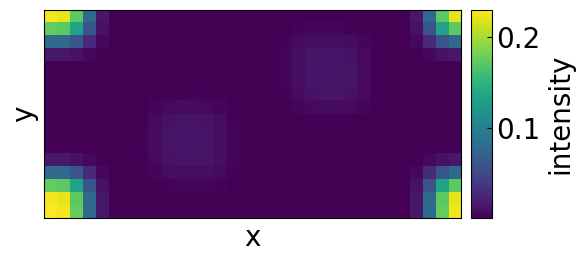

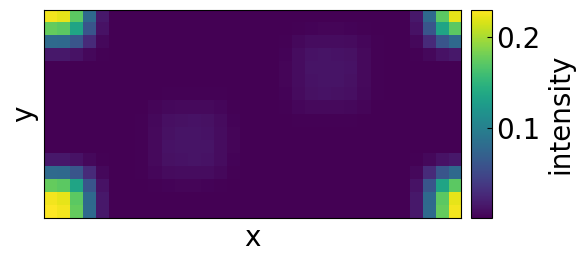

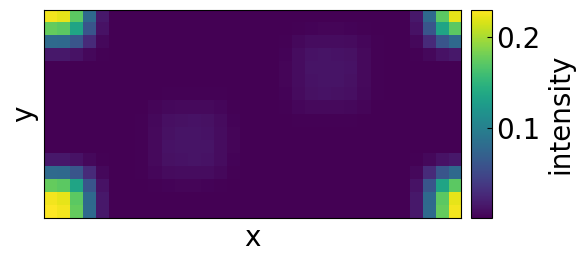

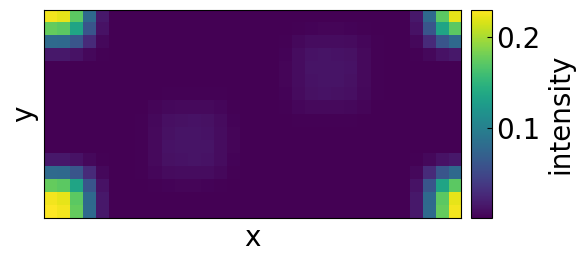

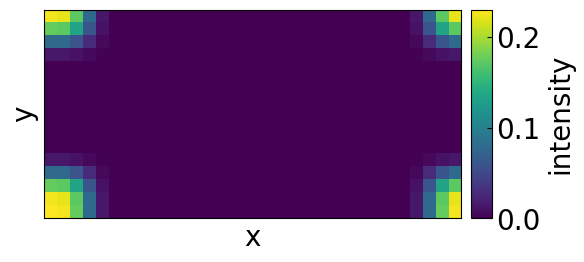

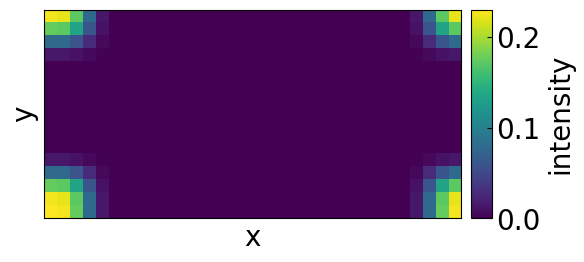

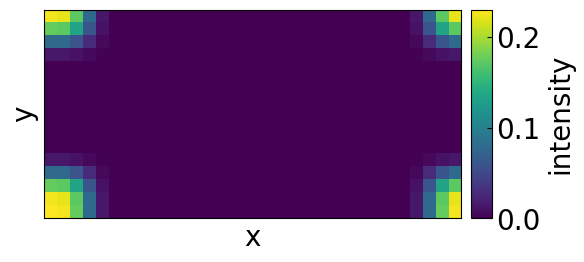

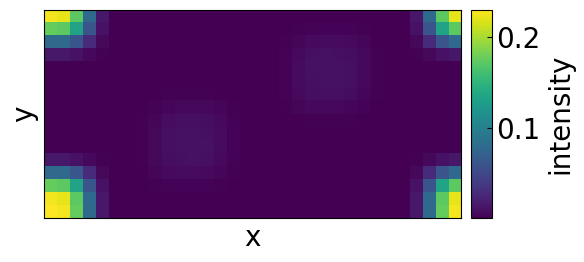

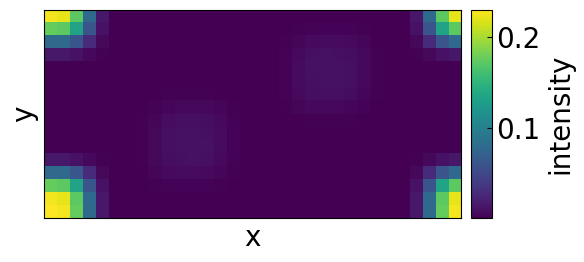

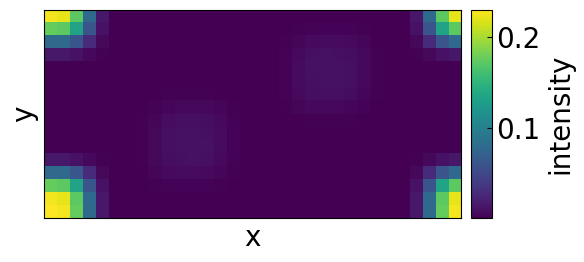

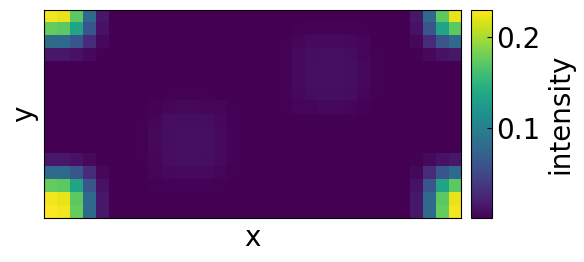

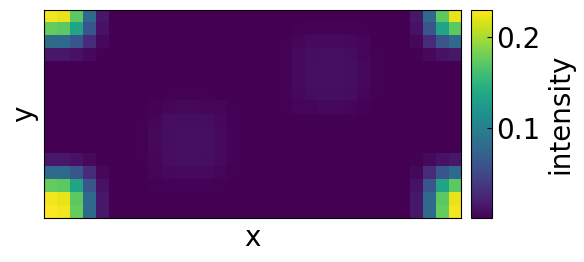

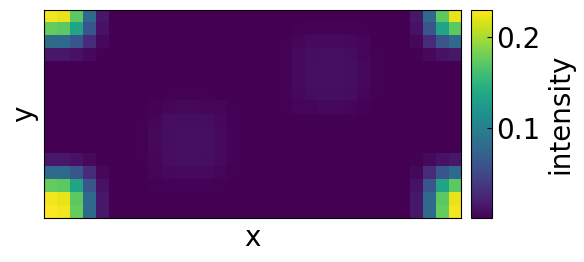

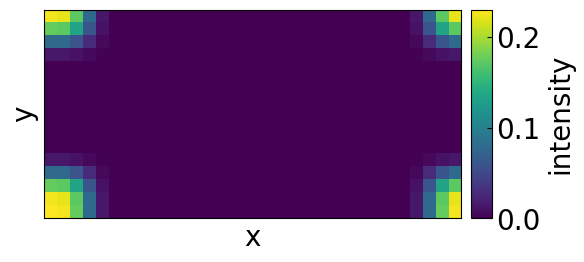

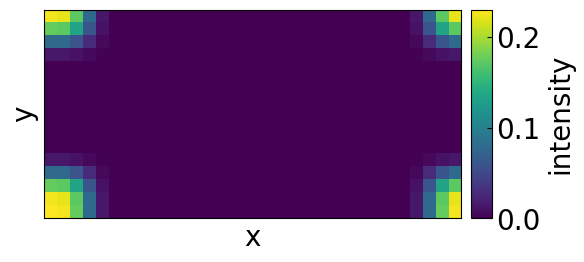

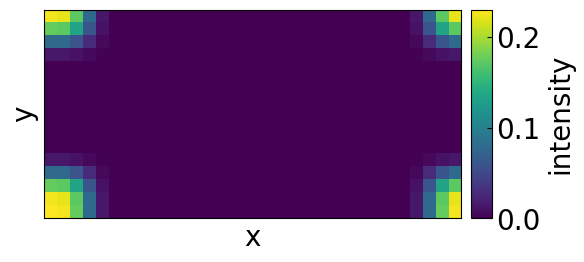

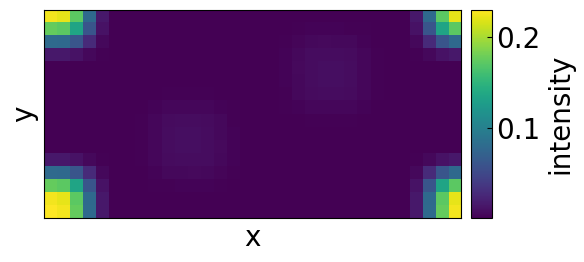

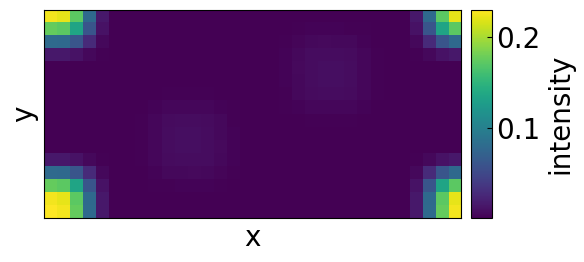

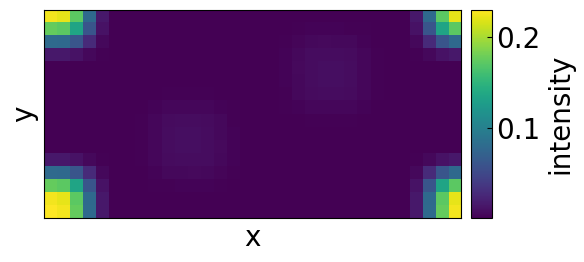

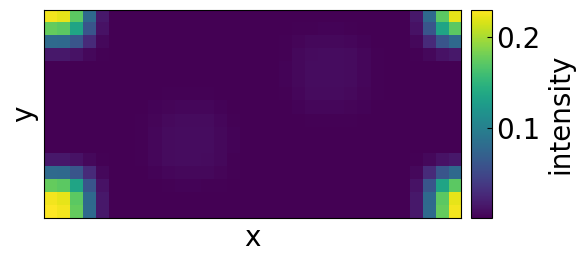

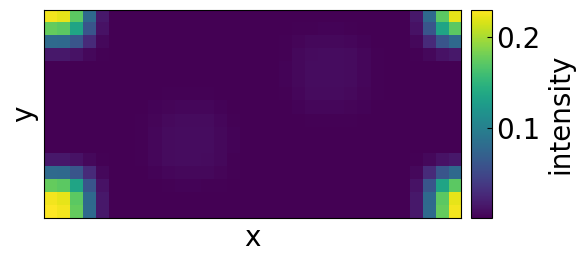

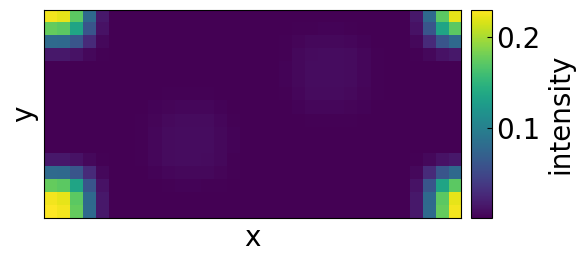

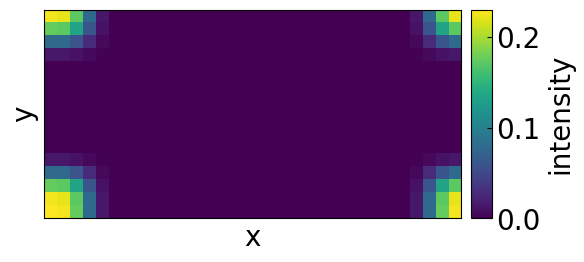

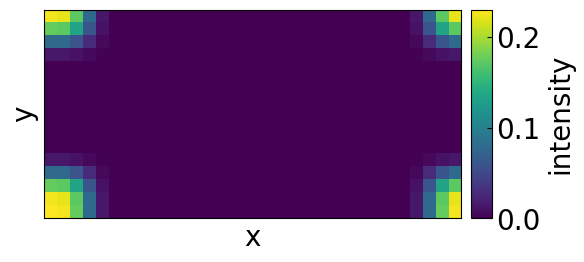

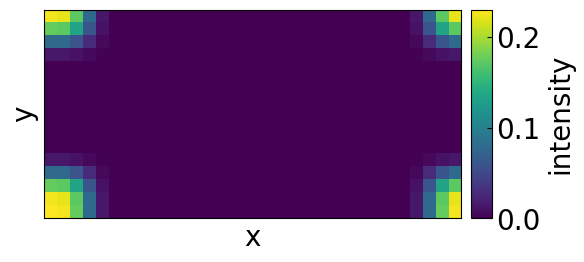

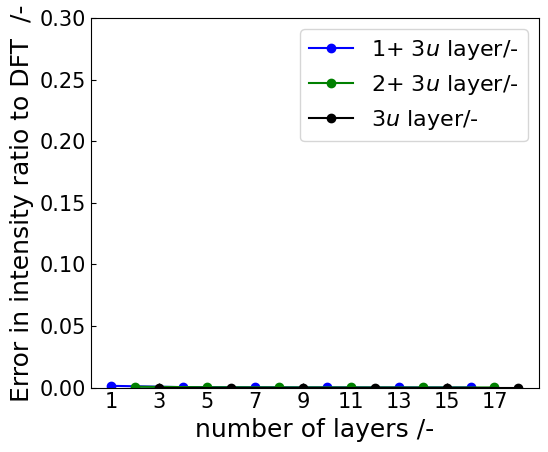

In [27]:
#Figure 4 F
#layer change in CeO2(111) 
"""
input_pattern
first_layer (CeO2_111["A"]+CeO2_111["B"]+CeO2_111["C"]) +second layer (CeO2_111["D"]+CeO2_111["E"]+CeO2_111["A"])
+third layer (CeO2_111["B"]+CeO2_111["F"]+CeO2_111["C"])
first O layer + second layer + third layer (changing layer of CeO2(111))
"""
del FT
FT = FTManager()
pp               = Preprocessing(scattering_factor_O)
order_111_Ofirst      = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [11,6],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[32,16],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Ofirst  = pp.preprocessing_parser(CeO2_111["A"], order_111_Ofirst)
pp.clear(scattering_factor_Ce)
order_111_Cefirst      = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [11,6],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[32,16],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Cefirst  = pp.preprocessing_parser(CeO2_111["B"], order_111_Cefirst)
pp.clear(scattering_factor_Ce)
order_111_Osecond     = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [11,6],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[32,16],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Osecond = pp.preprocessing_parser(CeO2_111["C"], order_111_Osecond)
pp.clear(scattering_factor_O)
order_111_Othird     = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [11,6],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[32,16],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Othird = pp.preprocessing_parser(CeO2_111["D"], order_111_Othird)
pp.clear(scattering_factor_O)
order_111_Cesecond     = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [11,6],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[32,16],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Cesecond = pp.preprocessing_parser(CeO2_111["E"], order_111_Cesecond)
pp.clear(scattering_factor_O)
order_111_Cethird     = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [11,6],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[32,16],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Cethird = pp.preprocessing_parser(CeO2_111["F"], order_111_Cethird)
relative_intensity_115       = []
relative_intensity_115_0     = []
relative_intensity_115_1     = []
relative_intensity_115_2     = []
for num_layer in range(1,19):
    if num_layer%3 ==0:
        XFT_input        = pp.normalize(((XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)+(XFT_input_111_Othird + XFT_input_111_Cesecond+ XFT_input_111_Ofirst)+(XFT_input_111_Osecond + XFT_input_111_Cethird+ XFT_input_111_Othird))*(num_layer//3))
    elif num_layer%3 ==1:
        XFT_input        = pp.normalize(((XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)+(XFT_input_111_Othird + XFT_input_111_Cesecond+ XFT_input_111_Ofirst)+(XFT_input_111_Osecond + XFT_input_111_Cethird+ XFT_input_111_Othird))*(num_layer//3)+(XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond))
    else:
        XFT_input        = pp.normalize(((XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)+(XFT_input_111_Othird + XFT_input_111_Cesecond+ XFT_input_111_Ofirst)+(XFT_input_111_Osecond + XFT_input_111_Cethird+ XFT_input_111_Othird))*(num_layer//3)+(XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)+(XFT_input_111_Othird + XFT_input_111_Cesecond+ XFT_input_111_Ofirst))
    DFT,FFT,QFT      = FT([XFT_input,XFT_input,XFT_input])
    relative_intensity_115.append([QFT[11,5]/QFT[0,0]])
    if num_layer%3 == 0:
        relative_intensity_115_0.append([QFT[10,5]/QFT[0,0]])
    elif num_layer%3 ==1:
        relative_intensity_115_1.append([QFT[10,5]/QFT[0,0]])
    else :
        relative_intensity_115_2.append([QFT[10,5]/QFT[0,0]])

del FT
FT = FTManager()
pp               = Preprocessing(scattering_factor_O)
order_111_Ofirst      = {"preprocessings":["tile","cutoff"],\
                    "tile_number"    : [10,5],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[30,15],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Ofirst  = pp.preprocessing_parser(CeO2_111["A"], order_111_Ofirst)
pp.clear(scattering_factor_Ce)
order_111_Cefirst      = {"preprocessings":["tile","cutoff"],\
                    "tile_number"    : [10,5],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[30,15],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Cefirst  = pp.preprocessing_parser(CeO2_111["B"], order_111_Cefirst)
pp.clear(scattering_factor_Ce)
order_111_Osecond     = {"preprocessings":["tile","cutoff"],\
                    "tile_number"    : [10,5],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[30,15],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Osecond = pp.preprocessing_parser(CeO2_111["C"], order_111_Osecond)
pp.clear(scattering_factor_O)
order_111_Othird     = {"preprocessings":["tile","cutoff"],\
                    "tile_number"    : [10,5],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[30,15],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Othird = pp.preprocessing_parser(CeO2_111["D"], order_111_Othird)
pp.clear(scattering_factor_O)
order_111_Cesecond     = {"preprocessings":["tile","cutoff"],\
                    "tile_number"    : [10,5],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[30,15],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Cesecond = pp.preprocessing_parser(CeO2_111["E"], order_111_Cesecond)
pp.clear(scattering_factor_O)
order_111_Cethird     = {"preprocessings":["tile","cutoff"],\
                    "tile_number"    : [10,5],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[30,15],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Cethird = pp.preprocessing_parser(CeO2_111["F"], order_111_Cethird)

relative_intensity_115_0_0     = []
relative_intensity_115_1_0     = []
relative_intensity_115_2_0     = []
for num_layer in range(1,19):
    if num_layer%3 ==0:
        XFT_input        = pp.normalize(((XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)+(XFT_input_111_Othird + XFT_input_111_Cesecond+ XFT_input_111_Ofirst)+(XFT_input_111_Osecond + XFT_input_111_Cethird+ XFT_input_111_Othird))*(num_layer//3))
    elif num_layer%3 ==1:
        XFT_input        = pp.normalize(((XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)+(XFT_input_111_Othird + XFT_input_111_Cesecond+ XFT_input_111_Ofirst)+(XFT_input_111_Osecond + XFT_input_111_Cethird+ XFT_input_111_Othird))*(num_layer//3)+(XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond))
    else:
        XFT_input        = pp.normalize(((XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)+(XFT_input_111_Othird + XFT_input_111_Cesecond+ XFT_input_111_Ofirst)+(XFT_input_111_Osecond + XFT_input_111_Cethird+ XFT_input_111_Othird))*(num_layer//3)+(XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)+(XFT_input_111_Othird + XFT_input_111_Cesecond+ XFT_input_111_Ofirst))
    if num_layer%3 == 0:
        relative_intensity_115_0_0.append(([(np.fft.fft2(XFT_input)[10,5])/np.fft.fft2(XFT_input)[0,0]]))
    elif num_layer%3 ==1:
        relative_intensity_115_1_0.append(([(np.fft.fft2(XFT_input)[10,5])/np.fft.fft2(XFT_input)[0,0]]))
    else :
        relative_intensity_115_2_0.append(([(np.fft.fft2(XFT_input)[10,5])/np.fft.fft2(XFT_input)[0,0]]))

x_1 =  np.array(range(1, 19,3))
x_2 = np.array(range(2, 20,3))
x_3 = np.array(range(3, 21,3))

y_2 = np.abs(np.abs(relative_intensity_115_1)-np.abs(relative_intensity_115_1_0))
y_3 = np.abs(np.abs(relative_intensity_115_2)-np.abs(relative_intensity_115_2_0))
y_4 = np.abs(np.abs(relative_intensity_115_0)-np.abs(relative_intensity_115_0_0))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(x_1, y_2,marker="o", c= 'blue')
plt.plot(x_2, y_3,marker="o", c= 'green')
plt.plot(x_3, y_4,marker="o", c= 'black')

plt.xlabel("number of layers /-",fontsize = 18)
plt.ylabel("Error in intensity ratio to DFT  /-",fontsize = 18)
plt.legend(["1+ 3$\it{ u }$ layer/-","2+ 3$\it{ u }$ layer/-","3$\it{ u }$ layer/-"],fontsize = 16)
plt.xticks(np.arange(1, 19, 2))
plt.ylim(0.0, 0.3)
plt.tick_params(labelsize=15)
plt.savefig(fname = "Fig4F.svg",transparent = True,bbox_inches='tight')
plt.show()

## SI Figures ##

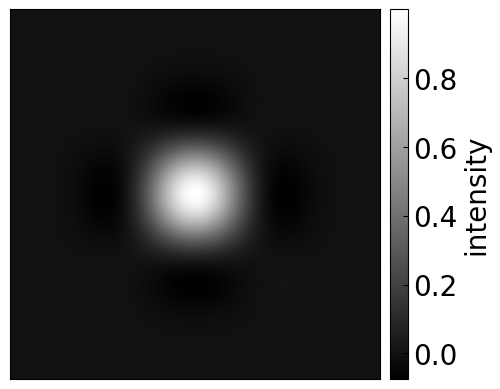

In [28]:
#Figure SI 2 A
XFTinput = np.array([[0,0],[0,0]])
tile_number=[512,512]
XFTinput =np.tile(XFTinput, tuple(tile_number))
coefficients_window            = np.array([0.1881,0.36923,0.28702,0.13077,0.02488])
x_grid,y_grid = np.meshgrid(np.arange(XFTinput.shape[1]),np.arange(XFTinput.shape[0]))
x_window      = np.sum(((-1)**np.arange(5)*coefficients_window)[np.newaxis,np.newaxis,:]*np.cos(2*np.pi/(XFTinput.shape[1]-1)*np.arange(5)*np.repeat(x_grid[:,:,np.newaxis],5,axis=2)),axis=2)
y_window      = np.sum(((-1)**np.arange(5)*coefficients_window)[np.newaxis,np.newaxis,:]*np.cos(2*np.pi/(XFTinput.shape[0]-1)*np.arange(5)*np.repeat(y_grid[:,:,np.newaxis],5,axis=2)),axis=2)
window   = y_window * x_window
fontsize =20
fig, ax = plt.subplots()
ax.tick_params(labelbottom=False, labelleft=False, labelright=False, labeltop=False)
ax.tick_params(bottom=False, left=False, right=False, top=False)
image   = ax.imshow(window, origin='lower', cmap="gray")
xs, ys  = np.meshgrid((window.real.shape[0]),range(window.real.shape[1]),indexing='ij')
divider = make_axes_locatable(ax)
cax     = divider.append_axes("right",size="5%",pad=0.1)
cbar    = plt.colorbar(image, cax=cax)
cbar.set_label('intensity', size=fontsize)
cbar.ax.tick_params(labelsize=fontsize)
ax.tick_params(labelsize=fontsize)
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig(fname = "FigS2_1.svg",transparent = True)
plt.show()
plt.clf()
plt.close()

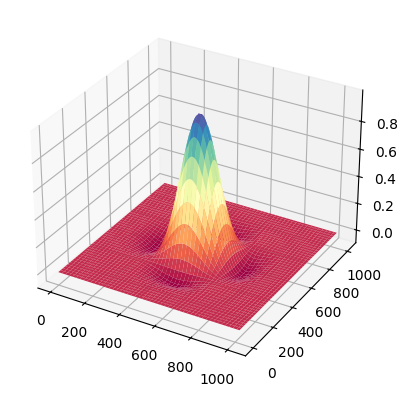

In [29]:
#Figure SI 2 B
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x = y = np.arange(0, 1024, 1)
X, Y = np.meshgrid(x, y)
z = window 
ax.plot_surface(X,Y,z, cmap='Spectral')
plt.savefig(fname = "FigS2_2.svg",transparent = True)
plt.show()

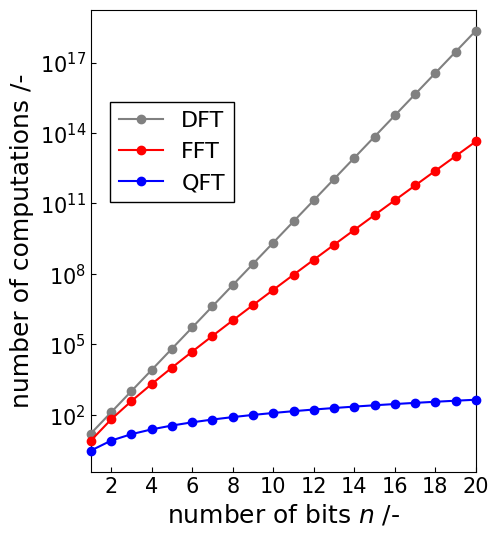

In [30]:
#Figure SI 5
x =  np.array(range(1, 21,1))
y_1 = []
y_2 = []
y_3 = []
for n in range(1,21):
    y_1.append(2**(n*3+1))
    y_2.append(2**(2*n+1)*(n))
    y_3.append(n**2+2*n)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.figure(figsize=(5.5,6))
plt.plot(x, y_1,marker="o",clip_on=False,zorder = 3, c= 'gray')
plt.plot(x, y_2, marker="o",clip_on=False,zorder = 3,c= 'red')
plt.plot(x, y_3, marker="o",clip_on=False,zorder = 3,c= 'blue')
ax = plt.gca()
ax.set_yscale('log')
plt.xlim(1, 20)
plt.xticks(np.arange(2, 21, 2))
plt.xlabel("number of bits $\it{ n }$ /-",fontsize = 18)
plt.ylabel("number of computations /-",fontsize = 18)
plt.legend(["DFT", "FFT", "QFT"],bbox_to_anchor=(0.05, 0.8),loc='upper left',borderaxespad=0,fontsize = 16,edgecolor="black",framealpha = 1,fancybox =False)
plt.tick_params(labelsize=15)
plt.savefig(fname = "FigS5.svg",transparent = True,bbox_inches='tight')
plt.show()

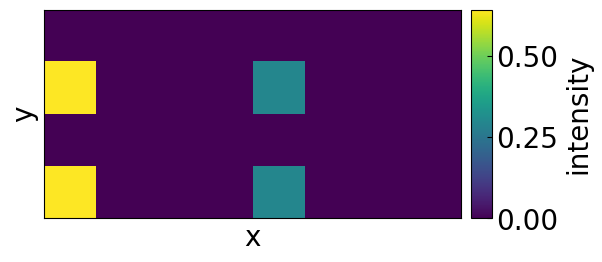

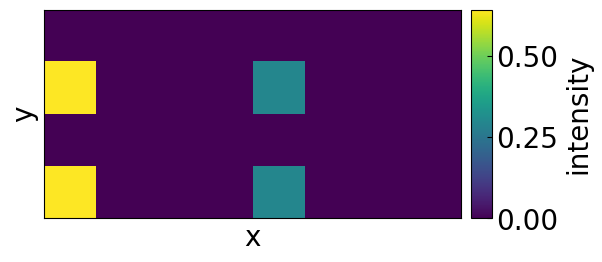

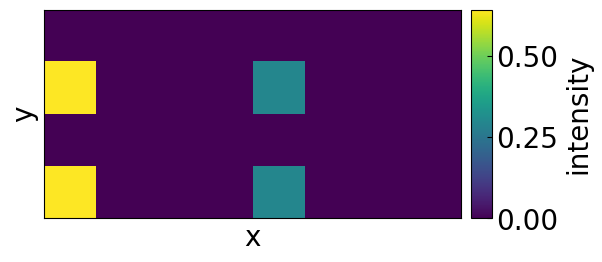

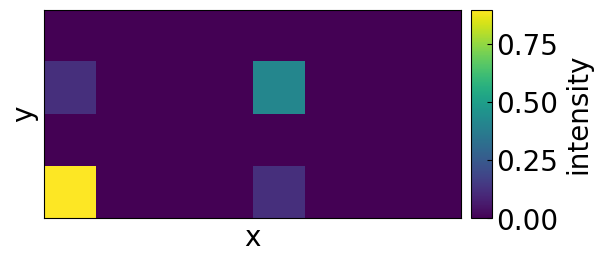

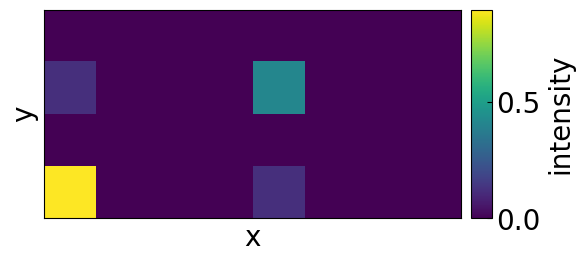

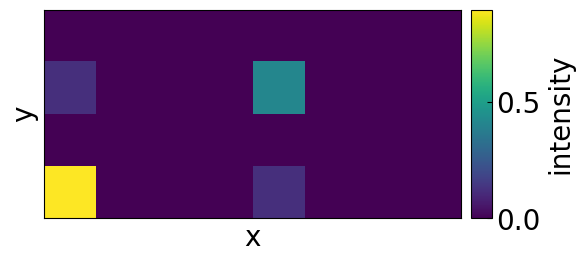

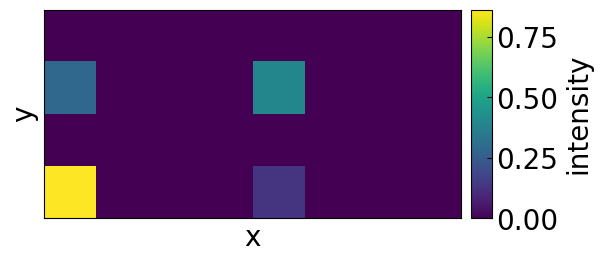

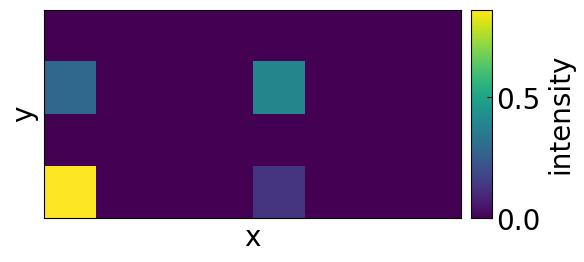

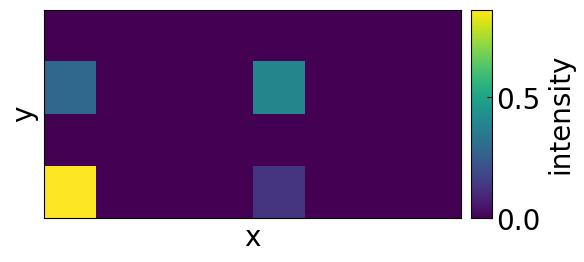

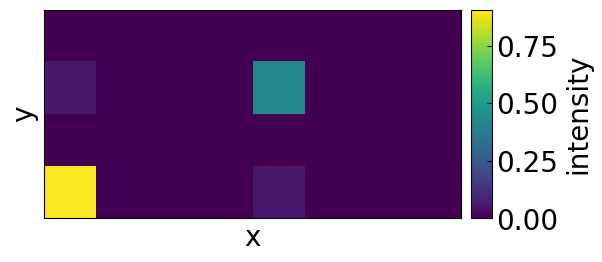

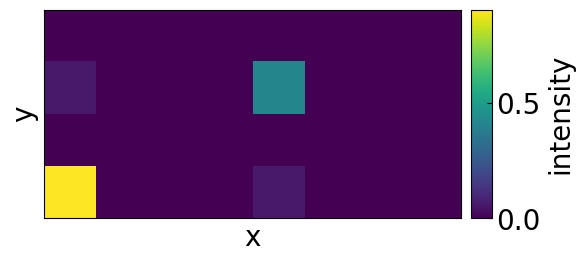

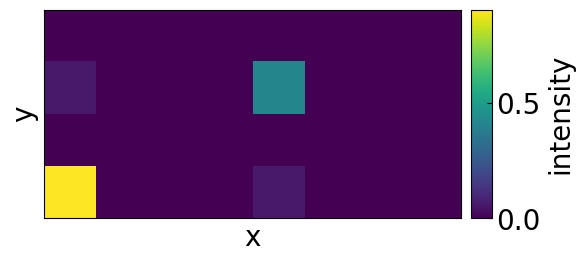

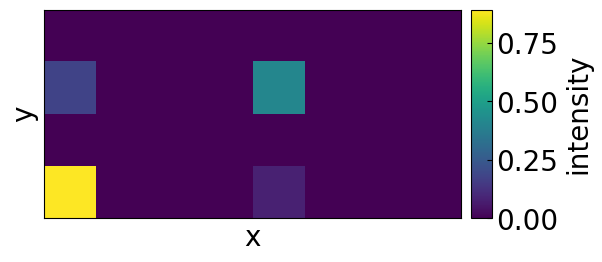

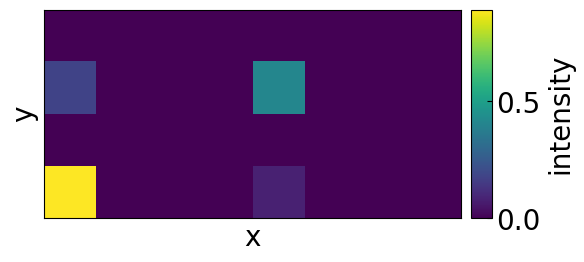

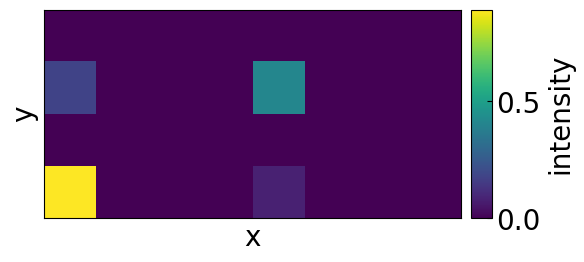

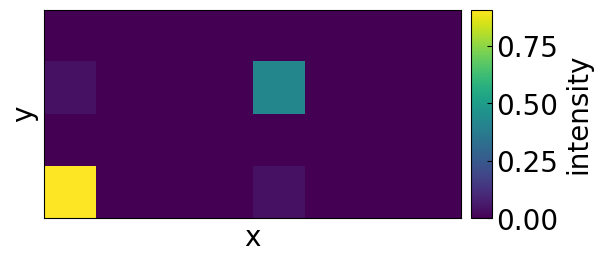

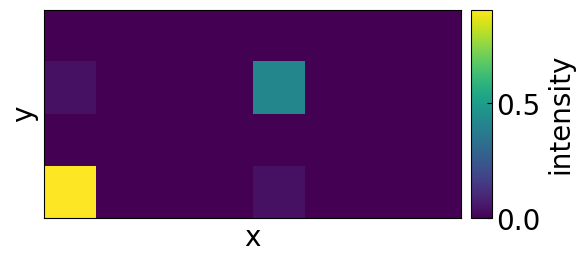

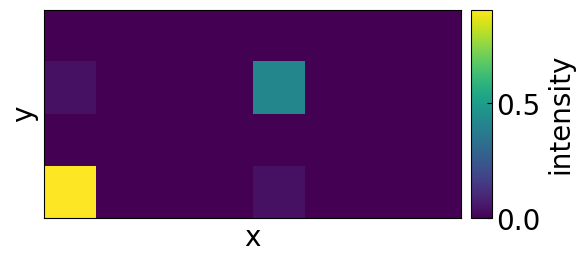

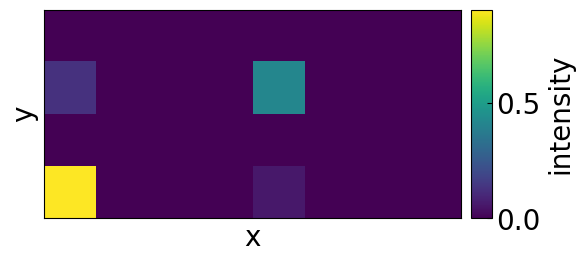

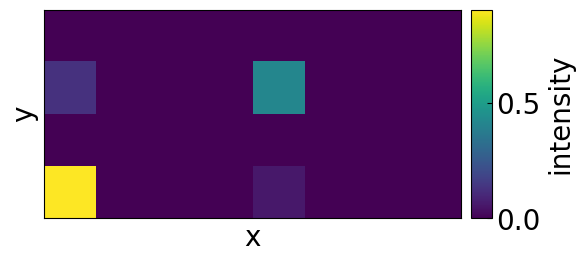

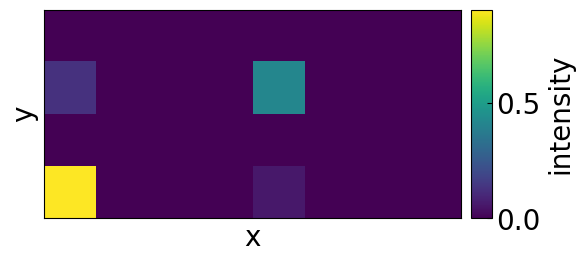

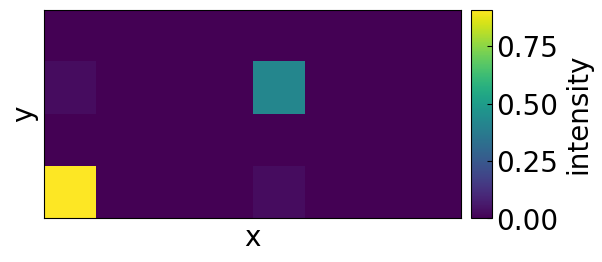

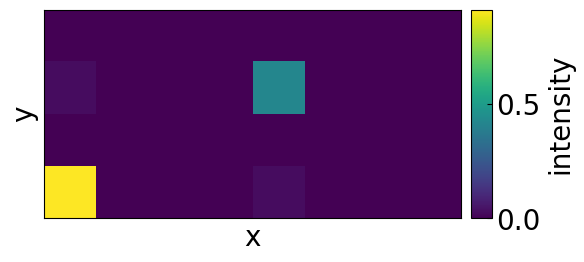

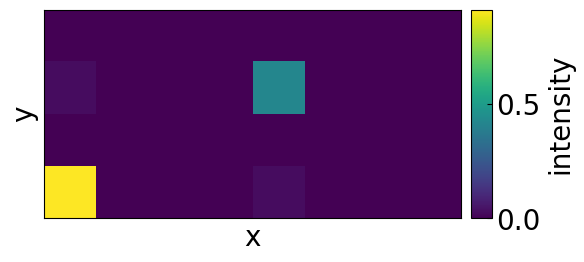

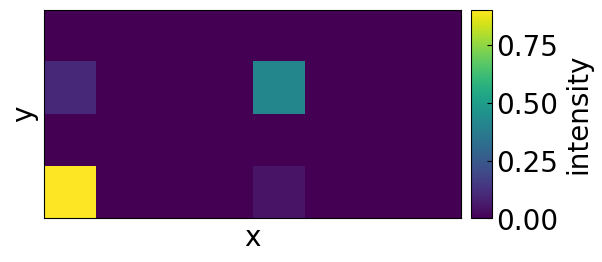

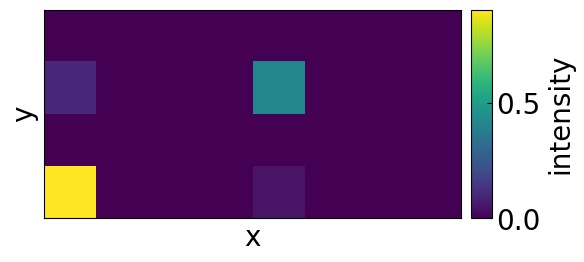

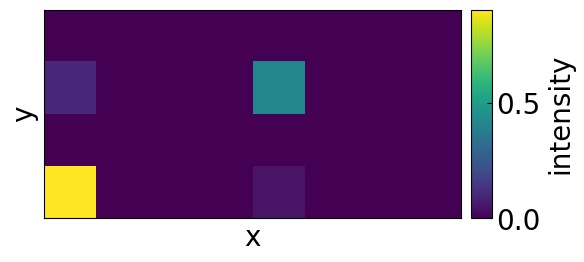

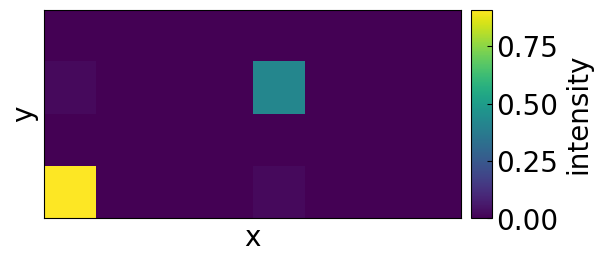

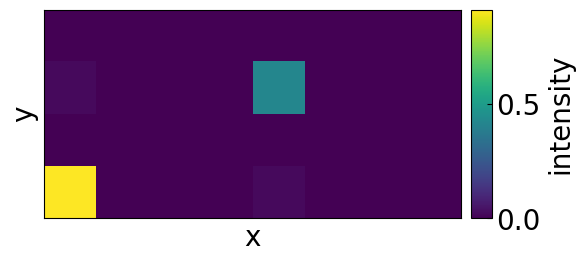

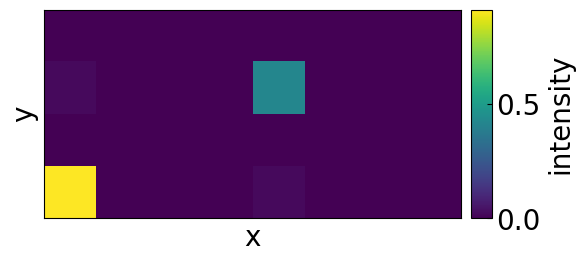

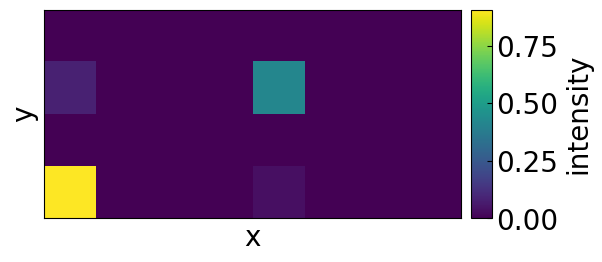

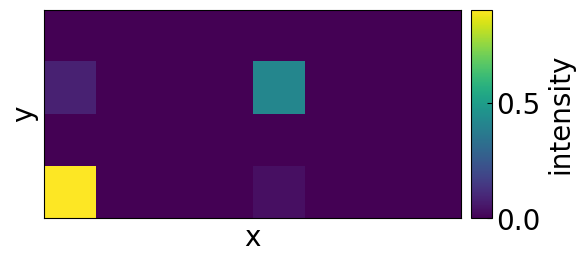

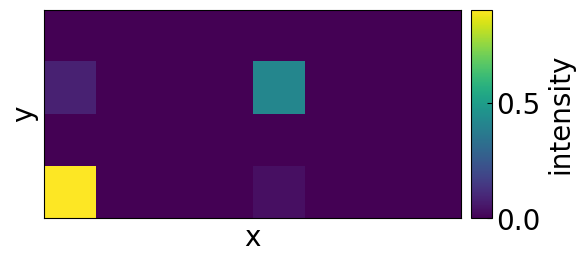

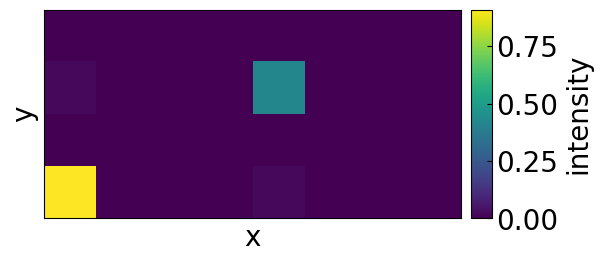

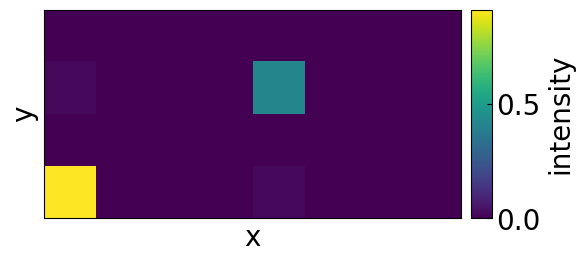

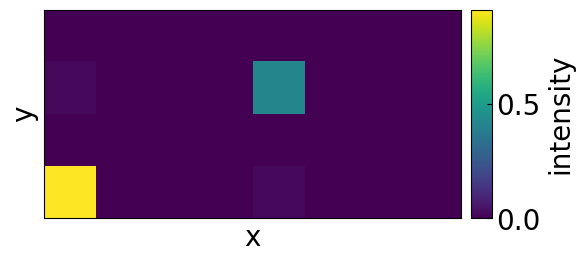

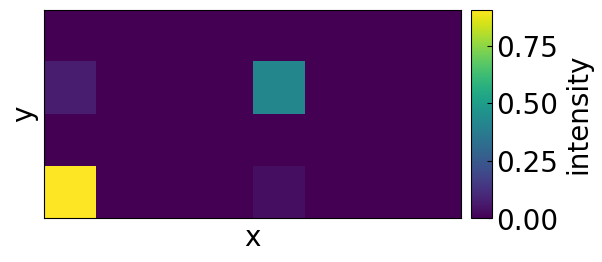

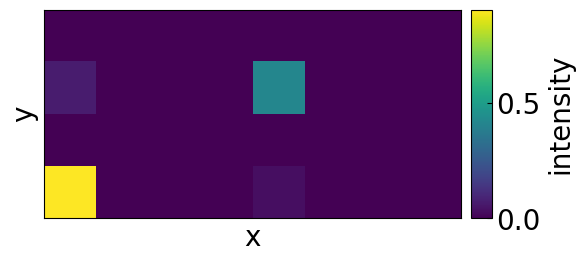

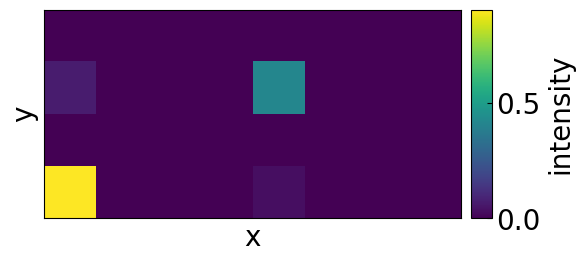

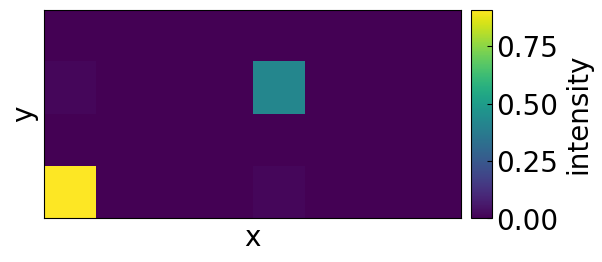

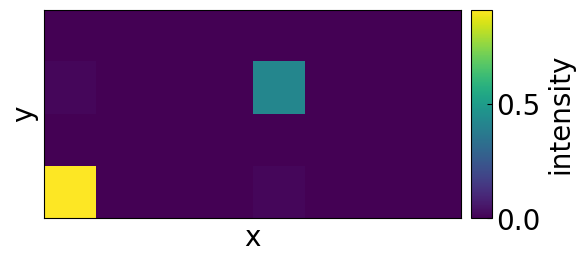

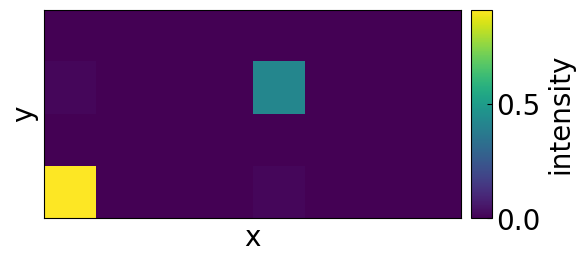

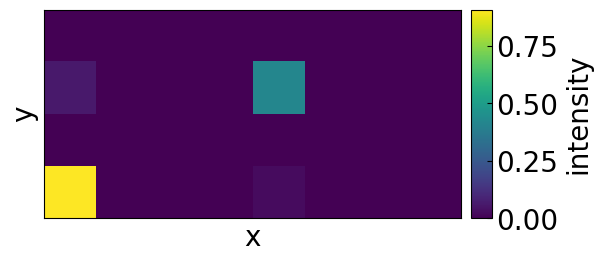

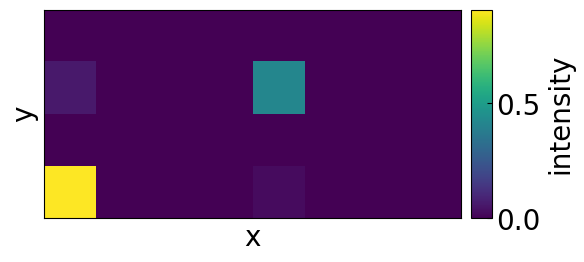

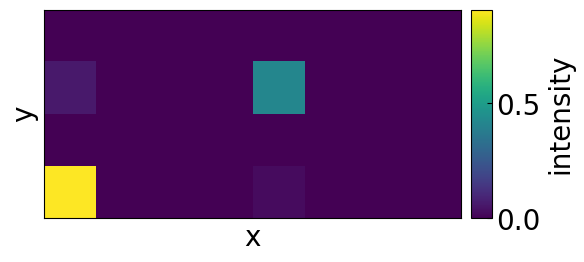

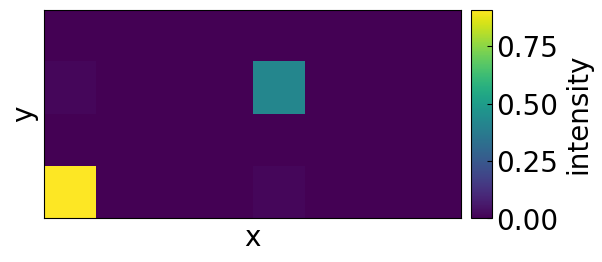

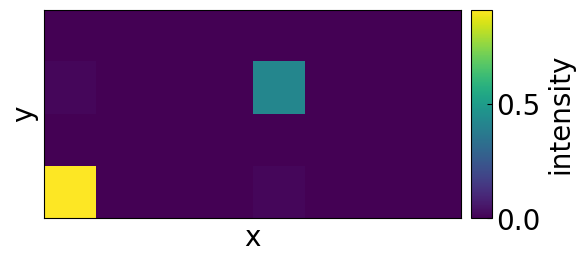

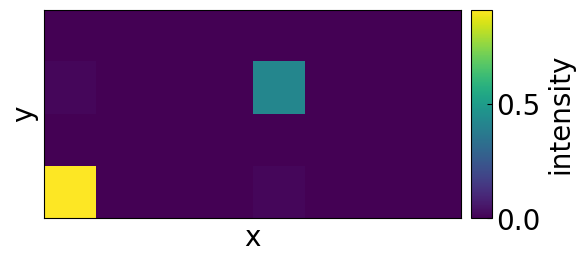

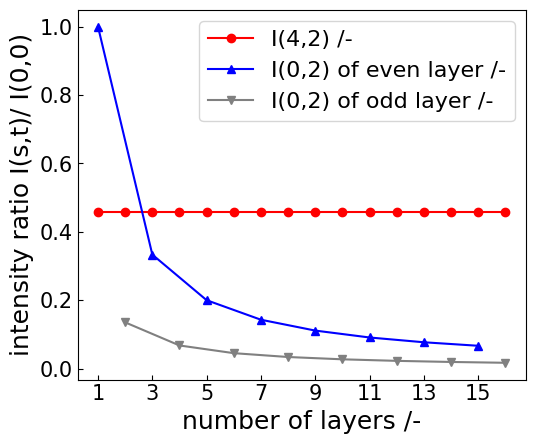

In [31]:
#Figure SI 9
"""
input_pattern
CeO2_100["A"]+CeO2_100["B"]+(CeO2_100["D"]+CeO2_100["C"]+CeO2_100["D"]+CeO2_100["B"])*n+(CeO2_100["D"]+CeO2_100["C"])*{0 or 1}+CeO2_100["A"]
vacant O layer + upper Ce layer + (O layer + downer Ce layer)*n + (O layer + upper Ce layer)*{0 or 1} + vacant O layer (1 layer of CeO2(100))
"""
del FT
FT = FTManager()
pp                       = Preprocessing(scattering_factor_O)
order_100_Oterminal      = {"preprocessings":["tile"],\
                            "tile_number"    : [4,2],\
                            "d"             : d_CeO2_100,\
                            "DW"            : DW_CeO2}
XFT_input_100_Oterminal  = pp.preprocessing_parser(CeO2_100["A"], order_100_Oterminal)
pp.clear(scattering_factor_Ce)
order_100_Ceupper        = {"preprocessings":["tile"],\
                            "tile_number"    : [4,2],\
                            "d"             : d_CeO2_100,\
                            "DW"            : DW_CeO2}
XFT_input_100_Ceupper    = pp.preprocessing_parser(CeO2_100["B"], order_100_Ceupper)
pp.clear(scattering_factor_Ce)
order_100_Cedowner       = {"preprocessings":["tile"],\
                            "tile_number"    : [4,2],\
                            "d"             : d_CeO2_100,\
                            "DW"            : DW_CeO2}
XFT_input_100_Cedowner   = pp.preprocessing_parser(CeO2_100["C"], order_100_Cedowner)
pp.clear(scattering_factor_O)
order_100_O              = {"preprocessings":["tile"],\
                            "tile_number"    : [4,2],\
                            "d"             : d_CeO2_100,\
                            "DW"            : DW_CeO2}
XFT_input_100_O          = pp.preprocessing_parser(CeO2_100["D"], order_100_O) 
relative_intensity_42       = []
relative_intensity_40_even       = []
relative_intensity_40_odd       = []
for num_layer in range(1,17):
    XFT_input                = pp.normalize(XFT_input_100_Oterminal + XFT_input_100_Ceupper + (XFT_input_100_O + XFT_input_100_Ceupper + XFT_input_100_O + XFT_input_100_Cedowner)*((num_layer-1)//2) + (XFT_input_100_O + XFT_input_100_Cedowner)*((num_layer-1)%2) + XFT_input_100_Oterminal)
    DFT,FFT,QFT              = FT([XFT_input,XFT_input,XFT_input])
    if num_layer%2 == 0:
        relative_intensity_40_odd.append([QFT[0,2]/QFT[0,0]])
    else:
        relative_intensity_40_even.append([QFT[0,2]/QFT[0,0]])
    relative_intensity_42.append([QFT[4,2]/QFT[0,0]])
x =  np.array(range(1, 17,1))
x_1 =  np.array(range(1, 17,2))
x_2 = np.array(range(2, 18,2))

y_1 = np.abs(relative_intensity_42)
y_2 = np.abs(relative_intensity_40_even)
y_3 = np.abs(relative_intensity_40_odd)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(x, y_1,marker="o", c= 'red')

plt.plot(x_1, y_2, marker="^",c= 'blue')
plt.plot(x_2, y_3, marker="v",c= 'gray')
plt.xlabel("number of layers /-",fontsize = 18)
plt.ylabel("intensity ratio I(s,t)/ I(0,0)",fontsize = 18)
plt.legend(["I(4,2) /-", "I(0,2) of even layer /-", "I(0,2) of odd layer /-"],fontsize = 16)
plt.xticks(np.arange(1, 17, 2))
plt.tick_params(labelsize=15)
plt.savefig(fname = "FigS9.svg",transparent = True)
plt.show()

In [7]:
#Figure SI 12
#layer change in CeO2(111)
# if you want to show the value of position, you change the sentence "draw_heatmap" in "MultidimensionalQFT.py" 
"""
input_pattern
first_layer (CeO2_111["A"]+CeO2_111["B"]+CeO2_111["C"]) +second layer (CeO2_111["D"]+CeO2_111["E"]+CeO2_111["A"])
+third layer (CeO2_111["B"]+CeO2_111["F"]+CeO2_111["C"])
first O layer + second layer + third layer (changing layer of CeO2(111))
"""
del FT
FT = FTManager()
pp               = Preprocessing(scattering_factor_O)
order_111_Ofirst      = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [11,6],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[32,16],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Ofirst  = pp.preprocessing_parser(CeO2_111["A"], order_111_Ofirst)
pp.clear(scattering_factor_Ce)
order_111_Cefirst      = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [11,6],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[32,16],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Cefirst  = pp.preprocessing_parser(CeO2_111["B"], order_111_Cefirst)
pp.clear(scattering_factor_Ce)
order_111_Osecond     = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [11,6],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[32,16],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Osecond = pp.preprocessing_parser(CeO2_111["C"], order_111_Osecond)
pp.clear(scattering_factor_O)
order_111_Othird     = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [11,6],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[32,16],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Othird = pp.preprocessing_parser(CeO2_111["D"], order_111_Othird)
pp.clear(scattering_factor_O)
order_111_Cesecond     = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [11,6],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[32,16],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Cesecond = pp.preprocessing_parser(CeO2_111["E"], order_111_Cesecond)
pp.clear(scattering_factor_O)
order_111_Cethird     = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [11,6],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[32,16],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Cethird = pp.preprocessing_parser(CeO2_111["F"], order_111_Cethird)
XFT_input        =  (XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)
FT([XFT_input,XFT_input,XFT_input],save_path = "./",fig_name="FigSI12")
# Figure in save_path directry

[array([[ 19.74799632 +0.j        , -19.38211716 -0.00000085j,
          15.06663565 +0.00000719j,  -6.8645431  -0.00002007j,
           1.30601713 +0.00002993j,   0.00001835 -0.00003183j,
          -0.00001845 +0.00003148j,   0.00001836 -0.00002345j,
          -0.0000179  -0.j        ,   0.00001836 +0.00002345j,
          -0.00001845 -0.00003148j,   0.00001835 +0.00003183j,
           1.30601713 -0.00002993j,  -6.8645431  +0.00002007j,
          15.06663565 -0.00000719j, -19.38211716 +0.00000085j],
        [-19.38211759 -0.00000007j,  19.02301889 -0.00000184j,
         -14.78750337 +0.00001546j,   6.73739742 -0.00004319j,
          -1.28187421 +0.00006441j,   0.00003951 -0.00006845j,
          -0.00003947 +0.00006812j,   0.00003553 -0.00005735j,
          -0.00002373 +0.0000256j ,   0.00001317 +0.00000483j,
          -0.00000945 -0.00001536j,   0.00000916 +0.00001596j,
          -1.28184567 -0.00001497j,   6.73737828 +0.00001005j,
         -14.78749652 -0.0000036j ,  19.02301808 +0.00

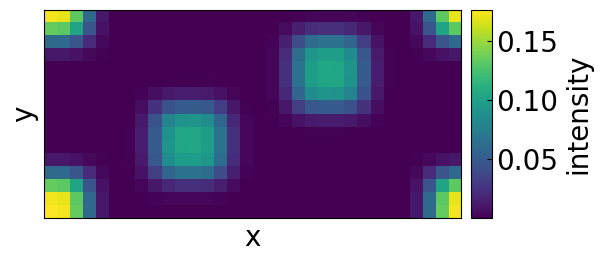

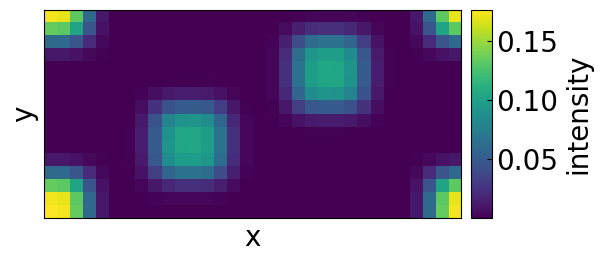

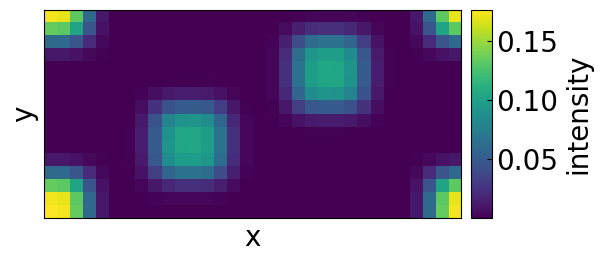

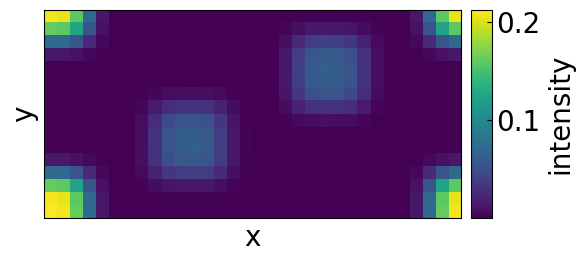

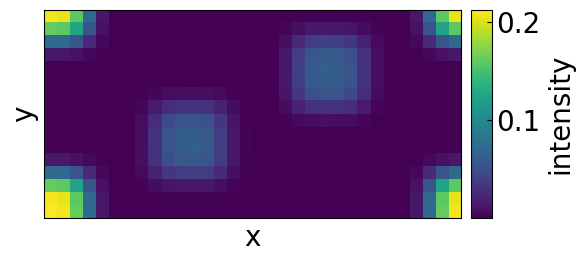

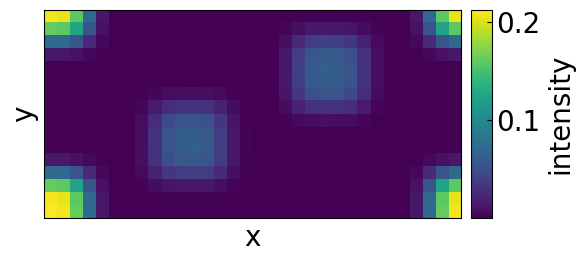

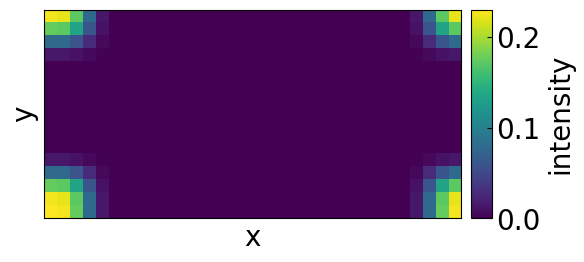

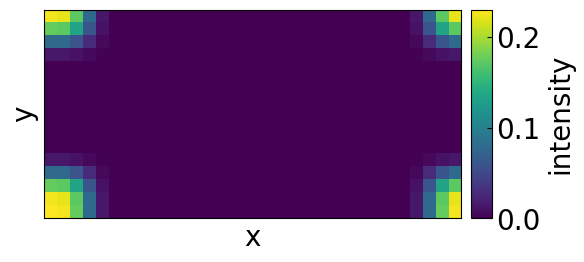

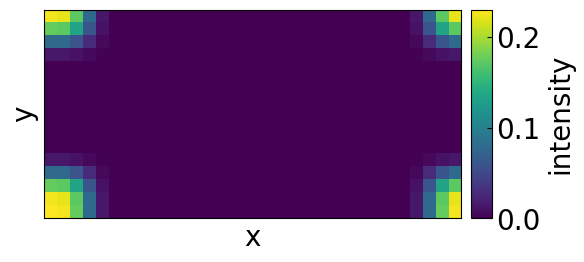

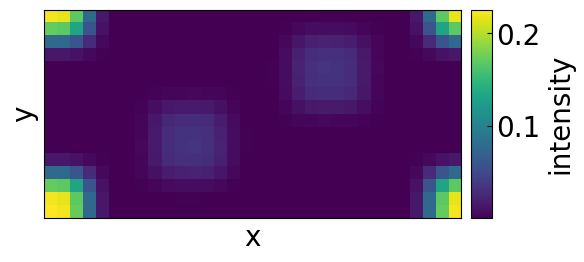

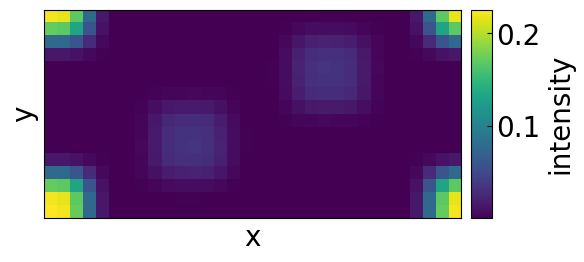

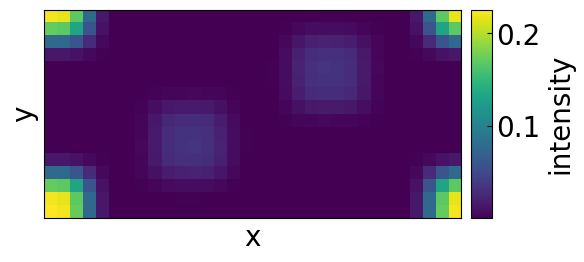

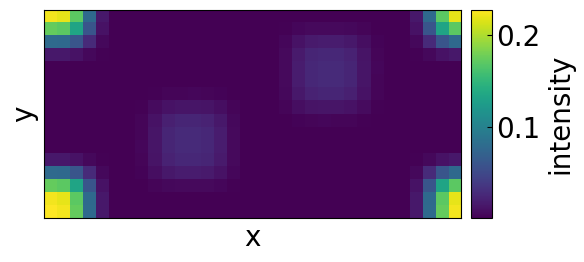

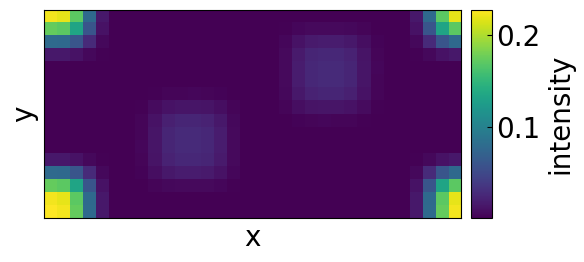

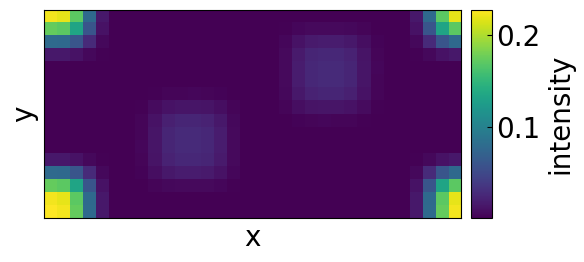

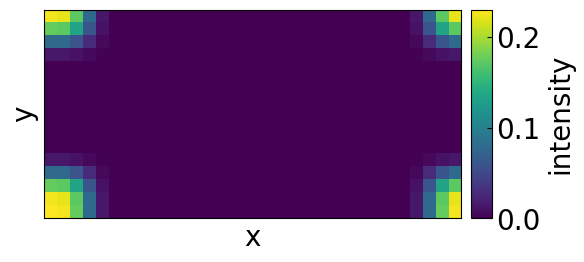

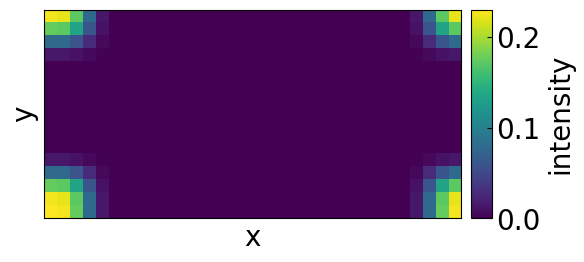

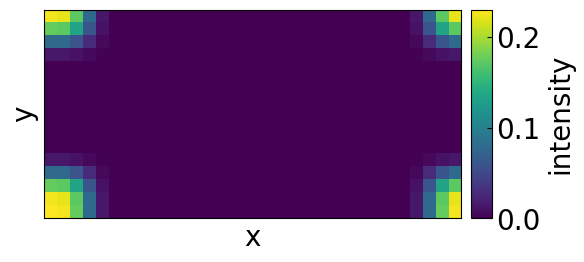

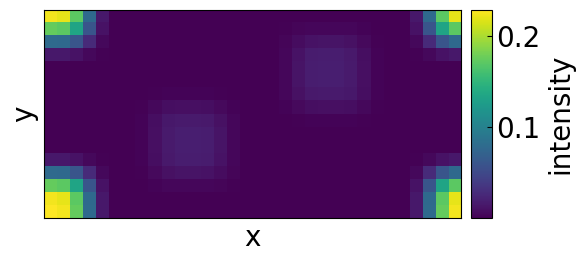

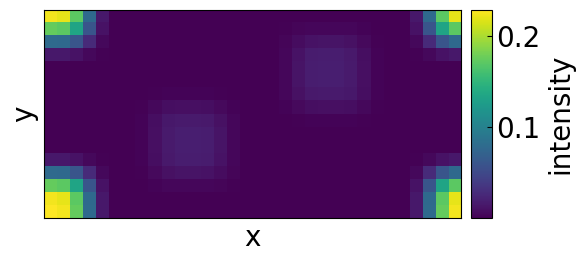

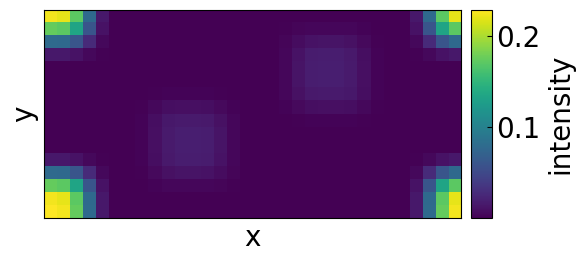

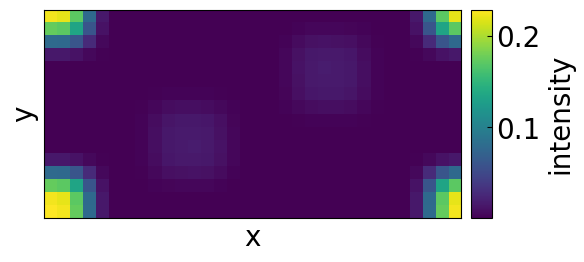

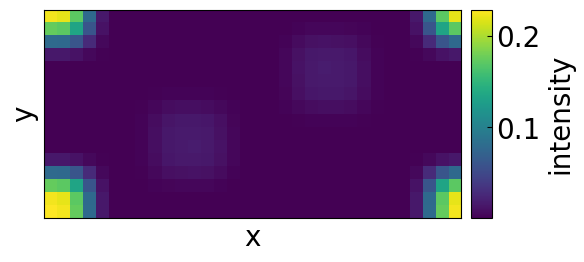

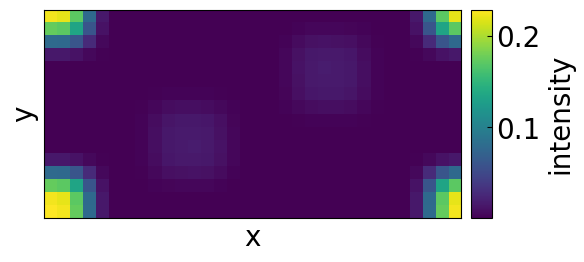

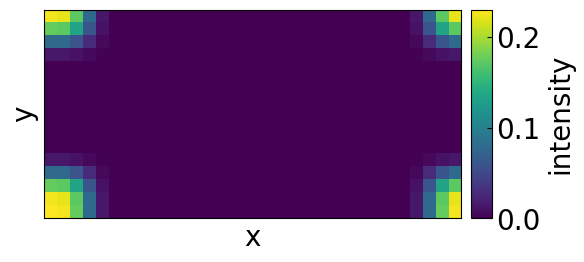

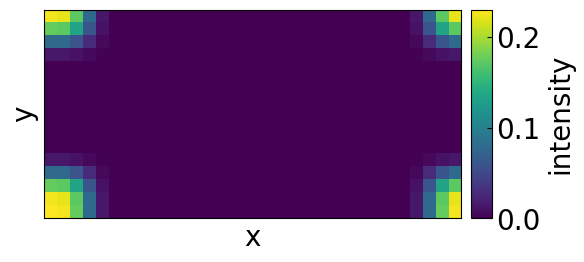

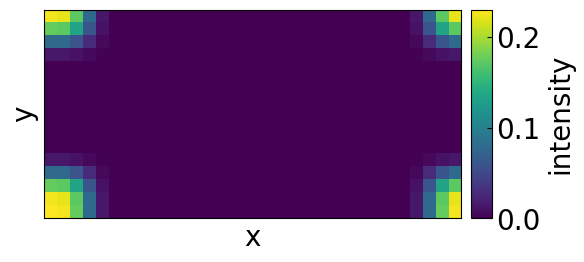

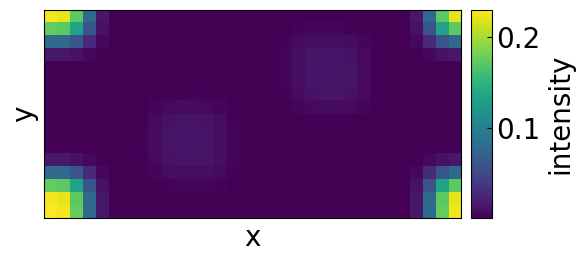

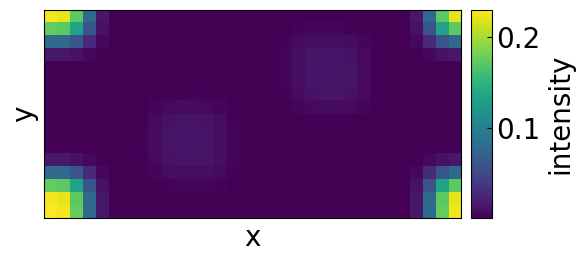

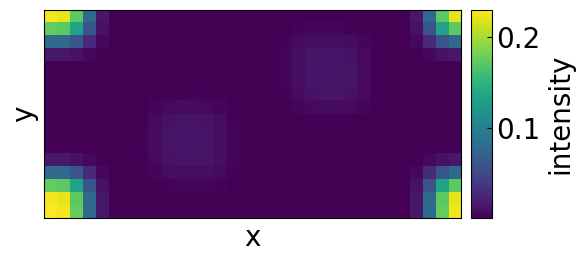

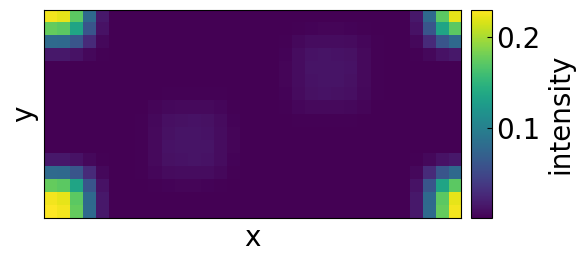

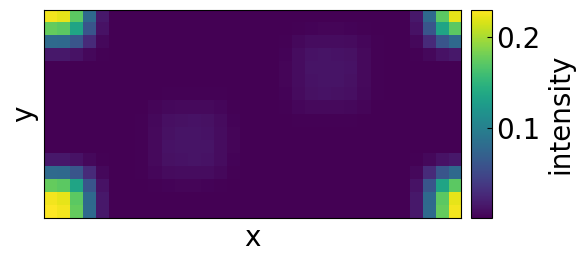

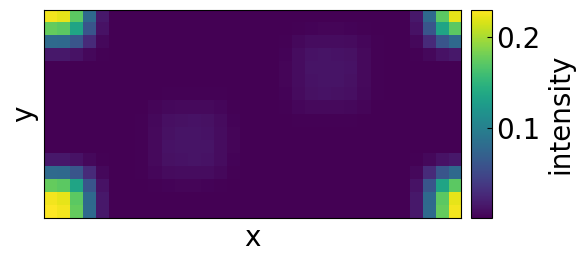

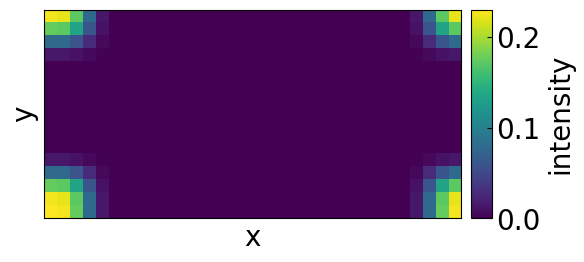

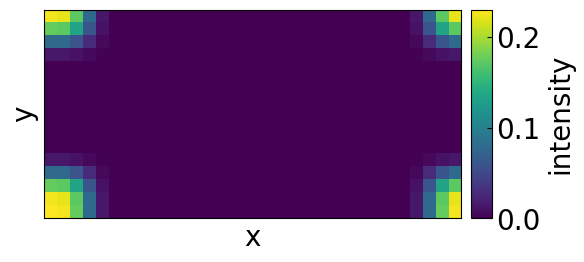

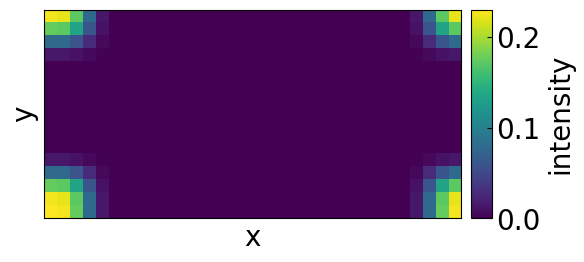

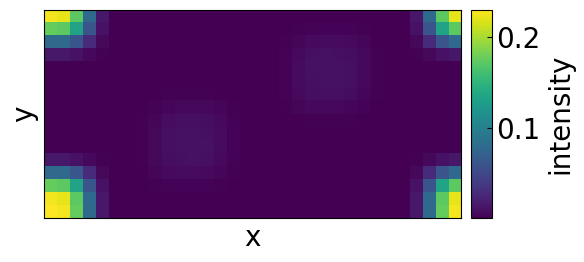

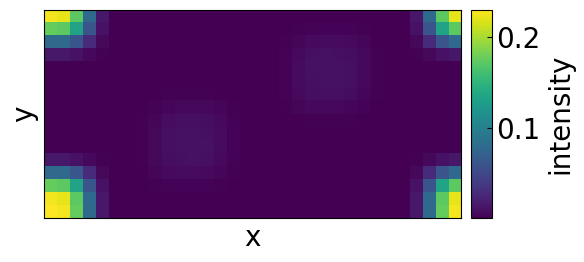

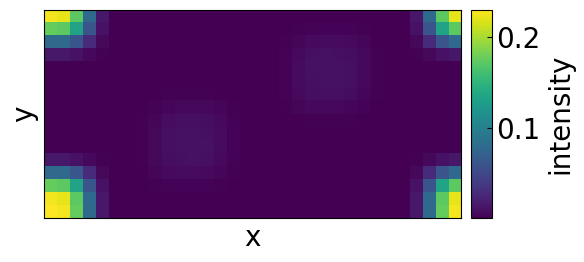

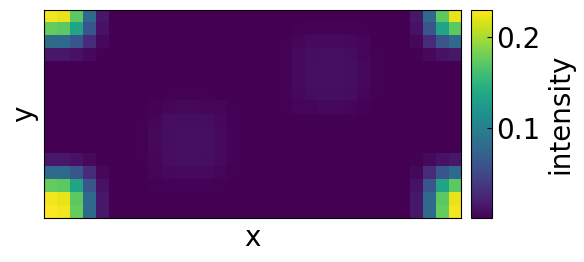

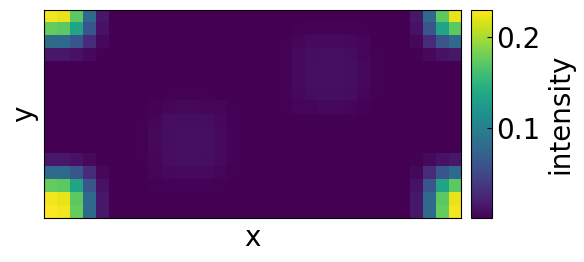

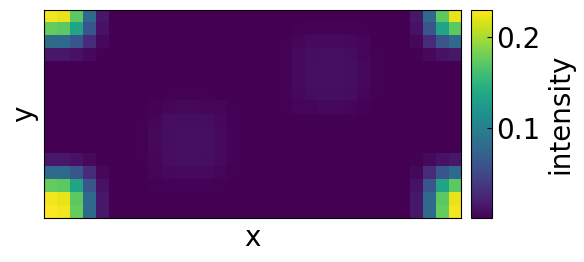

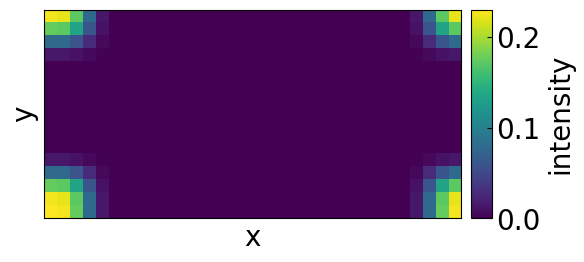

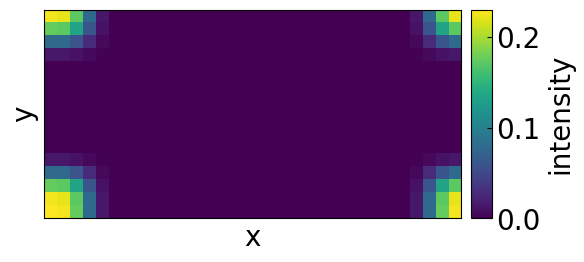

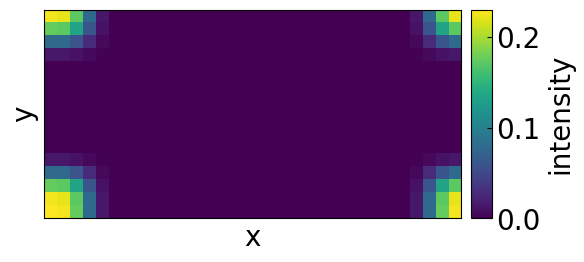

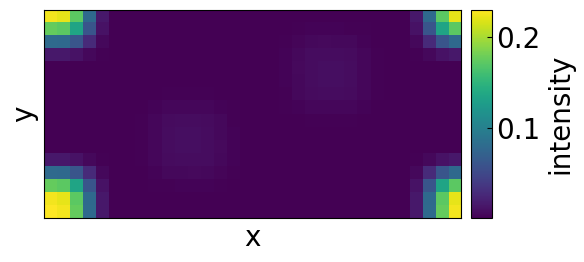

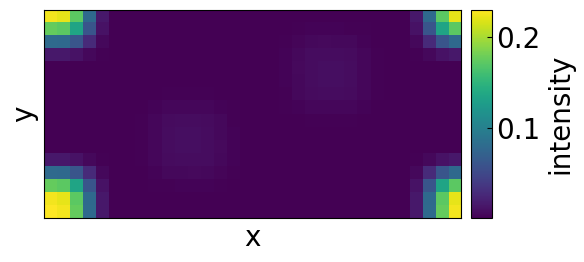

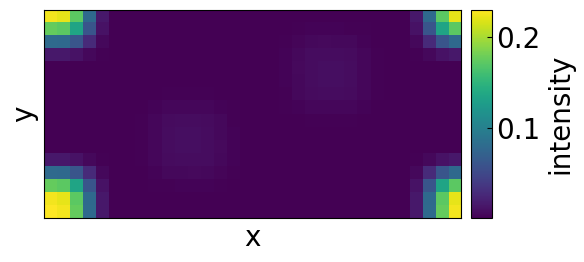

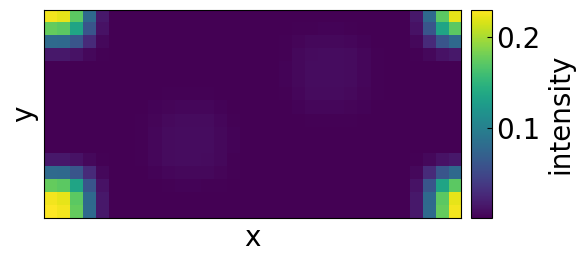

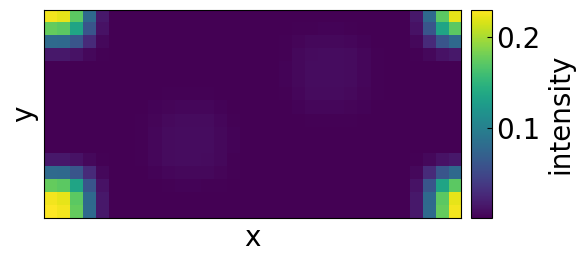

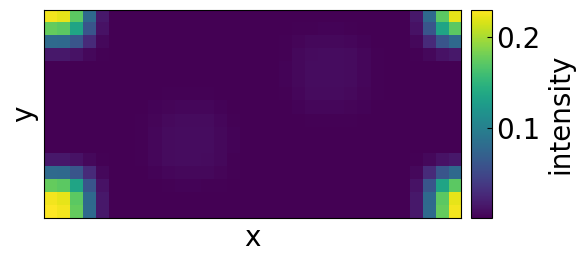

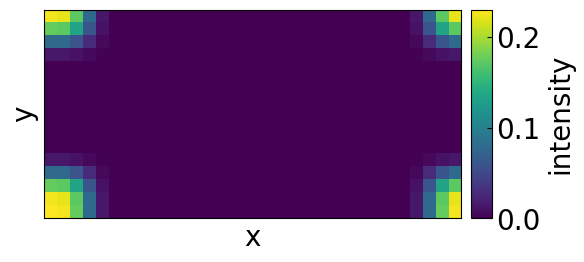

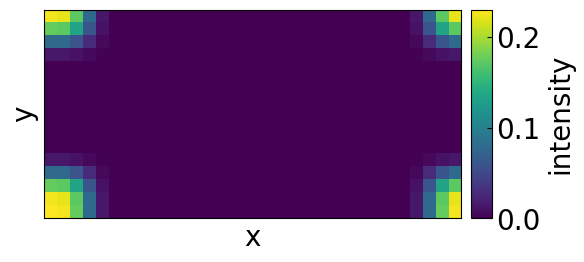

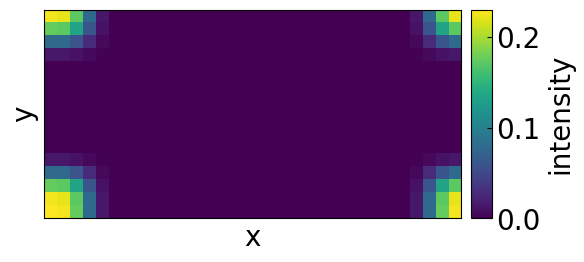

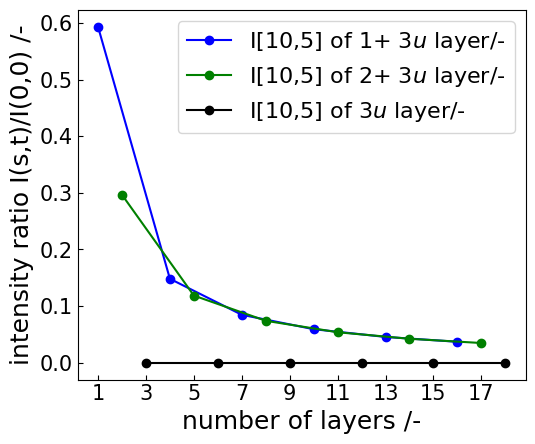

In [33]:
#Figure SI 13
#layer change in CeO2(111) 
"""
input_pattern
first_layer (CeO2_111["A"]+CeO2_111["B"]+CeO2_111["C"]) +second layer (CeO2_111["D"]+CeO2_111["E"]+CeO2_111["A"])
+third layer (CeO2_111["B"]+CeO2_111["F"]+CeO2_111["C"])
first O layer + second layer + third layer (changing layer of CeO2(111))
"""
del FT
FT = FTManager()
pp               = Preprocessing(scattering_factor_O)
order_111_Ofirst      = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [11,6],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[32,16],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Ofirst  = pp.preprocessing_parser(CeO2_111["A"], order_111_Ofirst)
pp.clear(scattering_factor_Ce)
order_111_Cefirst      = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [11,6],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[32,16],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Cefirst  = pp.preprocessing_parser(CeO2_111["B"], order_111_Cefirst)
pp.clear(scattering_factor_Ce)
order_111_Osecond     = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [11,6],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[32,16],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Osecond = pp.preprocessing_parser(CeO2_111["C"], order_111_Osecond)
pp.clear(scattering_factor_O)
order_111_Othird     = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [11,6],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[32,16],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Othird = pp.preprocessing_parser(CeO2_111["D"], order_111_Othird)
pp.clear(scattering_factor_O)
order_111_Cesecond     = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [11,6],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[32,16],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Cesecond = pp.preprocessing_parser(CeO2_111["E"], order_111_Cesecond)
pp.clear(scattering_factor_O)
order_111_Cethird     = {"preprocessings":["tile","cutoff","multiple_flat_top_window"],\
                    "tile_number"    : [11,6],\
                    "padding_values"  :0,\
                    "cutoff_length"  :[32,16],\
                    "d"             : d_CeO2_111,\
                    "DW"            : DW_CeO2}
XFT_input_111_Cethird = pp.preprocessing_parser(CeO2_111["F"], order_111_Cethird)

relative_intensity_115       = []
relative_intensity_115_0     = []
relative_intensity_115_1     = []
relative_intensity_115_2     = []
for num_layer in range(1,19):
    if num_layer%3 ==0:
        XFT_input        = pp.normalize(((XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)+(XFT_input_111_Othird + XFT_input_111_Cesecond+ XFT_input_111_Ofirst)+(XFT_input_111_Osecond + XFT_input_111_Cethird+ XFT_input_111_Othird))*(num_layer//3))
    elif num_layer%3 ==1:
        XFT_input        = pp.normalize(((XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)+(XFT_input_111_Othird + XFT_input_111_Cesecond+ XFT_input_111_Ofirst)+(XFT_input_111_Osecond + XFT_input_111_Cethird+ XFT_input_111_Othird))*(num_layer//3)+(XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond))
    else:
        XFT_input        = pp.normalize(((XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)+(XFT_input_111_Othird + XFT_input_111_Cesecond+ XFT_input_111_Ofirst)+(XFT_input_111_Osecond + XFT_input_111_Cethird+ XFT_input_111_Othird))*(num_layer//3)+(XFT_input_111_Ofirst + XFT_input_111_Cefirst+ XFT_input_111_Osecond)+(XFT_input_111_Othird + XFT_input_111_Cesecond+ XFT_input_111_Ofirst))
    DFT,FFT,QFT      = FT([XFT_input,XFT_input,XFT_input])
    relative_intensity_115.append([QFT[11,5]/QFT[0,0]])
    if num_layer%3 == 0:
        relative_intensity_115_0.append([QFT[10,5]/QFT[0,0]])
    elif num_layer%3 ==1:
        relative_intensity_115_1.append([QFT[10,5]/QFT[0,0]])
    else :
        relative_intensity_115_2.append([QFT[10,5]/QFT[0,0]])
x_1 =  np.array(range(1, 19,3))
x_2 = np.array(range(2, 20,3))
x_3 = np.array(range(3, 21,3))

y_2 = np.abs(relative_intensity_115_1)
y_3 = np.abs(relative_intensity_115_2)
y_4 = np.abs(relative_intensity_115_0)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.plot(x_1, y_2,marker="o", c= 'blue')
plt.plot(x_2, y_3,marker="o", c= 'green')
plt.plot(x_3, y_4,marker="o", c= 'black')

plt.xlabel("number of layers /-",fontsize = 18)
plt.ylabel("intensity ratio I(s,t)/I(0,0) /-",fontsize = 18)
plt.legend(["I[10,5] of 1+ 3$\it{ u }$ layer/-","I[10,5] of 2+ 3$\it{ u }$ layer/-","I[10,5] of 3$\it{ u }$ layer/-"],fontsize = 16)
plt.xticks(np.arange(1, 19, 2))
plt.tick_params(labelsize=15)
plt.savefig(fname = "FigS13.svg",transparent = True)
plt.show()